In [1]:
#connecting to the mongodb
from pyspark.sql import SparkSession

spark = SparkSession.builder \
    .appName("CSVtoMongoDB") \
    .config("spark.mongodb.output.uri", "mongodb://localhost:27017/flights.cleaned") \
    .config("spark.jars.packages", "org.mongodb.spark:mongo-spark-connector_2.12:3.0.1") \
    .getOrCreate()

:: loading settings :: url = jar:file:/opt/anaconda3/envs/keras_env/lib/python3.10/site-packages/pyspark/jars/ivy-2.5.1.jar!/org/apache/ivy/core/settings/ivysettings.xml


Ivy Default Cache set to: /Users/narasimhanaiduchikkala/.ivy2/cache
The jars for the packages stored in: /Users/narasimhanaiduchikkala/.ivy2/jars
org.mongodb.spark#mongo-spark-connector_2.12 added as a dependency
:: resolving dependencies :: org.apache.spark#spark-submit-parent-51f33c30-6311-4111-9f09-25995046ba8c;1.0
	confs: [default]
	found org.mongodb.spark#mongo-spark-connector_2.12;3.0.1 in central
	found org.mongodb#mongodb-driver-sync;4.0.5 in central
	found org.mongodb#bson;4.0.5 in central
	found org.mongodb#mongodb-driver-core;4.0.5 in central
:: resolution report :: resolve 335ms :: artifacts dl 23ms
	:: modules in use:
	org.mongodb#bson;4.0.5 from central in [default]
	org.mongodb#mongodb-driver-core;4.0.5 from central in [default]
	org.mongodb#mongodb-driver-sync;4.0.5 from central in [default]
	org.mongodb.spark#mongo-spark-connector_2.12;3.0.1 from central in [default]
	---------------------------------------------------------------------
	|                  |           

In [2]:
#reading the data using spark
df2009 = spark.read.csv("2009.csv", header=True, inferSchema=True)
df2010 = spark.read.csv("2010.csv", header=True, inferSchema=True)
df2011 = spark.read.csv("2011.csv", header=True, inferSchema=True)
df2012 = spark.read.csv("2012.csv", header=True, inferSchema=True)
df2013 = spark.read.csv("2013.csv", header=True, inferSchema=True)
df2014 = spark.read.csv("2014.csv", header=True, inferSchema=True)
df2015 = spark.read.csv("2015.csv", header=True, inferSchema=True)
df2016 = spark.read.csv("2016.csv", header=True, inferSchema=True)
df2017 = spark.read.csv("2017.csv", header=True, inferSchema=True)
df2018 = spark.read.csv("2018.csv", header=True, inferSchema=True)

In [3]:
#inspecting the data in df2009
df2009.show(1,vertical=True)

23/05/14 00:29:25 WARN package: Truncated the string representation of a plan since it was too large. This behavior can be adjusted by setting 'spark.sql.debug.maxToStringFields'.


-RECORD 0-------------------------
 FL_DATE             | 2009-01-01 
 OP_CARRIER          | XE         
 OP_CARRIER_FL_NUM   | 1204       
 ORIGIN              | DCA        
 DEST                | EWR        
 CRS_DEP_TIME        | 1100       
 DEP_TIME            | 1058.0     
 DEP_DELAY           | -2.0       
 TAXI_OUT            | 18.0       
 WHEELS_OFF          | 1116.0     
 WHEELS_ON           | 1158.0     
 TAXI_IN             | 8.0        
 CRS_ARR_TIME        | 1202       
 ARR_TIME            | 1206.0     
 ARR_DELAY           | 4.0        
 CANCELLED           | 0.0        
 CANCELLATION_CODE   | null       
 DIVERTED            | 0.0        
 CRS_ELAPSED_TIME    | 62.0       
 ACTUAL_ELAPSED_TIME | 68.0       
 AIR_TIME            | 42.0       
 DISTANCE            | 199.0      
 CARRIER_DELAY       | null       
 WEATHER_DELAY       | null       
 NAS_DELAY           | null       
 SECURITY_DELAY      | null       
 LATE_AIRCRAFT_DELAY | null       
 Unnamed: 27        

In [4]:
#looking at the type of dataframes 
print("Data type of the loaded dataframes:")
print('df2009:',type(df2009))
print('df2010:',type(df2010))
print('df2011:',type(df2011))
print('df2012:',type(df2012))
print('df2013:',type(df2013))

Data type of the loaded dataframes:
df2009: <class 'pyspark.sql.dataframe.DataFrame'>
df2010: <class 'pyspark.sql.dataframe.DataFrame'>
df2011: <class 'pyspark.sql.dataframe.DataFrame'>
df2012: <class 'pyspark.sql.dataframe.DataFrame'>
df2013: <class 'pyspark.sql.dataframe.DataFrame'>


In [5]:
#appendig all the dataframes into a single dataframe
from functools import reduce
from pyspark.sql import DataFrame
dfs = [df2009,df2010,df2011,df2012,df2013,df2014,df2015,df2016,df2017,df2018]
df = reduce(DataFrame.unionAll, dfs)

In [6]:
#schema of df2008
df.printSchema()  

root
 |-- FL_DATE: date (nullable = true)
 |-- OP_CARRIER: string (nullable = true)
 |-- OP_CARRIER_FL_NUM: integer (nullable = true)
 |-- ORIGIN: string (nullable = true)
 |-- DEST: string (nullable = true)
 |-- CRS_DEP_TIME: double (nullable = true)
 |-- DEP_TIME: double (nullable = true)
 |-- DEP_DELAY: double (nullable = true)
 |-- TAXI_OUT: double (nullable = true)
 |-- WHEELS_OFF: double (nullable = true)
 |-- WHEELS_ON: double (nullable = true)
 |-- TAXI_IN: double (nullable = true)
 |-- CRS_ARR_TIME: double (nullable = true)
 |-- ARR_TIME: double (nullable = true)
 |-- ARR_DELAY: double (nullable = true)
 |-- CANCELLED: double (nullable = true)
 |-- CANCELLATION_CODE: string (nullable = true)
 |-- DIVERTED: double (nullable = true)
 |-- CRS_ELAPSED_TIME: double (nullable = true)
 |-- ACTUAL_ELAPSED_TIME: double (nullable = true)
 |-- AIR_TIME: double (nullable = true)
 |-- DISTANCE: double (nullable = true)
 |-- CARRIER_DELAY: double (nullable = true)
 |-- WEATHER_DELAY: double

In [7]:
df.count()

61556964

In [8]:
len(df.columns)

28

In [9]:
df.columns

['FL_DATE',
 'OP_CARRIER',
 'OP_CARRIER_FL_NUM',
 'ORIGIN',
 'DEST',
 'CRS_DEP_TIME',
 'DEP_TIME',
 'DEP_DELAY',
 'TAXI_OUT',
 'WHEELS_OFF',
 'WHEELS_ON',
 'TAXI_IN',
 'CRS_ARR_TIME',
 'ARR_TIME',
 'ARR_DELAY',
 'CANCELLED',
 'CANCELLATION_CODE',
 'DIVERTED',
 'CRS_ELAPSED_TIME',
 'ACTUAL_ELAPSED_TIME',
 'AIR_TIME',
 'DISTANCE',
 'CARRIER_DELAY',
 'WEATHER_DELAY',
 'NAS_DELAY',
 'SECURITY_DELAY',
 'LATE_AIRCRAFT_DELAY',
 'Unnamed: 27']

In [10]:
#To check the number of null values
from pyspark.sql.functions import col, isnan, unix_timestamp, when, count

uniondf2 = df.select([
    count(when(
        col(c).contains('None') | col(c).contains('NULL') | (col(c) == 'NA') | col(c).isNull() | isnan(c),
        c)
    ).alias(c) if c != 'FL_DATE' else
    count(when(
        col(c).contains('None') | col(c).contains('NULL') | (col(c) == 'NA') | col(c).isNull() | isnan(unix_timestamp(c)),
        c)
    ).alias(c)
    for c in df.columns
])

uniondf2.show(vertical=True)

-RECORD 0-----------------------
 FL_DATE             | 0        
 OP_CARRIER          | 0        
 OP_CARRIER_FL_NUM   | 0        
 ORIGIN              | 0        
 DEST                | 0        
 CRS_DEP_TIME        | 1        
 DEP_TIME            | 935723   
 DEP_DELAY           | 940675   
 TAXI_OUT            | 963901   
 WHEELS_OFF          | 963896   
 WHEELS_ON           | 997016   
 TAXI_IN             | 997015   
 CRS_ARR_TIME        | 2        
 ARR_TIME            | 997015   
 ARR_DELAY           | 1121351  
 CANCELLED           | 0        
 CANCELLATION_CODE   | 60583755 
 DIVERTED            | 0        
 CRS_ELAPSED_TIME    | 60       
 ACTUAL_ELAPSED_TIME | 1118754  
 AIR_TIME            | 1118753  
 DISTANCE            | 0        
 CARRIER_DELAY       | 50166224 
 WEATHER_DELAY       | 50166224 
 NAS_DELAY           | 50166224 
 SECURITY_DELAY      | 50166224 
 LATE_AIRCRAFT_DELAY | 50166224 
 Unnamed: 27         | 61556964 



In [11]:
df.printSchema()

root
 |-- FL_DATE: date (nullable = true)
 |-- OP_CARRIER: string (nullable = true)
 |-- OP_CARRIER_FL_NUM: integer (nullable = true)
 |-- ORIGIN: string (nullable = true)
 |-- DEST: string (nullable = true)
 |-- CRS_DEP_TIME: double (nullable = true)
 |-- DEP_TIME: double (nullable = true)
 |-- DEP_DELAY: double (nullable = true)
 |-- TAXI_OUT: double (nullable = true)
 |-- WHEELS_OFF: double (nullable = true)
 |-- WHEELS_ON: double (nullable = true)
 |-- TAXI_IN: double (nullable = true)
 |-- CRS_ARR_TIME: double (nullable = true)
 |-- ARR_TIME: double (nullable = true)
 |-- ARR_DELAY: double (nullable = true)
 |-- CANCELLED: double (nullable = true)
 |-- CANCELLATION_CODE: string (nullable = true)
 |-- DIVERTED: double (nullable = true)
 |-- CRS_ELAPSED_TIME: double (nullable = true)
 |-- ACTUAL_ELAPSED_TIME: double (nullable = true)
 |-- AIR_TIME: double (nullable = true)
 |-- DISTANCE: double (nullable = true)
 |-- CARRIER_DELAY: double (nullable = true)
 |-- WEATHER_DELAY: double

In [12]:
df.show(vertical=True)

-RECORD 0-------------------------
 FL_DATE             | 2009-01-01 
 OP_CARRIER          | XE         
 OP_CARRIER_FL_NUM   | 1204       
 ORIGIN              | DCA        
 DEST                | EWR        
 CRS_DEP_TIME        | 1100.0     
 DEP_TIME            | 1058.0     
 DEP_DELAY           | -2.0       
 TAXI_OUT            | 18.0       
 WHEELS_OFF          | 1116.0     
 WHEELS_ON           | 1158.0     
 TAXI_IN             | 8.0        
 CRS_ARR_TIME        | 1202.0     
 ARR_TIME            | 1206.0     
 ARR_DELAY           | 4.0        
 CANCELLED           | 0.0        
 CANCELLATION_CODE   | null       
 DIVERTED            | 0.0        
 CRS_ELAPSED_TIME    | 62.0       
 ACTUAL_ELAPSED_TIME | 68.0       
 AIR_TIME            | 42.0       
 DISTANCE            | 199.0      
 CARRIER_DELAY       | null       
 WEATHER_DELAY       | null       
 NAS_DELAY           | null       
 SECURITY_DELAY      | null       
 LATE_AIRCRAFT_DELAY | null       
 Unnamed: 27        

In [13]:
#Removing the unnecessary columns
cols = ('CANCELLATION_CODE', 'DIVERTED', 'CARRIER_DELAY', 'WEATHER_DELAY',
                                          'NAS_DELAY', 'SECURITY_DELAY', 'LATE_AIRCRAFT_DELAY',
                                          'Unnamed: 27')

#Storing the new data into dataframe
df=df.drop(*cols)

In [14]:
#Dropping the null values
df= df.dropna()

In [15]:
#re-checking data inconsistencies 
df.select([
    count(when(
        col(c).contains('None') | col(c).contains('NULL') | (col(c) == 'NA') | col(c).isNull() | isnan(c),
        c)
    ).alias(c) if c != 'FL_DATE' else
    count(when(
        col(c).contains('None') | col(c).contains('NULL') | (col(c) == 'NA') | col(c).isNull() | isnan(unix_timestamp(c)),
        c)
    ).alias(c)
    for c in df.columns
]).show(vertical=True)

-RECORD 0------------------
 FL_DATE             | 0   
 OP_CARRIER          | 0   
 OP_CARRIER_FL_NUM   | 0   
 ORIGIN              | 0   
 DEST                | 0   
 CRS_DEP_TIME        | 0   
 DEP_TIME            | 0   
 DEP_DELAY           | 0   
 TAXI_OUT            | 0   
 WHEELS_OFF          | 0   
 WHEELS_ON           | 0   
 TAXI_IN             | 0   
 CRS_ARR_TIME        | 0   
 ARR_TIME            | 0   
 ARR_DELAY           | 0   
 CANCELLED           | 0   
 CRS_ELAPSED_TIME    | 0   
 ACTUAL_ELAPSED_TIME | 0   
 AIR_TIME            | 0   
 DISTANCE            | 0   



In [16]:
print(f"The shape is {df.count():d} rows by {len(df.columns):d} columns.")

The shape is 60431020 rows by 20 columns.


In [17]:
#Filtering the data based on the required locations
l = ['IAD','BWI','JFK','BOS','DEN','MIA','ORD','SLC','SEA','HOU','ORL','LAS','BNA','CVG','DTW','PIT','LAX','PHX','ATL','DFW','CLT']

In [18]:
#Storing the filtered data into df
df = df.filter((df.ORIGIN).isin(l) & (df.DEST).isin(l))
df.show(vertical = True)

-RECORD 0-------------------------
 FL_DATE             | 2009-01-01 
 OP_CARRIER          | YV         
 OP_CARRIER_FL_NUM   | 2624       
 ORIGIN              | ATL        
 DEST                | CLT        
 CRS_DEP_TIME        | 1045.0     
 DEP_TIME            | 1040.0     
 DEP_DELAY           | -5.0       
 TAXI_OUT            | 17.0       
 WHEELS_OFF          | 1057.0     
 WHEELS_ON           | 1140.0     
 TAXI_IN             | 20.0       
 CRS_ARR_TIME        | 1205.0     
 ARR_TIME            | 1200.0     
 ARR_DELAY           | -5.0       
 CANCELLED           | 0.0        
 CRS_ELAPSED_TIME    | 80.0       
 ACTUAL_ELAPSED_TIME | 80.0       
 AIR_TIME            | 43.0       
 DISTANCE            | 227.0      
-RECORD 1-------------------------
 FL_DATE             | 2009-01-01 
 OP_CARRIER          | YV         
 OP_CARRIER_FL_NUM   | 7109       
 ORIGIN              | ATL        
 DEST                | IAD        
 CRS_DEP_TIME        | 930.0      
 DEP_TIME           

In [19]:
print(f"The shape is {df.count():d} rows by {len(df.columns):d} columns.")

The shape is 10041056 rows by 20 columns.


In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline
import seaborn as sns
sns.set_style('darkgrid')
pd.set_option('display.max_columns', None)
import datetime, warnings, scipy
warnings.filterwarnings("ignore")

### Find the airport with the largest number of departure flight

In [20]:
# Group the DataFrame by origin airport and count the number of flights for each airport
airport_counts = df.groupBy('ORIGIN').count()

# Sort the resulting DataFrame by the count of flights in descending order
sorted_dep_airport_counts = airport_counts.sort('count', ascending=False)

# Select the airport with the highest count of flights
airport_with_most_departures = sorted_dep_airport_counts.select('ORIGIN').first()[0]

sorted_dep_airport_counts.show()
# Print the result
print('The airport with the largest number of departure flights is', airport_with_most_departures)

+------+------+
|ORIGIN| count|
+------+------+
|   LAX|920913|
|   ATL|898483|
|   ORD|827868|
|   DEN|751263|
|   DFW|717211|
|   LAS|643330|
|   PHX|636625|
|   BOS|528733|
|   CLT|505928|
|   SEA|475201|
|   JFK|447798|
|   DTW|437295|
|   SLC|430451|
|   BWI|382416|
|   MIA|345671|
|   IAD|283330|
|   BNA|274901|
|   PIT|199750|
|   CVG|168895|
|   HOU|164994|
+------+------+

The airport with the largest number of departure flights is LAX


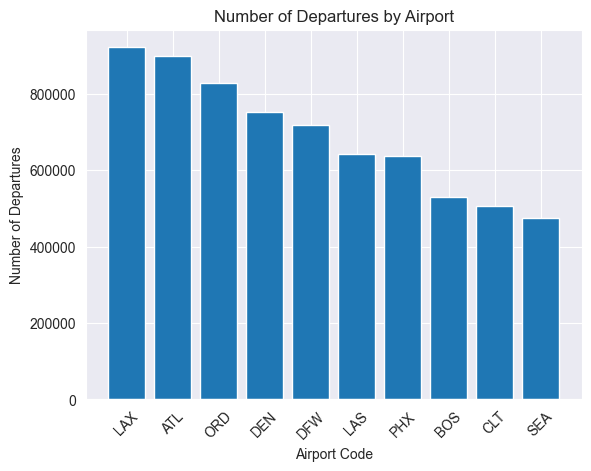

In [21]:
import matplotlib.pyplot as plt

# Get the top 10 airports with the highest count of flights
top_dep_airport_counts = sorted_dep_airport_counts.limit(10)

# Extract the airport codes and counts into separate lists
airport_codes = top_dep_airport_counts.select('ORIGIN').rdd.flatMap(lambda x: x).collect()
counts = top_dep_airport_counts.select('count').rdd.flatMap(lambda x: x).collect()

# Create a bar chart using the extracted data
plt.bar(airport_codes, counts)

# Set the chart title and axis labels
plt.title('Number of Departures by Airport')
plt.xlabel('Airport Code')
plt.ylabel('Number of Departures')

# Rotate the x-axis labels if needed
plt.xticks(rotation=45)

# Show the chart
plt.show()


### Find the airport with the largest number of arriving flight

In [22]:
# Group the DataFrame by destination airport and count the number of flights for each airport
dest_airport_counts = df.groupBy('DEST').count()

# Sort the resulting DataFrame by the count of flights in descending order
sorted_arrival_airport_counts = dest_airport_counts.sort('count', ascending=False)

# Select the airport with the highest count of flights
airport_with_most_arrivals = sorted_arrival_airport_counts.select('DEST').first()[0]

sorted_arrival_airport_counts.show()

# Print the result
print('The airport with the largest number of arriving flights is', airport_with_most_arrivals)

+----+------+
|DEST| count|
+----+------+
| LAX|921282|
| ATL|897786|
| ORD|829137|
| DEN|751292|
| DFW|714977|
| LAS|643312|
| PHX|635725|
| BOS|530166|
| CLT|503841|
| SEA|476727|
| JFK|446564|
| DTW|437744|
| SLC|427254|
| BWI|382692|
| MIA|345788|
| IAD|284800|
| BNA|275540|
| PIT|202420|
| CVG|169213|
| HOU|164796|
+----+------+

The airport with the largest number of arriving flights is LAX


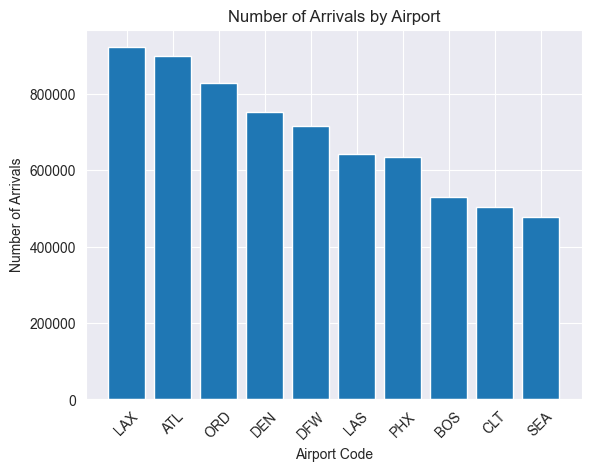

23/05/14 03:48:45 WARN HeartbeatReceiver: Removing executor driver with no recent heartbeats: 915907 ms exceeds timeout 120000 ms
23/05/14 03:48:45 WARN SparkContext: Killing executors is not supported by current scheduler.
23/05/14 04:04:02 WARN Executor: Issue communicating with driver in heartbeater
org.apache.spark.SparkException: Exception thrown in awaitResult: 
	at org.apache.spark.util.ThreadUtils$.awaitResult(ThreadUtils.scala:322)
	at org.apache.spark.rpc.RpcTimeout.awaitResult(RpcTimeout.scala:75)
	at org.apache.spark.rpc.RpcEndpointRef.askSync(RpcEndpointRef.scala:101)
	at org.apache.spark.rpc.RpcEndpointRef.askSync(RpcEndpointRef.scala:85)
	at org.apache.spark.storage.BlockManagerMaster.registerBlockManager(BlockManagerMaster.scala:80)
	at org.apache.spark.storage.BlockManager.reregister(BlockManager.scala:641)
	at org.apache.spark.executor.Executor.reportHeartBeat(Executor.scala:1111)
	at org.apache.spark.executor.Executor.$anonfun$heartbeater$1(Executor.scala:244)
	at or

23/05/14 04:20:55 ERROR Inbox: Ignoring error
org.apache.spark.SparkException: Exception thrown in awaitResult: 
	at org.apache.spark.util.ThreadUtils$.awaitResult(ThreadUtils.scala:322)
	at org.apache.spark.rpc.RpcTimeout.awaitResult(RpcTimeout.scala:75)
	at org.apache.spark.rpc.RpcEnv.setupEndpointRefByURI(RpcEnv.scala:102)
	at org.apache.spark.rpc.RpcEnv.setupEndpointRef(RpcEnv.scala:110)
	at org.apache.spark.util.RpcUtils$.makeDriverRef(RpcUtils.scala:36)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.driverEndpoint$lzycompute(BlockManagerMasterEndpoint.scala:117)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.org$apache$spark$storage$BlockManagerMasterEndpoint$$driverEndpoint(BlockManagerMasterEndpoint.scala:116)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.isExecutorAlive$lzycompute$1(BlockManagerMasterEndpoint.scala:611)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.isExecutorAlive$1(BlockManagerMasterEndpoint.scala:610)
	at org.apache.spar

23/05/14 04:51:20 ERROR Inbox: Ignoring error
org.apache.spark.SparkException: Exception thrown in awaitResult: 
	at org.apache.spark.util.ThreadUtils$.awaitResult(ThreadUtils.scala:322)
	at org.apache.spark.rpc.RpcTimeout.awaitResult(RpcTimeout.scala:75)
	at org.apache.spark.rpc.RpcEnv.setupEndpointRefByURI(RpcEnv.scala:102)
	at org.apache.spark.rpc.RpcEnv.setupEndpointRef(RpcEnv.scala:110)
	at org.apache.spark.util.RpcUtils$.makeDriverRef(RpcUtils.scala:36)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.driverEndpoint$lzycompute(BlockManagerMasterEndpoint.scala:117)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.org$apache$spark$storage$BlockManagerMasterEndpoint$$driverEndpoint(BlockManagerMasterEndpoint.scala:116)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.isExecutorAlive$lzycompute$1(BlockManagerMasterEndpoint.scala:611)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.isExecutorAlive$1(BlockManagerMasterEndpoint.scala:610)
	at org.apache.spar

23/05/14 05:24:47 ERROR Inbox: Ignoring error
org.apache.spark.SparkException: Exception thrown in awaitResult: 
	at org.apache.spark.util.ThreadUtils$.awaitResult(ThreadUtils.scala:322)
	at org.apache.spark.rpc.RpcTimeout.awaitResult(RpcTimeout.scala:75)
	at org.apache.spark.rpc.RpcEnv.setupEndpointRefByURI(RpcEnv.scala:102)
	at org.apache.spark.rpc.RpcEnv.setupEndpointRef(RpcEnv.scala:110)
	at org.apache.spark.util.RpcUtils$.makeDriverRef(RpcUtils.scala:36)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.driverEndpoint$lzycompute(BlockManagerMasterEndpoint.scala:117)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.org$apache$spark$storage$BlockManagerMasterEndpoint$$driverEndpoint(BlockManagerMasterEndpoint.scala:116)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.isExecutorAlive$lzycompute$1(BlockManagerMasterEndpoint.scala:611)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.isExecutorAlive$1(BlockManagerMasterEndpoint.scala:610)
	at org.apache.spar

23/05/14 05:40:03 ERROR Inbox: Ignoring error
org.apache.spark.SparkException: Exception thrown in awaitResult: 
	at org.apache.spark.util.ThreadUtils$.awaitResult(ThreadUtils.scala:322)
	at org.apache.spark.rpc.RpcTimeout.awaitResult(RpcTimeout.scala:75)
	at org.apache.spark.rpc.RpcEnv.setupEndpointRefByURI(RpcEnv.scala:102)
	at org.apache.spark.rpc.RpcEnv.setupEndpointRef(RpcEnv.scala:110)
	at org.apache.spark.util.RpcUtils$.makeDriverRef(RpcUtils.scala:36)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.driverEndpoint$lzycompute(BlockManagerMasterEndpoint.scala:117)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.org$apache$spark$storage$BlockManagerMasterEndpoint$$driverEndpoint(BlockManagerMasterEndpoint.scala:116)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.isExecutorAlive$lzycompute$1(BlockManagerMasterEndpoint.scala:611)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.isExecutorAlive$1(BlockManagerMasterEndpoint.scala:610)
	at org.apache.spar

23/05/14 05:56:56 ERROR Inbox: Ignoring error
org.apache.spark.SparkException: Exception thrown in awaitResult: 
	at org.apache.spark.util.ThreadUtils$.awaitResult(ThreadUtils.scala:322)
	at org.apache.spark.rpc.RpcTimeout.awaitResult(RpcTimeout.scala:75)
	at org.apache.spark.rpc.RpcEnv.setupEndpointRefByURI(RpcEnv.scala:102)
	at org.apache.spark.rpc.RpcEnv.setupEndpointRef(RpcEnv.scala:110)
	at org.apache.spark.util.RpcUtils$.makeDriverRef(RpcUtils.scala:36)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.driverEndpoint$lzycompute(BlockManagerMasterEndpoint.scala:117)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.org$apache$spark$storage$BlockManagerMasterEndpoint$$driverEndpoint(BlockManagerMasterEndpoint.scala:116)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.isExecutorAlive$lzycompute$1(BlockManagerMasterEndpoint.scala:611)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.isExecutorAlive$1(BlockManagerMasterEndpoint.scala:610)
	at org.apache.spar

23/05/14 06:29:52 WARN Executor: Issue communicating with driver in heartbeater
org.apache.spark.SparkException: Exception thrown in awaitResult: 
	at org.apache.spark.util.ThreadUtils$.awaitResult(ThreadUtils.scala:322)
	at org.apache.spark.rpc.RpcTimeout.awaitResult(RpcTimeout.scala:75)
	at org.apache.spark.rpc.RpcEndpointRef.askSync(RpcEndpointRef.scala:101)
	at org.apache.spark.rpc.RpcEndpointRef.askSync(RpcEndpointRef.scala:85)
	at org.apache.spark.storage.BlockManagerMaster.registerBlockManager(BlockManagerMaster.scala:80)
	at org.apache.spark.storage.BlockManager.reregister(BlockManager.scala:641)
	at org.apache.spark.executor.Executor.reportHeartBeat(Executor.scala:1111)
	at org.apache.spark.executor.Executor.$anonfun$heartbeater$1(Executor.scala:244)
	at org.apache.spark.executor.Executor$$Lambda$643/874810533.apply$mcV$sp(Unknown Source)
	at scala.runtime.java8.JFunction0$mcV$sp.apply(JFunction0$mcV$sp.java:23)
	at org.apache.spark.util.Utils$.logUncaughtExceptions(Utils.scal

23/05/14 06:47:24 ERROR Inbox: Ignoring error
org.apache.spark.SparkException: Exception thrown in awaitResult: 
	at org.apache.spark.util.ThreadUtils$.awaitResult(ThreadUtils.scala:322)
	at org.apache.spark.rpc.RpcTimeout.awaitResult(RpcTimeout.scala:75)
	at org.apache.spark.rpc.RpcEnv.setupEndpointRefByURI(RpcEnv.scala:102)
	at org.apache.spark.rpc.RpcEnv.setupEndpointRef(RpcEnv.scala:110)
	at org.apache.spark.util.RpcUtils$.makeDriverRef(RpcUtils.scala:36)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.driverEndpoint$lzycompute(BlockManagerMasterEndpoint.scala:117)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.org$apache$spark$storage$BlockManagerMasterEndpoint$$driverEndpoint(BlockManagerMasterEndpoint.scala:116)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.isExecutorAlive$lzycompute$1(BlockManagerMasterEndpoint.scala:611)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.isExecutorAlive$1(BlockManagerMasterEndpoint.scala:610)
	at org.apache.spar

23/05/14 07:03:39 ERROR Inbox: Ignoring error
org.apache.spark.SparkException: Exception thrown in awaitResult: 
	at org.apache.spark.util.ThreadUtils$.awaitResult(ThreadUtils.scala:322)
	at org.apache.spark.rpc.RpcTimeout.awaitResult(RpcTimeout.scala:75)
	at org.apache.spark.rpc.RpcEnv.setupEndpointRefByURI(RpcEnv.scala:102)
	at org.apache.spark.rpc.RpcEnv.setupEndpointRef(RpcEnv.scala:110)
	at org.apache.spark.util.RpcUtils$.makeDriverRef(RpcUtils.scala:36)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.driverEndpoint$lzycompute(BlockManagerMasterEndpoint.scala:117)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.org$apache$spark$storage$BlockManagerMasterEndpoint$$driverEndpoint(BlockManagerMasterEndpoint.scala:116)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.isExecutorAlive$lzycompute$1(BlockManagerMasterEndpoint.scala:611)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.isExecutorAlive$1(BlockManagerMasterEndpoint.scala:610)
	at org.apache.spar

23/05/14 07:36:37 ERROR Inbox: Ignoring error
org.apache.spark.SparkException: Exception thrown in awaitResult: 
	at org.apache.spark.util.ThreadUtils$.awaitResult(ThreadUtils.scala:322)
	at org.apache.spark.rpc.RpcTimeout.awaitResult(RpcTimeout.scala:75)
	at org.apache.spark.rpc.RpcEnv.setupEndpointRefByURI(RpcEnv.scala:102)
	at org.apache.spark.rpc.RpcEnv.setupEndpointRef(RpcEnv.scala:110)
	at org.apache.spark.util.RpcUtils$.makeDriverRef(RpcUtils.scala:36)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.driverEndpoint$lzycompute(BlockManagerMasterEndpoint.scala:117)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.org$apache$spark$storage$BlockManagerMasterEndpoint$$driverEndpoint(BlockManagerMasterEndpoint.scala:116)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.isExecutorAlive$lzycompute$1(BlockManagerMasterEndpoint.scala:611)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.isExecutorAlive$1(BlockManagerMasterEndpoint.scala:610)
	at org.apache.spar

23/05/14 08:09:13 ERROR Inbox: Ignoring error
org.apache.spark.SparkException: Exception thrown in awaitResult: 
	at org.apache.spark.util.ThreadUtils$.awaitResult(ThreadUtils.scala:322)
	at org.apache.spark.rpc.RpcTimeout.awaitResult(RpcTimeout.scala:75)
	at org.apache.spark.rpc.RpcEnv.setupEndpointRefByURI(RpcEnv.scala:102)
	at org.apache.spark.rpc.RpcEnv.setupEndpointRef(RpcEnv.scala:110)
	at org.apache.spark.util.RpcUtils$.makeDriverRef(RpcUtils.scala:36)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.driverEndpoint$lzycompute(BlockManagerMasterEndpoint.scala:117)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.org$apache$spark$storage$BlockManagerMasterEndpoint$$driverEndpoint(BlockManagerMasterEndpoint.scala:116)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.isExecutorAlive$lzycompute$1(BlockManagerMasterEndpoint.scala:611)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.isExecutorAlive$1(BlockManagerMasterEndpoint.scala:610)
	at org.apache.spar

23/05/14 08:24:58 ERROR Inbox: Ignoring error
org.apache.spark.SparkException: Exception thrown in awaitResult: 
	at org.apache.spark.util.ThreadUtils$.awaitResult(ThreadUtils.scala:322)
	at org.apache.spark.rpc.RpcTimeout.awaitResult(RpcTimeout.scala:75)
	at org.apache.spark.rpc.RpcEnv.setupEndpointRefByURI(RpcEnv.scala:102)
	at org.apache.spark.rpc.RpcEnv.setupEndpointRef(RpcEnv.scala:110)
	at org.apache.spark.util.RpcUtils$.makeDriverRef(RpcUtils.scala:36)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.driverEndpoint$lzycompute(BlockManagerMasterEndpoint.scala:117)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.org$apache$spark$storage$BlockManagerMasterEndpoint$$driverEndpoint(BlockManagerMasterEndpoint.scala:116)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.isExecutorAlive$lzycompute$1(BlockManagerMasterEndpoint.scala:611)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.isExecutorAlive$1(BlockManagerMasterEndpoint.scala:610)
	at org.apache.spar

23/05/14 08:46:44 ERROR Inbox: Ignoring error
org.apache.spark.SparkException: Exception thrown in awaitResult: 
	at org.apache.spark.util.ThreadUtils$.awaitResult(ThreadUtils.scala:322)
	at org.apache.spark.rpc.RpcTimeout.awaitResult(RpcTimeout.scala:75)
	at org.apache.spark.rpc.RpcEnv.setupEndpointRefByURI(RpcEnv.scala:102)
	at org.apache.spark.rpc.RpcEnv.setupEndpointRef(RpcEnv.scala:110)
	at org.apache.spark.util.RpcUtils$.makeDriverRef(RpcUtils.scala:36)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.driverEndpoint$lzycompute(BlockManagerMasterEndpoint.scala:117)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.org$apache$spark$storage$BlockManagerMasterEndpoint$$driverEndpoint(BlockManagerMasterEndpoint.scala:116)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.isExecutorAlive$lzycompute$1(BlockManagerMasterEndpoint.scala:611)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.isExecutorAlive$1(BlockManagerMasterEndpoint.scala:610)
	at org.apache.spar

23/05/14 09:04:29 ERROR Inbox: Ignoring error
org.apache.spark.SparkException: Exception thrown in awaitResult: 
	at org.apache.spark.util.ThreadUtils$.awaitResult(ThreadUtils.scala:322)
	at org.apache.spark.rpc.RpcTimeout.awaitResult(RpcTimeout.scala:75)
	at org.apache.spark.rpc.RpcEnv.setupEndpointRefByURI(RpcEnv.scala:102)
	at org.apache.spark.rpc.RpcEnv.setupEndpointRef(RpcEnv.scala:110)
	at org.apache.spark.util.RpcUtils$.makeDriverRef(RpcUtils.scala:36)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.driverEndpoint$lzycompute(BlockManagerMasterEndpoint.scala:117)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.org$apache$spark$storage$BlockManagerMasterEndpoint$$driverEndpoint(BlockManagerMasterEndpoint.scala:116)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.isExecutorAlive$lzycompute$1(BlockManagerMasterEndpoint.scala:611)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.isExecutorAlive$1(BlockManagerMasterEndpoint.scala:610)
	at org.apache.spar

23/05/14 09:36:02 ERROR Inbox: Ignoring error
org.apache.spark.SparkException: Exception thrown in awaitResult: 
	at org.apache.spark.util.ThreadUtils$.awaitResult(ThreadUtils.scala:322)
	at org.apache.spark.rpc.RpcTimeout.awaitResult(RpcTimeout.scala:75)
	at org.apache.spark.rpc.RpcEnv.setupEndpointRefByURI(RpcEnv.scala:102)
	at org.apache.spark.rpc.RpcEnv.setupEndpointRef(RpcEnv.scala:110)
	at org.apache.spark.util.RpcUtils$.makeDriverRef(RpcUtils.scala:36)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.driverEndpoint$lzycompute(BlockManagerMasterEndpoint.scala:117)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.org$apache$spark$storage$BlockManagerMasterEndpoint$$driverEndpoint(BlockManagerMasterEndpoint.scala:116)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.isExecutorAlive$lzycompute$1(BlockManagerMasterEndpoint.scala:611)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.isExecutorAlive$1(BlockManagerMasterEndpoint.scala:610)
	at org.apache.spar

23/05/14 09:52:37 ERROR Inbox: Ignoring error
org.apache.spark.SparkException: Exception thrown in awaitResult: 
	at org.apache.spark.util.ThreadUtils$.awaitResult(ThreadUtils.scala:322)
	at org.apache.spark.rpc.RpcTimeout.awaitResult(RpcTimeout.scala:75)
	at org.apache.spark.rpc.RpcEnv.setupEndpointRefByURI(RpcEnv.scala:102)
	at org.apache.spark.rpc.RpcEnv.setupEndpointRef(RpcEnv.scala:110)
	at org.apache.spark.util.RpcUtils$.makeDriverRef(RpcUtils.scala:36)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.driverEndpoint$lzycompute(BlockManagerMasterEndpoint.scala:117)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.org$apache$spark$storage$BlockManagerMasterEndpoint$$driverEndpoint(BlockManagerMasterEndpoint.scala:116)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.isExecutorAlive$lzycompute$1(BlockManagerMasterEndpoint.scala:611)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.isExecutorAlive$1(BlockManagerMasterEndpoint.scala:610)
	at org.apache.spar

23/05/14 10:23:04 ERROR Inbox: Ignoring error
org.apache.spark.SparkException: Exception thrown in awaitResult: 
	at org.apache.spark.util.ThreadUtils$.awaitResult(ThreadUtils.scala:322)
	at org.apache.spark.rpc.RpcTimeout.awaitResult(RpcTimeout.scala:75)
	at org.apache.spark.rpc.RpcEnv.setupEndpointRefByURI(RpcEnv.scala:102)
	at org.apache.spark.rpc.RpcEnv.setupEndpointRef(RpcEnv.scala:110)
	at org.apache.spark.util.RpcUtils$.makeDriverRef(RpcUtils.scala:36)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.driverEndpoint$lzycompute(BlockManagerMasterEndpoint.scala:117)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.org$apache$spark$storage$BlockManagerMasterEndpoint$$driverEndpoint(BlockManagerMasterEndpoint.scala:116)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.isExecutorAlive$lzycompute$1(BlockManagerMasterEndpoint.scala:611)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.isExecutorAlive$1(BlockManagerMasterEndpoint.scala:610)
	at org.apache.spar

23/05/14 10:35:42 WARN Executor: Issue communicating with driver in heartbeater
org.apache.spark.SparkException: Exception thrown in awaitResult: 
	at org.apache.spark.util.ThreadUtils$.awaitResult(ThreadUtils.scala:322)
	at org.apache.spark.rpc.RpcTimeout.awaitResult(RpcTimeout.scala:75)
	at org.apache.spark.rpc.RpcEndpointRef.askSync(RpcEndpointRef.scala:101)
	at org.apache.spark.rpc.RpcEndpointRef.askSync(RpcEndpointRef.scala:85)
	at org.apache.spark.storage.BlockManagerMaster.registerBlockManager(BlockManagerMaster.scala:80)
	at org.apache.spark.storage.BlockManager.reregister(BlockManager.scala:641)
	at org.apache.spark.executor.Executor.reportHeartBeat(Executor.scala:1111)
	at org.apache.spark.executor.Executor.$anonfun$heartbeater$1(Executor.scala:244)
	at org.apache.spark.executor.Executor$$Lambda$643/874810533.apply$mcV$sp(Unknown Source)
	at scala.runtime.java8.JFunction0$mcV$sp.apply(JFunction0$mcV$sp.java:23)
	at org.apache.spark.util.Utils$.logUncaughtExceptions(Utils.scal

23/05/14 10:58:01 ERROR Inbox: Ignoring error
org.apache.spark.SparkException: Exception thrown in awaitResult: 
	at org.apache.spark.util.ThreadUtils$.awaitResult(ThreadUtils.scala:322)
	at org.apache.spark.rpc.RpcTimeout.awaitResult(RpcTimeout.scala:75)
	at org.apache.spark.rpc.RpcEnv.setupEndpointRefByURI(RpcEnv.scala:102)
	at org.apache.spark.rpc.RpcEnv.setupEndpointRef(RpcEnv.scala:110)
	at org.apache.spark.util.RpcUtils$.makeDriverRef(RpcUtils.scala:36)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.driverEndpoint$lzycompute(BlockManagerMasterEndpoint.scala:117)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.org$apache$spark$storage$BlockManagerMasterEndpoint$$driverEndpoint(BlockManagerMasterEndpoint.scala:116)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.isExecutorAlive$lzycompute$1(BlockManagerMasterEndpoint.scala:611)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.isExecutorAlive$1(BlockManagerMasterEndpoint.scala:610)
	at org.apache.spar

23/05/14 10:58:10 WARN Executor: Issue communicating with driver in heartbeater
org.apache.spark.SparkException: Exception thrown in awaitResult: 
	at org.apache.spark.util.ThreadUtils$.awaitResult(ThreadUtils.scala:322)
	at org.apache.spark.rpc.RpcTimeout.awaitResult(RpcTimeout.scala:75)
	at org.apache.spark.rpc.RpcEndpointRef.askSync(RpcEndpointRef.scala:101)
	at org.apache.spark.rpc.RpcEndpointRef.askSync(RpcEndpointRef.scala:85)
	at org.apache.spark.storage.BlockManagerMaster.registerBlockManager(BlockManagerMaster.scala:80)
	at org.apache.spark.storage.BlockManager.reregister(BlockManager.scala:641)
	at org.apache.spark.executor.Executor.reportHeartBeat(Executor.scala:1111)
	at org.apache.spark.executor.Executor.$anonfun$heartbeater$1(Executor.scala:244)
	at org.apache.spark.executor.Executor$$Lambda$643/874810533.apply$mcV$sp(Unknown Source)
	at scala.runtime.java8.JFunction0$mcV$sp.apply(JFunction0$mcV$sp.java:23)
	at org.apache.spark.util.Utils$.logUncaughtExceptions(Utils.scal

23/05/14 10:58:20 ERROR Inbox: Ignoring error
org.apache.spark.SparkException: Exception thrown in awaitResult: 
	at org.apache.spark.util.ThreadUtils$.awaitResult(ThreadUtils.scala:322)
	at org.apache.spark.rpc.RpcTimeout.awaitResult(RpcTimeout.scala:75)
	at org.apache.spark.rpc.RpcEnv.setupEndpointRefByURI(RpcEnv.scala:102)
	at org.apache.spark.rpc.RpcEnv.setupEndpointRef(RpcEnv.scala:110)
	at org.apache.spark.util.RpcUtils$.makeDriverRef(RpcUtils.scala:36)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.driverEndpoint$lzycompute(BlockManagerMasterEndpoint.scala:117)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.org$apache$spark$storage$BlockManagerMasterEndpoint$$driverEndpoint(BlockManagerMasterEndpoint.scala:116)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.isExecutorAlive$lzycompute$1(BlockManagerMasterEndpoint.scala:611)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.isExecutorAlive$1(BlockManagerMasterEndpoint.scala:610)
	at org.apache.spar

23/05/14 10:58:30 ERROR Inbox: Ignoring error
org.apache.spark.SparkException: Exception thrown in awaitResult: 
	at org.apache.spark.util.ThreadUtils$.awaitResult(ThreadUtils.scala:322)
	at org.apache.spark.rpc.RpcTimeout.awaitResult(RpcTimeout.scala:75)
	at org.apache.spark.rpc.RpcEnv.setupEndpointRefByURI(RpcEnv.scala:102)
	at org.apache.spark.rpc.RpcEnv.setupEndpointRef(RpcEnv.scala:110)
	at org.apache.spark.util.RpcUtils$.makeDriverRef(RpcUtils.scala:36)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.driverEndpoint$lzycompute(BlockManagerMasterEndpoint.scala:117)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.org$apache$spark$storage$BlockManagerMasterEndpoint$$driverEndpoint(BlockManagerMasterEndpoint.scala:116)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.isExecutorAlive$lzycompute$1(BlockManagerMasterEndpoint.scala:611)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.isExecutorAlive$1(BlockManagerMasterEndpoint.scala:610)
	at org.apache.spar

23/05/14 10:58:40 WARN Executor: Issue communicating with driver in heartbeater
org.apache.spark.SparkException: Exception thrown in awaitResult: 
	at org.apache.spark.util.ThreadUtils$.awaitResult(ThreadUtils.scala:322)
	at org.apache.spark.rpc.RpcTimeout.awaitResult(RpcTimeout.scala:75)
	at org.apache.spark.rpc.RpcEndpointRef.askSync(RpcEndpointRef.scala:101)
	at org.apache.spark.rpc.RpcEndpointRef.askSync(RpcEndpointRef.scala:85)
	at org.apache.spark.storage.BlockManagerMaster.registerBlockManager(BlockManagerMaster.scala:80)
	at org.apache.spark.storage.BlockManager.reregister(BlockManager.scala:641)
	at org.apache.spark.executor.Executor.reportHeartBeat(Executor.scala:1111)
	at org.apache.spark.executor.Executor.$anonfun$heartbeater$1(Executor.scala:244)
	at org.apache.spark.executor.Executor$$Lambda$643/874810533.apply$mcV$sp(Unknown Source)
	at scala.runtime.java8.JFunction0$mcV$sp.apply(JFunction0$mcV$sp.java:23)
	at org.apache.spark.util.Utils$.logUncaughtExceptions(Utils.scal

23/05/14 10:58:50 ERROR Inbox: Ignoring error
org.apache.spark.SparkException: Exception thrown in awaitResult: 
	at org.apache.spark.util.ThreadUtils$.awaitResult(ThreadUtils.scala:322)
	at org.apache.spark.rpc.RpcTimeout.awaitResult(RpcTimeout.scala:75)
	at org.apache.spark.rpc.RpcEnv.setupEndpointRefByURI(RpcEnv.scala:102)
	at org.apache.spark.rpc.RpcEnv.setupEndpointRef(RpcEnv.scala:110)
	at org.apache.spark.util.RpcUtils$.makeDriverRef(RpcUtils.scala:36)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.driverEndpoint$lzycompute(BlockManagerMasterEndpoint.scala:117)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.org$apache$spark$storage$BlockManagerMasterEndpoint$$driverEndpoint(BlockManagerMasterEndpoint.scala:116)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.isExecutorAlive$lzycompute$1(BlockManagerMasterEndpoint.scala:611)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.isExecutorAlive$1(BlockManagerMasterEndpoint.scala:610)
	at org.apache.spar

23/05/14 10:59:00 ERROR Inbox: Ignoring error
org.apache.spark.SparkException: Exception thrown in awaitResult: 
	at org.apache.spark.util.ThreadUtils$.awaitResult(ThreadUtils.scala:322)
	at org.apache.spark.rpc.RpcTimeout.awaitResult(RpcTimeout.scala:75)
	at org.apache.spark.rpc.RpcEnv.setupEndpointRefByURI(RpcEnv.scala:102)
	at org.apache.spark.rpc.RpcEnv.setupEndpointRef(RpcEnv.scala:110)
	at org.apache.spark.util.RpcUtils$.makeDriverRef(RpcUtils.scala:36)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.driverEndpoint$lzycompute(BlockManagerMasterEndpoint.scala:117)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.org$apache$spark$storage$BlockManagerMasterEndpoint$$driverEndpoint(BlockManagerMasterEndpoint.scala:116)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.isExecutorAlive$lzycompute$1(BlockManagerMasterEndpoint.scala:611)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.isExecutorAlive$1(BlockManagerMasterEndpoint.scala:610)
	at org.apache.spar

23/05/14 10:59:10 WARN Executor: Issue communicating with driver in heartbeater
org.apache.spark.SparkException: Exception thrown in awaitResult: 
	at org.apache.spark.util.ThreadUtils$.awaitResult(ThreadUtils.scala:322)
	at org.apache.spark.rpc.RpcTimeout.awaitResult(RpcTimeout.scala:75)
	at org.apache.spark.rpc.RpcEndpointRef.askSync(RpcEndpointRef.scala:101)
	at org.apache.spark.rpc.RpcEndpointRef.askSync(RpcEndpointRef.scala:85)
	at org.apache.spark.storage.BlockManagerMaster.registerBlockManager(BlockManagerMaster.scala:80)
	at org.apache.spark.storage.BlockManager.reregister(BlockManager.scala:641)
	at org.apache.spark.executor.Executor.reportHeartBeat(Executor.scala:1111)
	at org.apache.spark.executor.Executor.$anonfun$heartbeater$1(Executor.scala:244)
	at org.apache.spark.executor.Executor$$Lambda$643/874810533.apply$mcV$sp(Unknown Source)
	at scala.runtime.java8.JFunction0$mcV$sp.apply(JFunction0$mcV$sp.java:23)
	at org.apache.spark.util.Utils$.logUncaughtExceptions(Utils.scal

23/05/14 10:59:20 ERROR Inbox: Ignoring error
org.apache.spark.SparkException: Exception thrown in awaitResult: 
	at org.apache.spark.util.ThreadUtils$.awaitResult(ThreadUtils.scala:322)
	at org.apache.spark.rpc.RpcTimeout.awaitResult(RpcTimeout.scala:75)
	at org.apache.spark.rpc.RpcEnv.setupEndpointRefByURI(RpcEnv.scala:102)
	at org.apache.spark.rpc.RpcEnv.setupEndpointRef(RpcEnv.scala:110)
	at org.apache.spark.util.RpcUtils$.makeDriverRef(RpcUtils.scala:36)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.driverEndpoint$lzycompute(BlockManagerMasterEndpoint.scala:117)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.org$apache$spark$storage$BlockManagerMasterEndpoint$$driverEndpoint(BlockManagerMasterEndpoint.scala:116)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.isExecutorAlive$lzycompute$1(BlockManagerMasterEndpoint.scala:611)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.isExecutorAlive$1(BlockManagerMasterEndpoint.scala:610)
	at org.apache.spar

23/05/14 10:59:30 ERROR Inbox: Ignoring error
org.apache.spark.SparkException: Exception thrown in awaitResult: 
	at org.apache.spark.util.ThreadUtils$.awaitResult(ThreadUtils.scala:322)
	at org.apache.spark.rpc.RpcTimeout.awaitResult(RpcTimeout.scala:75)
	at org.apache.spark.rpc.RpcEnv.setupEndpointRefByURI(RpcEnv.scala:102)
	at org.apache.spark.rpc.RpcEnv.setupEndpointRef(RpcEnv.scala:110)
	at org.apache.spark.util.RpcUtils$.makeDriverRef(RpcUtils.scala:36)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.driverEndpoint$lzycompute(BlockManagerMasterEndpoint.scala:117)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.org$apache$spark$storage$BlockManagerMasterEndpoint$$driverEndpoint(BlockManagerMasterEndpoint.scala:116)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.isExecutorAlive$lzycompute$1(BlockManagerMasterEndpoint.scala:611)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.isExecutorAlive$1(BlockManagerMasterEndpoint.scala:610)
	at org.apache.spar

23/05/14 10:59:40 WARN Executor: Issue communicating with driver in heartbeater
org.apache.spark.SparkException: Exception thrown in awaitResult: 
	at org.apache.spark.util.ThreadUtils$.awaitResult(ThreadUtils.scala:322)
	at org.apache.spark.rpc.RpcTimeout.awaitResult(RpcTimeout.scala:75)
	at org.apache.spark.rpc.RpcEndpointRef.askSync(RpcEndpointRef.scala:101)
	at org.apache.spark.rpc.RpcEndpointRef.askSync(RpcEndpointRef.scala:85)
	at org.apache.spark.storage.BlockManagerMaster.registerBlockManager(BlockManagerMaster.scala:80)
	at org.apache.spark.storage.BlockManager.reregister(BlockManager.scala:641)
	at org.apache.spark.executor.Executor.reportHeartBeat(Executor.scala:1111)
	at org.apache.spark.executor.Executor.$anonfun$heartbeater$1(Executor.scala:244)
	at org.apache.spark.executor.Executor$$Lambda$643/874810533.apply$mcV$sp(Unknown Source)
	at scala.runtime.java8.JFunction0$mcV$sp.apply(JFunction0$mcV$sp.java:23)
	at org.apache.spark.util.Utils$.logUncaughtExceptions(Utils.scal

23/05/14 10:59:50 ERROR Inbox: Ignoring error
org.apache.spark.SparkException: Exception thrown in awaitResult: 
	at org.apache.spark.util.ThreadUtils$.awaitResult(ThreadUtils.scala:322)
	at org.apache.spark.rpc.RpcTimeout.awaitResult(RpcTimeout.scala:75)
	at org.apache.spark.rpc.RpcEnv.setupEndpointRefByURI(RpcEnv.scala:102)
	at org.apache.spark.rpc.RpcEnv.setupEndpointRef(RpcEnv.scala:110)
	at org.apache.spark.util.RpcUtils$.makeDriverRef(RpcUtils.scala:36)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.driverEndpoint$lzycompute(BlockManagerMasterEndpoint.scala:117)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.org$apache$spark$storage$BlockManagerMasterEndpoint$$driverEndpoint(BlockManagerMasterEndpoint.scala:116)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.isExecutorAlive$lzycompute$1(BlockManagerMasterEndpoint.scala:611)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.isExecutorAlive$1(BlockManagerMasterEndpoint.scala:610)
	at org.apache.spar

23/05/14 11:00:00 WARN Executor: Issue communicating with driver in heartbeater
org.apache.spark.SparkException: Exception thrown in awaitResult: 
	at org.apache.spark.util.ThreadUtils$.awaitResult(ThreadUtils.scala:322)
	at org.apache.spark.rpc.RpcTimeout.awaitResult(RpcTimeout.scala:75)
	at org.apache.spark.rpc.RpcEndpointRef.askSync(RpcEndpointRef.scala:101)
	at org.apache.spark.rpc.RpcEndpointRef.askSync(RpcEndpointRef.scala:85)
	at org.apache.spark.storage.BlockManagerMaster.registerBlockManager(BlockManagerMaster.scala:80)
	at org.apache.spark.storage.BlockManager.reregister(BlockManager.scala:641)
	at org.apache.spark.executor.Executor.reportHeartBeat(Executor.scala:1111)
	at org.apache.spark.executor.Executor.$anonfun$heartbeater$1(Executor.scala:244)
	at org.apache.spark.executor.Executor$$Lambda$643/874810533.apply$mcV$sp(Unknown Source)
	at scala.runtime.java8.JFunction0$mcV$sp.apply(JFunction0$mcV$sp.java:23)
	at org.apache.spark.util.Utils$.logUncaughtExceptions(Utils.scal

23/05/14 11:00:10 ERROR Inbox: Ignoring error
org.apache.spark.SparkException: Exception thrown in awaitResult: 
	at org.apache.spark.util.ThreadUtils$.awaitResult(ThreadUtils.scala:322)
	at org.apache.spark.rpc.RpcTimeout.awaitResult(RpcTimeout.scala:75)
	at org.apache.spark.rpc.RpcEnv.setupEndpointRefByURI(RpcEnv.scala:102)
	at org.apache.spark.rpc.RpcEnv.setupEndpointRef(RpcEnv.scala:110)
	at org.apache.spark.util.RpcUtils$.makeDriverRef(RpcUtils.scala:36)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.driverEndpoint$lzycompute(BlockManagerMasterEndpoint.scala:117)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.org$apache$spark$storage$BlockManagerMasterEndpoint$$driverEndpoint(BlockManagerMasterEndpoint.scala:116)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.isExecutorAlive$lzycompute$1(BlockManagerMasterEndpoint.scala:611)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.isExecutorAlive$1(BlockManagerMasterEndpoint.scala:610)
	at org.apache.spar

23/05/14 11:00:20 ERROR Inbox: Ignoring error
org.apache.spark.SparkException: Exception thrown in awaitResult: 
	at org.apache.spark.util.ThreadUtils$.awaitResult(ThreadUtils.scala:322)
	at org.apache.spark.rpc.RpcTimeout.awaitResult(RpcTimeout.scala:75)
	at org.apache.spark.rpc.RpcEnv.setupEndpointRefByURI(RpcEnv.scala:102)
	at org.apache.spark.rpc.RpcEnv.setupEndpointRef(RpcEnv.scala:110)
	at org.apache.spark.util.RpcUtils$.makeDriverRef(RpcUtils.scala:36)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.driverEndpoint$lzycompute(BlockManagerMasterEndpoint.scala:117)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.org$apache$spark$storage$BlockManagerMasterEndpoint$$driverEndpoint(BlockManagerMasterEndpoint.scala:116)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.isExecutorAlive$lzycompute$1(BlockManagerMasterEndpoint.scala:611)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.isExecutorAlive$1(BlockManagerMasterEndpoint.scala:610)
	at org.apache.spar

23/05/14 11:00:30 ERROR Inbox: Ignoring error
org.apache.spark.SparkException: Exception thrown in awaitResult: 
	at org.apache.spark.util.ThreadUtils$.awaitResult(ThreadUtils.scala:322)
	at org.apache.spark.rpc.RpcTimeout.awaitResult(RpcTimeout.scala:75)
	at org.apache.spark.rpc.RpcEnv.setupEndpointRefByURI(RpcEnv.scala:102)
	at org.apache.spark.rpc.RpcEnv.setupEndpointRef(RpcEnv.scala:110)
	at org.apache.spark.util.RpcUtils$.makeDriverRef(RpcUtils.scala:36)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.driverEndpoint$lzycompute(BlockManagerMasterEndpoint.scala:117)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.org$apache$spark$storage$BlockManagerMasterEndpoint$$driverEndpoint(BlockManagerMasterEndpoint.scala:116)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.isExecutorAlive$lzycompute$1(BlockManagerMasterEndpoint.scala:611)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.isExecutorAlive$1(BlockManagerMasterEndpoint.scala:610)
	at org.apache.spar

23/05/14 11:00:40 WARN Executor: Issue communicating with driver in heartbeater
org.apache.spark.SparkException: Exception thrown in awaitResult: 
	at org.apache.spark.util.ThreadUtils$.awaitResult(ThreadUtils.scala:322)
	at org.apache.spark.rpc.RpcTimeout.awaitResult(RpcTimeout.scala:75)
	at org.apache.spark.rpc.RpcEndpointRef.askSync(RpcEndpointRef.scala:101)
	at org.apache.spark.rpc.RpcEndpointRef.askSync(RpcEndpointRef.scala:85)
	at org.apache.spark.storage.BlockManagerMaster.registerBlockManager(BlockManagerMaster.scala:80)
	at org.apache.spark.storage.BlockManager.reregister(BlockManager.scala:641)
	at org.apache.spark.executor.Executor.reportHeartBeat(Executor.scala:1111)
	at org.apache.spark.executor.Executor.$anonfun$heartbeater$1(Executor.scala:244)
	at org.apache.spark.executor.Executor$$Lambda$643/874810533.apply$mcV$sp(Unknown Source)
	at scala.runtime.java8.JFunction0$mcV$sp.apply(JFunction0$mcV$sp.java:23)
	at org.apache.spark.util.Utils$.logUncaughtExceptions(Utils.scal

23/05/14 11:00:50 WARN Executor: Issue communicating with driver in heartbeater
org.apache.spark.SparkException: Exception thrown in awaitResult: 
	at org.apache.spark.util.ThreadUtils$.awaitResult(ThreadUtils.scala:322)
	at org.apache.spark.rpc.RpcTimeout.awaitResult(RpcTimeout.scala:75)
	at org.apache.spark.rpc.RpcEndpointRef.askSync(RpcEndpointRef.scala:101)
	at org.apache.spark.rpc.RpcEndpointRef.askSync(RpcEndpointRef.scala:85)
	at org.apache.spark.storage.BlockManagerMaster.registerBlockManager(BlockManagerMaster.scala:80)
	at org.apache.spark.storage.BlockManager.reregister(BlockManager.scala:641)
	at org.apache.spark.executor.Executor.reportHeartBeat(Executor.scala:1111)
	at org.apache.spark.executor.Executor.$anonfun$heartbeater$1(Executor.scala:244)
	at org.apache.spark.executor.Executor$$Lambda$643/874810533.apply$mcV$sp(Unknown Source)
	at scala.runtime.java8.JFunction0$mcV$sp.apply(JFunction0$mcV$sp.java:23)
	at org.apache.spark.util.Utils$.logUncaughtExceptions(Utils.scal

23/05/14 11:01:00 ERROR Inbox: Ignoring error
org.apache.spark.SparkException: Exception thrown in awaitResult: 
	at org.apache.spark.util.ThreadUtils$.awaitResult(ThreadUtils.scala:322)
	at org.apache.spark.rpc.RpcTimeout.awaitResult(RpcTimeout.scala:75)
	at org.apache.spark.rpc.RpcEnv.setupEndpointRefByURI(RpcEnv.scala:102)
	at org.apache.spark.rpc.RpcEnv.setupEndpointRef(RpcEnv.scala:110)
	at org.apache.spark.util.RpcUtils$.makeDriverRef(RpcUtils.scala:36)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.driverEndpoint$lzycompute(BlockManagerMasterEndpoint.scala:117)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.org$apache$spark$storage$BlockManagerMasterEndpoint$$driverEndpoint(BlockManagerMasterEndpoint.scala:116)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.isExecutorAlive$lzycompute$1(BlockManagerMasterEndpoint.scala:611)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.isExecutorAlive$1(BlockManagerMasterEndpoint.scala:610)
	at org.apache.spar

23/05/14 11:01:10 ERROR Inbox: Ignoring error
org.apache.spark.SparkException: Exception thrown in awaitResult: 
	at org.apache.spark.util.ThreadUtils$.awaitResult(ThreadUtils.scala:322)
	at org.apache.spark.rpc.RpcTimeout.awaitResult(RpcTimeout.scala:75)
	at org.apache.spark.rpc.RpcEnv.setupEndpointRefByURI(RpcEnv.scala:102)
	at org.apache.spark.rpc.RpcEnv.setupEndpointRef(RpcEnv.scala:110)
	at org.apache.spark.util.RpcUtils$.makeDriverRef(RpcUtils.scala:36)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.driverEndpoint$lzycompute(BlockManagerMasterEndpoint.scala:117)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.org$apache$spark$storage$BlockManagerMasterEndpoint$$driverEndpoint(BlockManagerMasterEndpoint.scala:116)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.isExecutorAlive$lzycompute$1(BlockManagerMasterEndpoint.scala:611)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.isExecutorAlive$1(BlockManagerMasterEndpoint.scala:610)
	at org.apache.spar

23/05/14 11:01:20 WARN Executor: Issue communicating with driver in heartbeater
org.apache.spark.SparkException: Exception thrown in awaitResult: 
	at org.apache.spark.util.ThreadUtils$.awaitResult(ThreadUtils.scala:322)
	at org.apache.spark.rpc.RpcTimeout.awaitResult(RpcTimeout.scala:75)
	at org.apache.spark.rpc.RpcEndpointRef.askSync(RpcEndpointRef.scala:101)
	at org.apache.spark.rpc.RpcEndpointRef.askSync(RpcEndpointRef.scala:85)
	at org.apache.spark.storage.BlockManagerMaster.registerBlockManager(BlockManagerMaster.scala:80)
	at org.apache.spark.storage.BlockManager.reregister(BlockManager.scala:641)
	at org.apache.spark.executor.Executor.reportHeartBeat(Executor.scala:1111)
	at org.apache.spark.executor.Executor.$anonfun$heartbeater$1(Executor.scala:244)
	at org.apache.spark.executor.Executor$$Lambda$643/874810533.apply$mcV$sp(Unknown Source)
	at scala.runtime.java8.JFunction0$mcV$sp.apply(JFunction0$mcV$sp.java:23)
	at org.apache.spark.util.Utils$.logUncaughtExceptions(Utils.scal

23/05/14 11:01:30 ERROR Inbox: Ignoring error
org.apache.spark.SparkException: Exception thrown in awaitResult: 
	at org.apache.spark.util.ThreadUtils$.awaitResult(ThreadUtils.scala:322)
	at org.apache.spark.rpc.RpcTimeout.awaitResult(RpcTimeout.scala:75)
	at org.apache.spark.rpc.RpcEnv.setupEndpointRefByURI(RpcEnv.scala:102)
	at org.apache.spark.rpc.RpcEnv.setupEndpointRef(RpcEnv.scala:110)
	at org.apache.spark.util.RpcUtils$.makeDriverRef(RpcUtils.scala:36)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.driverEndpoint$lzycompute(BlockManagerMasterEndpoint.scala:117)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.org$apache$spark$storage$BlockManagerMasterEndpoint$$driverEndpoint(BlockManagerMasterEndpoint.scala:116)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.isExecutorAlive$lzycompute$1(BlockManagerMasterEndpoint.scala:611)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.isExecutorAlive$1(BlockManagerMasterEndpoint.scala:610)
	at org.apache.spar

23/05/14 11:01:40 ERROR Inbox: Ignoring error
org.apache.spark.SparkException: Exception thrown in awaitResult: 
	at org.apache.spark.util.ThreadUtils$.awaitResult(ThreadUtils.scala:322)
	at org.apache.spark.rpc.RpcTimeout.awaitResult(RpcTimeout.scala:75)
	at org.apache.spark.rpc.RpcEnv.setupEndpointRefByURI(RpcEnv.scala:102)
	at org.apache.spark.rpc.RpcEnv.setupEndpointRef(RpcEnv.scala:110)
	at org.apache.spark.util.RpcUtils$.makeDriverRef(RpcUtils.scala:36)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.driverEndpoint$lzycompute(BlockManagerMasterEndpoint.scala:117)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.org$apache$spark$storage$BlockManagerMasterEndpoint$$driverEndpoint(BlockManagerMasterEndpoint.scala:116)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.isExecutorAlive$lzycompute$1(BlockManagerMasterEndpoint.scala:611)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.isExecutorAlive$1(BlockManagerMasterEndpoint.scala:610)
	at org.apache.spar

23/05/14 11:01:50 ERROR Inbox: Ignoring error
org.apache.spark.SparkException: Exception thrown in awaitResult: 
	at org.apache.spark.util.ThreadUtils$.awaitResult(ThreadUtils.scala:322)
	at org.apache.spark.rpc.RpcTimeout.awaitResult(RpcTimeout.scala:75)
	at org.apache.spark.rpc.RpcEnv.setupEndpointRefByURI(RpcEnv.scala:102)
	at org.apache.spark.rpc.RpcEnv.setupEndpointRef(RpcEnv.scala:110)
	at org.apache.spark.util.RpcUtils$.makeDriverRef(RpcUtils.scala:36)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.driverEndpoint$lzycompute(BlockManagerMasterEndpoint.scala:117)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.org$apache$spark$storage$BlockManagerMasterEndpoint$$driverEndpoint(BlockManagerMasterEndpoint.scala:116)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.isExecutorAlive$lzycompute$1(BlockManagerMasterEndpoint.scala:611)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.isExecutorAlive$1(BlockManagerMasterEndpoint.scala:610)
	at org.apache.spar

23/05/14 11:02:00 ERROR Inbox: Ignoring error
org.apache.spark.SparkException: Exception thrown in awaitResult: 
	at org.apache.spark.util.ThreadUtils$.awaitResult(ThreadUtils.scala:322)
	at org.apache.spark.rpc.RpcTimeout.awaitResult(RpcTimeout.scala:75)
	at org.apache.spark.rpc.RpcEnv.setupEndpointRefByURI(RpcEnv.scala:102)
	at org.apache.spark.rpc.RpcEnv.setupEndpointRef(RpcEnv.scala:110)
	at org.apache.spark.util.RpcUtils$.makeDriverRef(RpcUtils.scala:36)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.driverEndpoint$lzycompute(BlockManagerMasterEndpoint.scala:117)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.org$apache$spark$storage$BlockManagerMasterEndpoint$$driverEndpoint(BlockManagerMasterEndpoint.scala:116)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.isExecutorAlive$lzycompute$1(BlockManagerMasterEndpoint.scala:611)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.isExecutorAlive$1(BlockManagerMasterEndpoint.scala:610)
	at org.apache.spar

23/05/14 11:02:10 ERROR Inbox: Ignoring error
org.apache.spark.SparkException: Exception thrown in awaitResult: 
	at org.apache.spark.util.ThreadUtils$.awaitResult(ThreadUtils.scala:322)
	at org.apache.spark.rpc.RpcTimeout.awaitResult(RpcTimeout.scala:75)
	at org.apache.spark.rpc.RpcEnv.setupEndpointRefByURI(RpcEnv.scala:102)
	at org.apache.spark.rpc.RpcEnv.setupEndpointRef(RpcEnv.scala:110)
	at org.apache.spark.util.RpcUtils$.makeDriverRef(RpcUtils.scala:36)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.driverEndpoint$lzycompute(BlockManagerMasterEndpoint.scala:117)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.org$apache$spark$storage$BlockManagerMasterEndpoint$$driverEndpoint(BlockManagerMasterEndpoint.scala:116)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.isExecutorAlive$lzycompute$1(BlockManagerMasterEndpoint.scala:611)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.isExecutorAlive$1(BlockManagerMasterEndpoint.scala:610)
	at org.apache.spar

23/05/14 11:02:20 ERROR Inbox: Ignoring error
org.apache.spark.SparkException: Exception thrown in awaitResult: 
	at org.apache.spark.util.ThreadUtils$.awaitResult(ThreadUtils.scala:322)
	at org.apache.spark.rpc.RpcTimeout.awaitResult(RpcTimeout.scala:75)
	at org.apache.spark.rpc.RpcEnv.setupEndpointRefByURI(RpcEnv.scala:102)
	at org.apache.spark.rpc.RpcEnv.setupEndpointRef(RpcEnv.scala:110)
	at org.apache.spark.util.RpcUtils$.makeDriverRef(RpcUtils.scala:36)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.driverEndpoint$lzycompute(BlockManagerMasterEndpoint.scala:117)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.org$apache$spark$storage$BlockManagerMasterEndpoint$$driverEndpoint(BlockManagerMasterEndpoint.scala:116)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.isExecutorAlive$lzycompute$1(BlockManagerMasterEndpoint.scala:611)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.isExecutorAlive$1(BlockManagerMasterEndpoint.scala:610)
	at org.apache.spar

23/05/14 11:02:30 ERROR Inbox: Ignoring error
org.apache.spark.SparkException: Exception thrown in awaitResult: 
	at org.apache.spark.util.ThreadUtils$.awaitResult(ThreadUtils.scala:322)
	at org.apache.spark.rpc.RpcTimeout.awaitResult(RpcTimeout.scala:75)
	at org.apache.spark.rpc.RpcEnv.setupEndpointRefByURI(RpcEnv.scala:102)
	at org.apache.spark.rpc.RpcEnv.setupEndpointRef(RpcEnv.scala:110)
	at org.apache.spark.util.RpcUtils$.makeDriverRef(RpcUtils.scala:36)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.driverEndpoint$lzycompute(BlockManagerMasterEndpoint.scala:117)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.org$apache$spark$storage$BlockManagerMasterEndpoint$$driverEndpoint(BlockManagerMasterEndpoint.scala:116)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.isExecutorAlive$lzycompute$1(BlockManagerMasterEndpoint.scala:611)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.isExecutorAlive$1(BlockManagerMasterEndpoint.scala:610)
	at org.apache.spar

23/05/14 11:02:40 WARN Executor: Issue communicating with driver in heartbeater
org.apache.spark.SparkException: Exception thrown in awaitResult: 
	at org.apache.spark.util.ThreadUtils$.awaitResult(ThreadUtils.scala:322)
	at org.apache.spark.rpc.RpcTimeout.awaitResult(RpcTimeout.scala:75)
	at org.apache.spark.rpc.RpcEndpointRef.askSync(RpcEndpointRef.scala:101)
	at org.apache.spark.rpc.RpcEndpointRef.askSync(RpcEndpointRef.scala:85)
	at org.apache.spark.storage.BlockManagerMaster.registerBlockManager(BlockManagerMaster.scala:80)
	at org.apache.spark.storage.BlockManager.reregister(BlockManager.scala:641)
	at org.apache.spark.executor.Executor.reportHeartBeat(Executor.scala:1111)
	at org.apache.spark.executor.Executor.$anonfun$heartbeater$1(Executor.scala:244)
	at org.apache.spark.executor.Executor$$Lambda$643/874810533.apply$mcV$sp(Unknown Source)
	at scala.runtime.java8.JFunction0$mcV$sp.apply(JFunction0$mcV$sp.java:23)
	at org.apache.spark.util.Utils$.logUncaughtExceptions(Utils.scal

23/05/14 11:02:50 WARN Executor: Issue communicating with driver in heartbeater
org.apache.spark.SparkException: Exception thrown in awaitResult: 
	at org.apache.spark.util.ThreadUtils$.awaitResult(ThreadUtils.scala:322)
	at org.apache.spark.rpc.RpcTimeout.awaitResult(RpcTimeout.scala:75)
	at org.apache.spark.rpc.RpcEndpointRef.askSync(RpcEndpointRef.scala:101)
	at org.apache.spark.rpc.RpcEndpointRef.askSync(RpcEndpointRef.scala:85)
	at org.apache.spark.storage.BlockManagerMaster.registerBlockManager(BlockManagerMaster.scala:80)
	at org.apache.spark.storage.BlockManager.reregister(BlockManager.scala:641)
	at org.apache.spark.executor.Executor.reportHeartBeat(Executor.scala:1111)
	at org.apache.spark.executor.Executor.$anonfun$heartbeater$1(Executor.scala:244)
	at org.apache.spark.executor.Executor$$Lambda$643/874810533.apply$mcV$sp(Unknown Source)
	at scala.runtime.java8.JFunction0$mcV$sp.apply(JFunction0$mcV$sp.java:23)
	at org.apache.spark.util.Utils$.logUncaughtExceptions(Utils.scal

23/05/14 11:03:00 ERROR Inbox: Ignoring error
org.apache.spark.SparkException: Exception thrown in awaitResult: 
	at org.apache.spark.util.ThreadUtils$.awaitResult(ThreadUtils.scala:322)
	at org.apache.spark.rpc.RpcTimeout.awaitResult(RpcTimeout.scala:75)
	at org.apache.spark.rpc.RpcEnv.setupEndpointRefByURI(RpcEnv.scala:102)
	at org.apache.spark.rpc.RpcEnv.setupEndpointRef(RpcEnv.scala:110)
	at org.apache.spark.util.RpcUtils$.makeDriverRef(RpcUtils.scala:36)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.driverEndpoint$lzycompute(BlockManagerMasterEndpoint.scala:117)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.org$apache$spark$storage$BlockManagerMasterEndpoint$$driverEndpoint(BlockManagerMasterEndpoint.scala:116)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.isExecutorAlive$lzycompute$1(BlockManagerMasterEndpoint.scala:611)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.isExecutorAlive$1(BlockManagerMasterEndpoint.scala:610)
	at org.apache.spar

23/05/14 11:03:10 ERROR Inbox: Ignoring error
org.apache.spark.SparkException: Exception thrown in awaitResult: 
	at org.apache.spark.util.ThreadUtils$.awaitResult(ThreadUtils.scala:322)
	at org.apache.spark.rpc.RpcTimeout.awaitResult(RpcTimeout.scala:75)
	at org.apache.spark.rpc.RpcEnv.setupEndpointRefByURI(RpcEnv.scala:102)
	at org.apache.spark.rpc.RpcEnv.setupEndpointRef(RpcEnv.scala:110)
	at org.apache.spark.util.RpcUtils$.makeDriverRef(RpcUtils.scala:36)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.driverEndpoint$lzycompute(BlockManagerMasterEndpoint.scala:117)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.org$apache$spark$storage$BlockManagerMasterEndpoint$$driverEndpoint(BlockManagerMasterEndpoint.scala:116)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.isExecutorAlive$lzycompute$1(BlockManagerMasterEndpoint.scala:611)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.isExecutorAlive$1(BlockManagerMasterEndpoint.scala:610)
	at org.apache.spar

23/05/14 11:03:20 ERROR Inbox: Ignoring error
org.apache.spark.SparkException: Exception thrown in awaitResult: 
	at org.apache.spark.util.ThreadUtils$.awaitResult(ThreadUtils.scala:322)
	at org.apache.spark.rpc.RpcTimeout.awaitResult(RpcTimeout.scala:75)
	at org.apache.spark.rpc.RpcEnv.setupEndpointRefByURI(RpcEnv.scala:102)
	at org.apache.spark.rpc.RpcEnv.setupEndpointRef(RpcEnv.scala:110)
	at org.apache.spark.util.RpcUtils$.makeDriverRef(RpcUtils.scala:36)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.driverEndpoint$lzycompute(BlockManagerMasterEndpoint.scala:117)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.org$apache$spark$storage$BlockManagerMasterEndpoint$$driverEndpoint(BlockManagerMasterEndpoint.scala:116)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.isExecutorAlive$lzycompute$1(BlockManagerMasterEndpoint.scala:611)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.isExecutorAlive$1(BlockManagerMasterEndpoint.scala:610)
	at org.apache.spar

23/05/14 11:03:30 WARN Executor: Issue communicating with driver in heartbeater
org.apache.spark.SparkException: Exception thrown in awaitResult: 
	at org.apache.spark.util.ThreadUtils$.awaitResult(ThreadUtils.scala:322)
	at org.apache.spark.rpc.RpcTimeout.awaitResult(RpcTimeout.scala:75)
	at org.apache.spark.rpc.RpcEndpointRef.askSync(RpcEndpointRef.scala:101)
	at org.apache.spark.rpc.RpcEndpointRef.askSync(RpcEndpointRef.scala:85)
	at org.apache.spark.storage.BlockManagerMaster.registerBlockManager(BlockManagerMaster.scala:80)
	at org.apache.spark.storage.BlockManager.reregister(BlockManager.scala:641)
	at org.apache.spark.executor.Executor.reportHeartBeat(Executor.scala:1111)
	at org.apache.spark.executor.Executor.$anonfun$heartbeater$1(Executor.scala:244)
	at org.apache.spark.executor.Executor$$Lambda$643/874810533.apply$mcV$sp(Unknown Source)
	at scala.runtime.java8.JFunction0$mcV$sp.apply(JFunction0$mcV$sp.java:23)
	at org.apache.spark.util.Utils$.logUncaughtExceptions(Utils.scal

23/05/14 11:03:40 ERROR Inbox: Ignoring error
org.apache.spark.SparkException: Exception thrown in awaitResult: 
	at org.apache.spark.util.ThreadUtils$.awaitResult(ThreadUtils.scala:322)
	at org.apache.spark.rpc.RpcTimeout.awaitResult(RpcTimeout.scala:75)
	at org.apache.spark.rpc.RpcEnv.setupEndpointRefByURI(RpcEnv.scala:102)
	at org.apache.spark.rpc.RpcEnv.setupEndpointRef(RpcEnv.scala:110)
	at org.apache.spark.util.RpcUtils$.makeDriverRef(RpcUtils.scala:36)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.driverEndpoint$lzycompute(BlockManagerMasterEndpoint.scala:117)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.org$apache$spark$storage$BlockManagerMasterEndpoint$$driverEndpoint(BlockManagerMasterEndpoint.scala:116)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.isExecutorAlive$lzycompute$1(BlockManagerMasterEndpoint.scala:611)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.isExecutorAlive$1(BlockManagerMasterEndpoint.scala:610)
	at org.apache.spar

23/05/14 11:03:50 ERROR Inbox: Ignoring error
org.apache.spark.SparkException: Exception thrown in awaitResult: 
	at org.apache.spark.util.ThreadUtils$.awaitResult(ThreadUtils.scala:322)
	at org.apache.spark.rpc.RpcTimeout.awaitResult(RpcTimeout.scala:75)
	at org.apache.spark.rpc.RpcEnv.setupEndpointRefByURI(RpcEnv.scala:102)
	at org.apache.spark.rpc.RpcEnv.setupEndpointRef(RpcEnv.scala:110)
	at org.apache.spark.util.RpcUtils$.makeDriverRef(RpcUtils.scala:36)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.driverEndpoint$lzycompute(BlockManagerMasterEndpoint.scala:117)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.org$apache$spark$storage$BlockManagerMasterEndpoint$$driverEndpoint(BlockManagerMasterEndpoint.scala:116)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.isExecutorAlive$lzycompute$1(BlockManagerMasterEndpoint.scala:611)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.isExecutorAlive$1(BlockManagerMasterEndpoint.scala:610)
	at org.apache.spar

23/05/14 11:04:00 WARN Executor: Issue communicating with driver in heartbeater
org.apache.spark.SparkException: Exception thrown in awaitResult: 
	at org.apache.spark.util.ThreadUtils$.awaitResult(ThreadUtils.scala:322)
	at org.apache.spark.rpc.RpcTimeout.awaitResult(RpcTimeout.scala:75)
	at org.apache.spark.rpc.RpcEndpointRef.askSync(RpcEndpointRef.scala:101)
	at org.apache.spark.rpc.RpcEndpointRef.askSync(RpcEndpointRef.scala:85)
	at org.apache.spark.storage.BlockManagerMaster.registerBlockManager(BlockManagerMaster.scala:80)
	at org.apache.spark.storage.BlockManager.reregister(BlockManager.scala:641)
	at org.apache.spark.executor.Executor.reportHeartBeat(Executor.scala:1111)
	at org.apache.spark.executor.Executor.$anonfun$heartbeater$1(Executor.scala:244)
	at org.apache.spark.executor.Executor$$Lambda$643/874810533.apply$mcV$sp(Unknown Source)
	at scala.runtime.java8.JFunction0$mcV$sp.apply(JFunction0$mcV$sp.java:23)
	at org.apache.spark.util.Utils$.logUncaughtExceptions(Utils.scal

23/05/14 11:04:10 ERROR Inbox: Ignoring error
org.apache.spark.SparkException: Exception thrown in awaitResult: 
	at org.apache.spark.util.ThreadUtils$.awaitResult(ThreadUtils.scala:322)
	at org.apache.spark.rpc.RpcTimeout.awaitResult(RpcTimeout.scala:75)
	at org.apache.spark.rpc.RpcEnv.setupEndpointRefByURI(RpcEnv.scala:102)
	at org.apache.spark.rpc.RpcEnv.setupEndpointRef(RpcEnv.scala:110)
	at org.apache.spark.util.RpcUtils$.makeDriverRef(RpcUtils.scala:36)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.driverEndpoint$lzycompute(BlockManagerMasterEndpoint.scala:117)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.org$apache$spark$storage$BlockManagerMasterEndpoint$$driverEndpoint(BlockManagerMasterEndpoint.scala:116)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.isExecutorAlive$lzycompute$1(BlockManagerMasterEndpoint.scala:611)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.isExecutorAlive$1(BlockManagerMasterEndpoint.scala:610)
	at org.apache.spar

23/05/14 11:04:20 ERROR Inbox: Ignoring error
org.apache.spark.SparkException: Exception thrown in awaitResult: 
	at org.apache.spark.util.ThreadUtils$.awaitResult(ThreadUtils.scala:322)
	at org.apache.spark.rpc.RpcTimeout.awaitResult(RpcTimeout.scala:75)
	at org.apache.spark.rpc.RpcEnv.setupEndpointRefByURI(RpcEnv.scala:102)
	at org.apache.spark.rpc.RpcEnv.setupEndpointRef(RpcEnv.scala:110)
	at org.apache.spark.util.RpcUtils$.makeDriverRef(RpcUtils.scala:36)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.driverEndpoint$lzycompute(BlockManagerMasterEndpoint.scala:117)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.org$apache$spark$storage$BlockManagerMasterEndpoint$$driverEndpoint(BlockManagerMasterEndpoint.scala:116)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.isExecutorAlive$lzycompute$1(BlockManagerMasterEndpoint.scala:611)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.isExecutorAlive$1(BlockManagerMasterEndpoint.scala:610)
	at org.apache.spar

23/05/14 11:04:30 ERROR Inbox: Ignoring error
org.apache.spark.SparkException: Exception thrown in awaitResult: 
	at org.apache.spark.util.ThreadUtils$.awaitResult(ThreadUtils.scala:322)
	at org.apache.spark.rpc.RpcTimeout.awaitResult(RpcTimeout.scala:75)
	at org.apache.spark.rpc.RpcEnv.setupEndpointRefByURI(RpcEnv.scala:102)
	at org.apache.spark.rpc.RpcEnv.setupEndpointRef(RpcEnv.scala:110)
	at org.apache.spark.util.RpcUtils$.makeDriverRef(RpcUtils.scala:36)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.driverEndpoint$lzycompute(BlockManagerMasterEndpoint.scala:117)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.org$apache$spark$storage$BlockManagerMasterEndpoint$$driverEndpoint(BlockManagerMasterEndpoint.scala:116)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.isExecutorAlive$lzycompute$1(BlockManagerMasterEndpoint.scala:611)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.isExecutorAlive$1(BlockManagerMasterEndpoint.scala:610)
	at org.apache.spar

23/05/14 11:04:40 ERROR Inbox: Ignoring error
org.apache.spark.SparkException: Exception thrown in awaitResult: 
	at org.apache.spark.util.ThreadUtils$.awaitResult(ThreadUtils.scala:322)
	at org.apache.spark.rpc.RpcTimeout.awaitResult(RpcTimeout.scala:75)
	at org.apache.spark.rpc.RpcEnv.setupEndpointRefByURI(RpcEnv.scala:102)
	at org.apache.spark.rpc.RpcEnv.setupEndpointRef(RpcEnv.scala:110)
	at org.apache.spark.util.RpcUtils$.makeDriverRef(RpcUtils.scala:36)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.driverEndpoint$lzycompute(BlockManagerMasterEndpoint.scala:117)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.org$apache$spark$storage$BlockManagerMasterEndpoint$$driverEndpoint(BlockManagerMasterEndpoint.scala:116)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.isExecutorAlive$lzycompute$1(BlockManagerMasterEndpoint.scala:611)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.isExecutorAlive$1(BlockManagerMasterEndpoint.scala:610)
	at org.apache.spar

23/05/14 11:04:50 ERROR Inbox: Ignoring error
org.apache.spark.SparkException: Exception thrown in awaitResult: 
	at org.apache.spark.util.ThreadUtils$.awaitResult(ThreadUtils.scala:322)
	at org.apache.spark.rpc.RpcTimeout.awaitResult(RpcTimeout.scala:75)
	at org.apache.spark.rpc.RpcEnv.setupEndpointRefByURI(RpcEnv.scala:102)
	at org.apache.spark.rpc.RpcEnv.setupEndpointRef(RpcEnv.scala:110)
	at org.apache.spark.util.RpcUtils$.makeDriverRef(RpcUtils.scala:36)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.driverEndpoint$lzycompute(BlockManagerMasterEndpoint.scala:117)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.org$apache$spark$storage$BlockManagerMasterEndpoint$$driverEndpoint(BlockManagerMasterEndpoint.scala:116)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.isExecutorAlive$lzycompute$1(BlockManagerMasterEndpoint.scala:611)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.isExecutorAlive$1(BlockManagerMasterEndpoint.scala:610)
	at org.apache.spar

----------------------------------------
Exception occurred during processing of request from ('127.0.0.1', 62259)
Traceback (most recent call last):
  File "/opt/anaconda3/envs/keras_env/lib/python3.10/socketserver.py", line 316, in _handle_request_noblock
    self.process_request(request, client_address)
  File "/opt/anaconda3/envs/keras_env/lib/python3.10/socketserver.py", line 347, in process_request
    self.finish_request(request, client_address)
  File "/opt/anaconda3/envs/keras_env/lib/python3.10/socketserver.py", line 360, in finish_request
    self.RequestHandlerClass(request, client_address, self)
  File "/opt/anaconda3/envs/keras_env/lib/python3.10/socketserver.py", line 747, in __init__
    self.handle()
  File "/opt/anaconda3/envs/keras_env/lib/python3.10/site-packages/pyspark/accumulators.py", line 281, in handle
    poll(accum_updates)
  File "/opt/anaconda3/envs/keras_env/lib/python3.10/site-packages/pyspark/accumulators.py", line 253, in poll
    if func():
  File "/o

In [23]:
import matplotlib.pyplot as plt

# Get the top 10 airports with the highest count of flights
top_arrival_airport_counts = sorted_arrival_airport_counts.limit(10)

# Extract the airport codes and counts into separate lists
airport_codes = top_arrival_airport_counts.select('DEST').rdd.flatMap(lambda x: x).collect()
counts = top_arrival_airport_counts.select('count').rdd.flatMap(lambda x: x).collect()

# Create a bar chart using the extracted data
plt.bar(airport_codes, counts)

# Set the chart title and axis labels
plt.title('Number of Arrivals by Airport')
plt.xlabel('Airport Code')
plt.ylabel('Number of Arrivals')

# Rotate the x-axis labels if needed
plt.xticks(rotation=45)

# Show the chart
plt.show()


In [25]:
#Top 10 origin and destination pairs

from pyspark.sql.functions import col

OD_pairs = (df.groupBy("ORIGIN", "DEST").count().withColumnRenamed("count", "Count"))

top_OD_pairs = (OD_pairs.sort(col("Count").desc()).limit(10))

In [26]:
top_OD_pairs.show()

+------+----+------+
|ORIGIN|DEST| Count|
+------+----+------+
|   JFK| LAX|112119|
|   LAX| JFK|111905|
|   LAX| LAS|111218|
|   LAS| LAX|111022|
|   PHX| LAX| 82360|
|   LAX| PHX| 82153|
|   LAX| ORD| 81517|
|   PHX| DEN| 79902|
|   DEN| PHX| 79871|
|   ORD| LAX| 79101|
+------+----+------+



### Find the busiest airport

In [27]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, desc


# Count flights per airport (both origin and destination)
origin_flights = df.groupBy("ORIGIN").count().withColumnRenamed("count", "origin_count")
destination_flights = df.groupBy("DEST").count().withColumnRenamed("count", "destination_count")

# Join DataFrames on airport code and sum origin and destination counts
total_flights = origin_flights.join(destination_flights, origin_flights.ORIGIN == destination_flights.DEST, how="outer") \
    .withColumn("total_count", col("origin_count") + col("destination_count")) \
    .select(col("ORIGIN").alias("airport"), col("total_count"))

# Find the busiest airport
busiest_airport = total_flights.orderBy(desc("total_count")).limit(1)

# Show the result
busiest_airport.show()

+-------+-----------+
|airport|total_count|
+-------+-----------+
|    LAX|    1842195|
+-------+-----------+



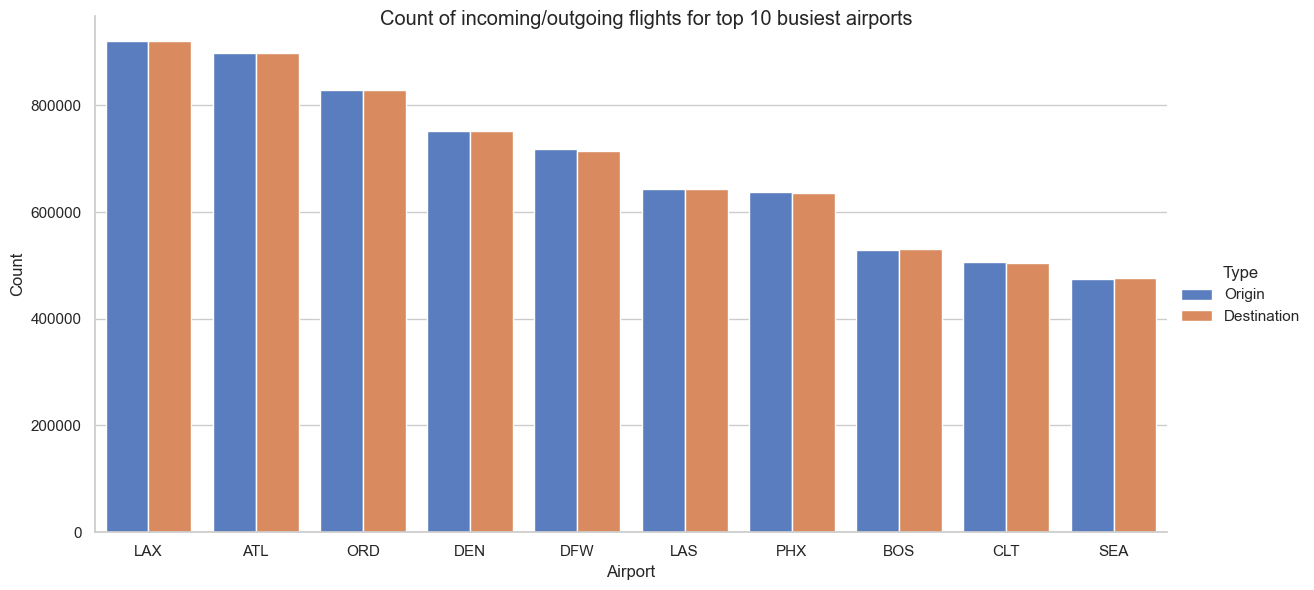

In [28]:
from pyspark.sql.functions import lit

# Group by Origin
top_origins = (df.groupBy("ORIGIN")
                 .count()
                 .orderBy(col("count").desc())
                 .limit(10)
                 .select(col("ORIGIN").alias("Airport"), col("count").alias("Origin_Count")))

# Group by Destination
top_dest = (df.groupBy("DEST")
              .count()
              .orderBy(col("count").desc())
              .limit(10)
              .select(col("DEST").alias("Airport"), col("count").alias("Dest_Count")))

# Renaming the "count" column in top_dest dataframe
top_dest = top_dest.withColumnRenamed("Dest_Count", "Count")

# Merging on airport to get the count of incoming/outgoing flights for each airport
top_airports = top_origins.join(top_dest, on="Airport", how="inner").withColumn("Difference", col("Origin_Count") - col("Count")).drop("Count")

# Defining if origin or destination
top_origins = top_origins.withColumn("Type", lit("Origin"))
top_dest = top_dest.withColumn("Type", lit("Destination"))

# Combining the dataframes
airports_df = top_origins.union(top_dest)

# Plotting bar plot
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")

# Draw a nested barplot to show count of incoming/outgoing flights for top 10 busiest airports
g = sns.catplot(x="Airport", y="Origin_Count", hue="Type", data=airports_df.toPandas(),
                height=6, kind="bar", palette="muted", aspect=2)
g.set_ylabels("Count")
plt.suptitle("Count of incoming/outgoing flights for top 10 busiest airports")
plt.show()

In [29]:
from pyspark.sql.functions import when, udf
from pyspark.sql.types import StringType

def classify(num):
    if (num < 0):
        if (num < -30):
            return ('Early: > 30 mins') 
        else:
            return ('Early: < 30 mins')
    else:
        if (num < 30):
            return ('Late: < 30 mins')
        elif (num < 250):
            return ('Late: < 5 hours')
        else:
            return ('Late: > 5 hours')

# Registering the classify function as a UDF
classify_udf = udf(classify, StringType())

# Creating a new DataFrame with the "Delay Amount" column
group_arr_df = df.select("ORIGIN", "DEST", "ARR_DELAY")
group_arr_df = group_arr_df.withColumn("Delay Amount", classify_udf("ARR_DELAY"))


In [30]:
group_arr_df.show()

+------+----+---------+----------------+
|ORIGIN|DEST|ARR_DELAY|    Delay Amount|
+------+----+---------+----------------+
|   ATL| CLT|     -5.0|Early: < 30 mins|
|   ATL| IAD|    -20.0|Early: < 30 mins|
|   ATL| IAD|     -6.0|Early: < 30 mins|
|   ATL| IAD|    188.0| Late: < 5 hours|
|   ATL| ORD|    -19.0|Early: < 30 mins|
|   BNA| CLT|    -18.0|Early: < 30 mins|
|   BNA| CLT|    -15.0|Early: < 30 mins|
|   BNA| ORD|     12.0| Late: < 30 mins|
|   BNA| ORD|     -2.0|Early: < 30 mins|
|   BOS| IAD|     43.0| Late: < 5 hours|
|   CLT| ATL|    -10.0|Early: < 30 mins|
|   CLT| BNA|    -10.0|Early: < 30 mins|
|   CLT| BNA|      0.0| Late: < 30 mins|
|   CLT| IAD|     -9.0|Early: < 30 mins|
|   CLT| IAD|     10.0| Late: < 30 mins|
|   CLT| IAD|     -6.0|Early: < 30 mins|
|   CLT| IAD|    -15.0|Early: < 30 mins|
|   CLT| IAD|    -11.0|Early: < 30 mins|
|   CLT| IAD|    113.0| Late: < 5 hours|
|   CLT| IAD|    -14.0|Early: < 30 mins|
+------+----+---------+----------------+
only showing top

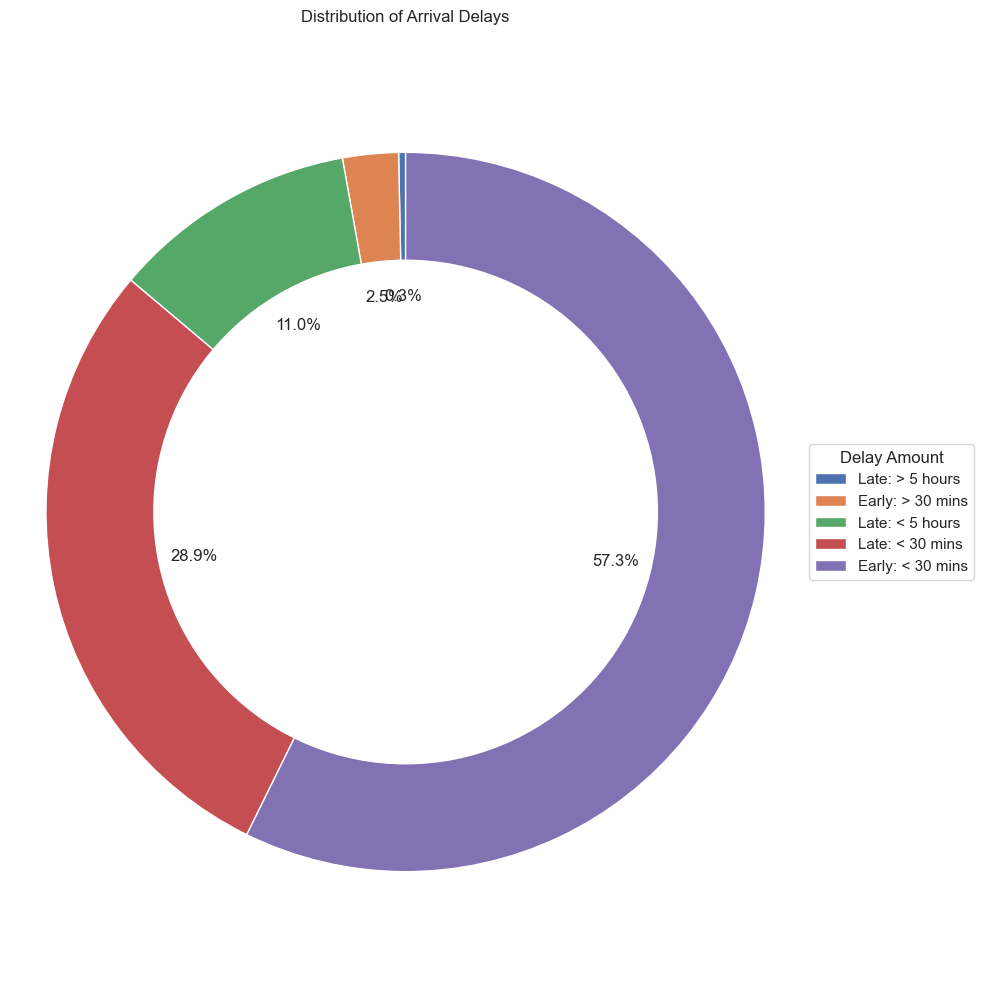

In [31]:
import matplotlib.pyplot as plt
from pyspark.sql.functions import count

group_arr_count = (
    group_arr_df
    .groupBy("Delay Amount")
    .agg(count("*").alias("Count"))
    .orderBy("Count")
)

total = group_arr_count.agg({"Count": "sum"}).collect()[0][0]
group_arr_count = group_arr_count.withColumn("Percent", group_arr_count["Count"] / total * 100)
group_arr_count = group_arr_count.toPandas().sort_values("Count")

# Pie chart
labels = group_arr_count["Delay Amount"]
sizes = group_arr_count["Percent"]

fig1, ax1 = plt.subplots(figsize=(10, 10))
wedges, texts, autotexts = ax1.pie(sizes, autopct="%1.1f%%", startangle=90)

# draw circle
centre_circle = plt.Circle((0, 0), 0.70, fc="white")
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

ax1.legend(
    wedges,
    labels,
    title="Delay Amount",
    loc="center left",
    bbox_to_anchor=(1, 0, 0.5, 1),
)

# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis("equal")
plt.tight_layout()

plt.setp(texts, size=8, weight="bold")

ax1.set_title("Distribution of Arrival Delays")

plt.show()

### Finding the top 10 airports with the most departure delay based on the number of delayed flights.

In [32]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, desc

# Filter delayed flights
delayed_flights = df.filter(col("DEP_DELAY") > 0)

# Count delays per airport
delays_by_airport = delayed_flights.groupBy("ORIGIN").count().withColumnRenamed("count", "delay_count")

# Find the top 10 airports with the most departure delays
top_10_airports = delays_by_airport.orderBy(desc("delay_count")).limit(10)

# Show the result
top_10_airports.show()

+------+-----------+
|ORIGIN|delay_count|
+------+-----------+
|   LAX|     370965|
|   ATL|     356969|
|   ORD|     352430|
|   DEN|     326952|
|   DFW|     308570|
|   PHX|     246395|
|   LAS|     245539|
|   BOS|     189787|
|   CLT|     186317|
|   SEA|     166854|
+------+-----------+



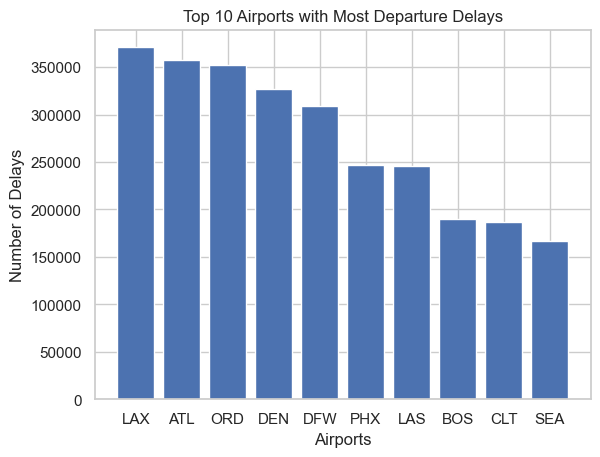

In [33]:
# Collect the data from the PySpark DataFrame to a Python list
top_10_airports_list = top_10_airports.collect()

# Separate the airports and delay counts into two lists
airports, delay_counts = zip(*[(row["ORIGIN"], row["delay_count"]) for row in top_10_airports_list])

# Create a bar chart
plt.bar(airports, delay_counts)
plt.xlabel("Airports")
plt.ylabel("Number of Delays")
plt.title("Top 10 Airports with Most Departure Delays")

# Display the plot
plt.show()


### Finding the top 10 airports with the most Arrival delays based on the number of delayed flights.

In [34]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, desc

# Filter delayed arrivals
delayed_arrivals = df.filter(col("ARR_DELAY") > 0)

# Count arrival delays per airport
delays_by_destination = delayed_arrivals.groupBy("DEST").count().withColumnRenamed("count", "arrival_delay_count")

# Find the top 10 airports with the most arrival delays
top_10_airports_arrival_delays = delays_by_destination.orderBy(desc("arrival_delay_count")).limit(10)

# Show the result
top_10_airports_arrival_delays.show()


+----+-------------------+
|DEST|arrival_delay_count|
+----+-------------------+
| LAX|             374689|
| ATL|             323983|
| ORD|             312069|
| DEN|             283265|
| DFW|             262665|
| PHX|             246510|
| LAS|             242738|
| BOS|             208835|
| CLT|             191885|
| SEA|             181438|
+----+-------------------+



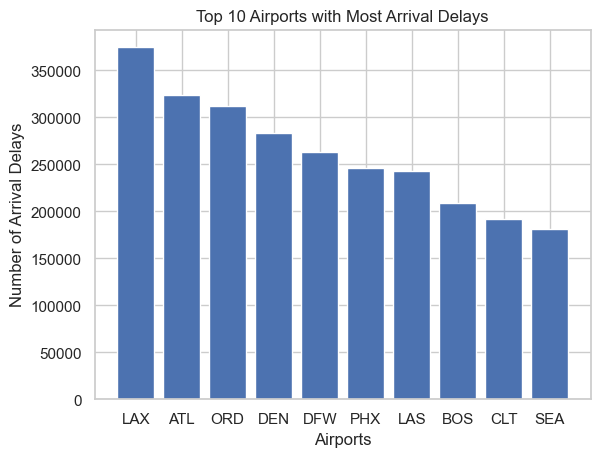

In [35]:
import matplotlib.pyplot as plt

# Collect the data from the PySpark DataFrame to a Python list
top_10_airports_arrival_delays_list = top_10_airports_arrival_delays.collect()

# Separate the airports and arrival delay counts into two lists
airports, arrival_delay_counts = zip(*[(row["DEST"], row["arrival_delay_count"]) for row in top_10_airports_arrival_delays_list])

# Create a bar chart
plt.bar(airports, arrival_delay_counts)
plt.xlabel("Airports")
plt.ylabel("Number of Arrival Delays")
plt.title("Top 10 Airports with Most Arrival Delays")

# Display the plot
plt.show()

In [36]:
from pyspark.sql.functions import col, avg

# Group by both origin and destination and getting average delay for that flight
OD_pairs_delay = df.groupBy(["ORIGIN", "DEST"]).agg(avg("ARR_DELAY").alias("avg_delay"), 
                                                                 count("*").alias("count"))

OD_pairs_delay_filter = OD_pairs_delay.filter(col("count") >= 48)

# Sorting in descending order of average delay
OD_pairs_delay_filter.orderBy(col("avg_delay").desc()).show(20)

# Sorting in ascending order of average delay
OD_pairs_delay_filter.orderBy(col("avg_delay").asc()).show(20)

+------+----+------------------+-----+
|ORIGIN|DEST|         avg_delay|count|
+------+----+------------------+-----+
|   PIT| SEA|              17.6|  115|
|   HOU| SEA|16.795994993742177|  799|
|   ORD| JFK|14.674515449077168|19451|
|   CVG| JFK|13.226273148148149| 5184|
|   JFK| ORD|13.182010527402209|19378|
|   DTW| JFK|12.780307040762308| 7556|
|   IAD| JFK| 12.45191324471234|18581|
|   MIA| JFK|12.238960313024036|35780|
|   DFW| MIA|12.118531243289672|37256|
|   SEA| HOU| 11.92938209331652|  793|
|   ORD| BNA|11.761200338123414|37856|
|   BWI| JFK|11.678596008258776| 5812|
|   CLT| JFK|10.631502168989213|26049|
|   MIA| BOS|10.540550595238095|24192|
|   HOU| BOS| 9.902614968440036| 5545|
|   HOU| CLT| 9.772786742259049| 2293|
|   IAD| BNA| 9.750703432751829| 5331|
|   DFW| HOU| 9.742058575747064|20179|
|   BNA| ORD|   9.6329086473299|36890|
|   CVG| ORD|  9.59796100489467|36979|
+------+----+------------------+-----+
only showing top 20 rows



+------+----+-------------------+------+
|ORIGIN|DEST|          avg_delay| count|
+------+----+-------------------+------+
|   SEA| PIT|-13.724137931034482|   116|
|   PHX| IAD| -8.107133790302107|  3939|
|   PIT| SLC| -6.528662420382165|   157|
|   CVG| SEA|-3.7711561382598333|  2517|
|   PIT| PHX| -3.563119688385269| 11296|
|   CVG| SLC|-3.2775805570726377|  7324|
|   SEA| CVG|-3.2770700636942673|  2512|
|   SLC| DTW|-2.7807101727447217| 14588|
|   PIT| LAX|    -2.726318359375|  4096|
|   PIT| LAS|-2.7029972752043596|  8441|
|   SEA| IAD|-2.3593576492696675| 11707|
|   SLC| CVG|-2.3526279863481228|  7325|
|   JFK| LAX| -2.299262390852576|112119|
|   LAS| IAD|-2.0850302970100327| 10067|
|   PIT| BNA|-2.0471877979027644|  2098|
|   DTW| PHX|-1.9059333310587192| 29309|
|   BNA| SEA|-1.8925570228091237|  3332|
|   PIT| DEN|-1.8899358045143921|  9658|
|   BNA| LAS|-1.8797958797958798| 10582|
|   PIT| HOU|-1.8578897338403042|  2104|
+------+----+-------------------+------+
only showing top

In [37]:
#Calculating baseline values of average delay for each airline
from pyspark.sql.functions import avg

airline_delay_df = df.groupBy("OP_CARRIER").agg(avg("ARR_DELAY").alias("avg_delay"))
airline_delay_df.show()

+----------+-------------------+
|OP_CARRIER|          avg_delay|
+----------+-------------------+
|        UA|  2.313499993754918|
|        AA|  5.094459137757328|
|        NW|  5.139012099115209|
|        EV| 10.590330166867048|
|        B6|  7.186595059174367|
|        DL| 1.3545907361066891|
|        OO|  6.899761815695649|
|        F9|  8.460240214172405|
|        YV|    6.4899272480656|
|        US| 2.0955633969948937|
|        MQ|  8.381512808053522|
|        OH|  9.200756788224043|
|        AS|-0.7460061978244371|
|        FL|  3.907857098513393|
|        WN| 5.2073644256358795|
|        9E|  5.905277774452651|
|        XE|   8.64446655352022|
|        CO|  4.743045017703591|
|        VX| 2.4841242517463877|
|        NK|   8.62104435980574|
+----------+-------------------+
only showing top 20 rows



In [38]:
from pyspark.sql.functions import avg

# calculate average delay for each airline
airline_delay_df = df.groupBy("OP_CARRIER").agg(avg("ARR_DELAY").alias("avg_delay"))

# join the airline_delay_df DataFrame with the combined_data_v2 DataFrame
df = df.join(airline_delay_df, on="OP_CARRIER")


In [39]:
from pyspark.sql.functions import col, dayofweek, to_date

# Converting FL_DATE from string to datetime
df = df.withColumn("FL_DATE", to_date(col("FL_DATE")))

# Extracting the weekday from FL_DATE
df = df.withColumn("flight_weekday", dayofweek(col("FL_DATE")))

In [40]:
from pyspark.sql.functions import col, date_format, when
from pyspark.sql.types import IntegerType


# Set the legacy time parser policy
spark.conf.set("spark.sql.legacy.timeParserPolicy", "LEGACY")


spark_df = df

# Extract the day of the week from the 'FL_DATE' column
spark_df = spark_df.withColumn('flight_weekday', date_format(col('FL_DATE'), 'u').cast(IntegerType()))

# Create new columns for each day of the week with 1 or 0 values based on the 'flight_weekday'
for i in range(1, 8):
    spark_df = spark_df.withColumn(f'flight_weekday_{i}', when(col('flight_weekday') == i, 1).otherwise(0))

# Drop the 'flight_weekday' column
spark_df = spark_df.drop('flight_weekday')

# Show the resulting DataFrame
spark_df.show()


+----------+----------+-----------------+------+----+------------+--------+---------+--------+----------+---------+-------+------------+--------+---------+---------+----------------+-------------------+--------+--------+-----------------+----------------+----------------+----------------+----------------+----------------+----------------+----------------+
|OP_CARRIER|   FL_DATE|OP_CARRIER_FL_NUM|ORIGIN|DEST|CRS_DEP_TIME|DEP_TIME|DEP_DELAY|TAXI_OUT|WHEELS_OFF|WHEELS_ON|TAXI_IN|CRS_ARR_TIME|ARR_TIME|ARR_DELAY|CANCELLED|CRS_ELAPSED_TIME|ACTUAL_ELAPSED_TIME|AIR_TIME|DISTANCE|        avg_delay|flight_weekday_1|flight_weekday_2|flight_weekday_3|flight_weekday_4|flight_weekday_5|flight_weekday_6|flight_weekday_7|
+----------+----------+-----------------+------+----+------------+--------+---------+--------+----------+---------+-------+------------+--------+---------+---------+----------------+-------------------+--------+--------+-----------------+----------------+----------------+------------

### Airports with most departure delay based on on the total delay duration

In [41]:
from pyspark.sql.functions import sum

# Filter the DataFrame to keep only flights with departure delay
delayed_flights = spark_df.filter(spark_df.DEP_DELAY > 0)

# Group by departure airport and aggregate departure delays
airport_delays = delayed_flights.groupBy('ORIGIN').agg(sum('DEP_DELAY').alias('total_delay'))

# Sort the resulting DataFrame by total departure delays in descending order
sorted_airport_delays = airport_delays.sort('total_delay', ascending=False)

# Select the top 10 airports with the highest departure delays
top_airport_delays = sorted_airport_delays.limit(10)

# Show the results
top_airport_delays.show()

+------+-----------+
|ORIGIN|total_delay|
+------+-----------+
|   ORD|1.2308306E7|
|   LAX|1.0180411E7|
|   ATL|  9778735.0|
|   DFW|  9381505.0|
|   DEN|  9212820.0|
|   LAS|  7127817.0|
|   BOS|  6449839.0|
|   JFK|  6212181.0|
|   PHX|  6123221.0|
|   CLT|  5401366.0|
+------+-----------+



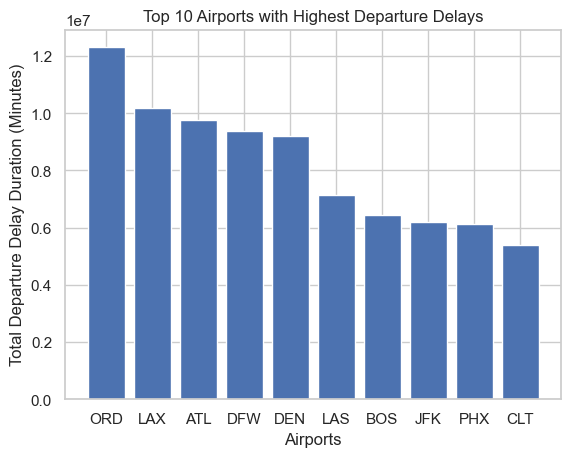

In [42]:
import matplotlib.pyplot as plt

# Collect the data from the PySpark DataFrame to a Python list
top_airport_delays_list = top_airport_delays.collect()

# Separate the airports and total departure delay durations into two lists
airports, total_delays = zip(*[(row["ORIGIN"], row["total_delay"]) for row in top_airport_delays_list])

# Create a bar chart
plt.bar(airports, total_delays)
plt.xlabel("Airports")
plt.ylabel("Total Departure Delay Duration (Minutes)")
plt.title("Top 10 Airports with Highest Departure Delays")

# Display the plot
plt.show()

### Airports with most arrival delay based on on the total delay duration

In [43]:
from pyspark.sql.functions import sum

# Filter the DataFrame to keep only flights with arrival delay
delayed_arrivals = spark_df.filter(spark_df.ARR_DELAY > 0)

# Group by destination airport and aggregate arrival delays
airport_arrival_delays = delayed_arrivals.groupBy('DEST').agg(sum('ARR_DELAY').alias('total_arrival_delay'))

# Sort the resulting DataFrame by total arrival delays in descending order
sorted_airport_arrival_delays = airport_arrival_delays.sort('total_arrival_delay', ascending=False)

# Select the top 10 airports with the highest arrival delays
top_airport_arrival_delays = sorted_airport_arrival_delays.limit(10)

# Show the results
top_airport_arrival_delays.show()


+----+-------------------+
|DEST|total_arrival_delay|
+----+-------------------+
| ORD|        1.2239182E7|
| LAX|        1.1265887E7|
| ATL|         1.045922E7|
| DFW|          8959253.0|
| DEN|          8506957.0|
| BOS|          7601253.0|
| JFK|          7137657.0|
| LAS|          6954975.0|
| PHX|          6488280.0|
| CLT|          5243242.0|
+----+-------------------+



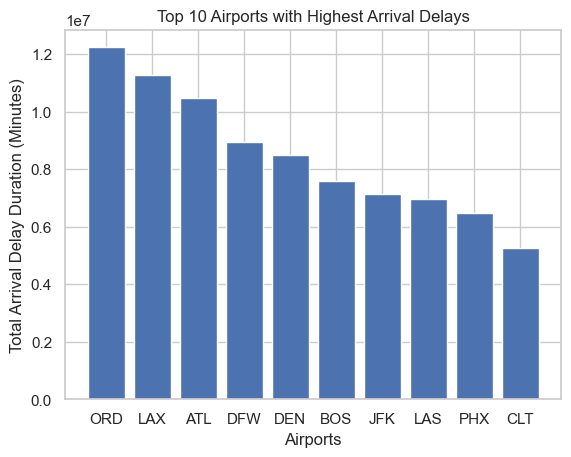

In [44]:
import matplotlib.pyplot as plt

# Collect the data from the PySpark DataFrame to a Python list
top_airport_arrival_delays_list = top_airport_arrival_delays.collect()

# Separate the airports and total arrival delay durations into two lists
airports, total_arrival_delays = zip(*[(row["DEST"], row["total_arrival_delay"]) for row in top_airport_arrival_delays_list])

# Create a bar chart
plt.bar(airports, total_arrival_delays)
plt.xlabel("Airports")
plt.ylabel("Total Arrival Delay Duration (Minutes)")
plt.title("Top 10 Airports with Highest Arrival Delays")

# Display the plot
plt.show()


In [45]:
from pyspark.sql.functions import year, month, dayofmonth

# Split FL_DATE column into separate columns for year, month, and day of the month
spark_df = spark_df.withColumn('Year', year(spark_df['FL_DATE'])) \
                   .withColumn('Month', month(spark_df['FL_DATE'])) \
                   .withColumn('Day_of_Month', dayofmonth(spark_df['FL_DATE']))

# Show the updated DataFrame
spark_df.show()

+----------+----------+-----------------+------+----+------------+--------+---------+--------+----------+---------+-------+------------+--------+---------+---------+----------------+-------------------+--------+--------+-----------------+----------------+----------------+----------------+----------------+----------------+----------------+----------------+----+-----+------------+
|OP_CARRIER|   FL_DATE|OP_CARRIER_FL_NUM|ORIGIN|DEST|CRS_DEP_TIME|DEP_TIME|DEP_DELAY|TAXI_OUT|WHEELS_OFF|WHEELS_ON|TAXI_IN|CRS_ARR_TIME|ARR_TIME|ARR_DELAY|CANCELLED|CRS_ELAPSED_TIME|ACTUAL_ELAPSED_TIME|AIR_TIME|DISTANCE|        avg_delay|flight_weekday_1|flight_weekday_2|flight_weekday_3|flight_weekday_4|flight_weekday_5|flight_weekday_6|flight_weekday_7|Year|Month|Day_of_Month|
+----------+----------+-----------------+------+----+------------+--------+---------+--------+----------+---------+-------+------------+--------+---------+---------+----------------+-------------------+--------+--------+----------------

In [46]:
not_needed = ('FL_DATE','OP_CARRIER_FL_NUM','CRS_DEP_TIME', 'DEP_TIME', 'WHEELS_OFF', 'WHEELS_ON', 'CRS_ARR_TIME',
                                    'CANCELLED')
spark_df=spark_df.drop(*not_needed)

In [47]:
# Get the shape of the DataFrame
num_rows = spark_df.count()
num_cols = len(spark_df.columns)

print("Shape of DataFrame: ({}, {})".format(num_rows, num_cols))

Shape of DataFrame: (10041056, 23)


In [48]:
spark_df.write.format("com.mongodb.spark.sql.DefaultSource").mode("append").save()

In [59]:
#create vector assembler
feature_columns = ['DEP_DELAY','TAXI_OUT', 'CRS_ELAPSED_TIME', 'DISTANCE', 
                   'flight_weekday_1', 'flight_weekday_2', 'flight_weekday_3', 
                   'flight_weekday_4', 'flight_weekday_5', 'flight_weekday_6',
                   'flight_weekday_7']
from pyspark.ml.feature import VectorAssembler
assembler = VectorAssembler(inputCols=feature_columns,outputCol="features")

df_v2 = assembler.transform(spark_df)
df_v2 = df_v2.select(['features', 'ARR_DELAY'])
df_v2.show()

+--------------------+---------+
|            features|ARR_DELAY|
+--------------------+---------+
|(11,[1,2,3,7],[13...|    -14.0|
|(11,[1,2,3,7],[12...|    -11.0|
|(11,[0,1,2,3,7],[...|    -23.0|
|(11,[0,1,2,3,7],[...|     -8.0|
|(11,[0,1,2,3,7],[...|     45.0|
|(11,[0,1,2,3,7],[...|    -10.0|
|(11,[0,1,2,3,7],[...|    -16.0|
|(11,[0,1,2,3,7],[...|      2.0|
|(11,[0,1,2,3,7],[...|    -16.0|
|(11,[0,1,2,3,7],[...|    -16.0|
|(11,[0,1,2,3,7],[...|     -6.0|
|(11,[0,1,2,3,7],[...|      7.0|
|(11,[0,1,2,3,7],[...|     -8.0|
|(11,[0,1,2,3,7],[...|    -17.0|
|(11,[0,1,2,3,7],[...|    -39.0|
|(11,[0,1,2,3,7],[...|      2.0|
|(11,[0,1,2,3,7],[...|    -20.0|
|(11,[0,1,2,3,7],[...|     -1.0|
|(11,[0,1,2,3,7],[...|    -17.0|
|(11,[0,1,2,3,7],[...|    -10.0|
+--------------------+---------+
only showing top 20 rows



In [60]:
# Define the feature columns for departure delay prediction
dep_feature_columns = ['ARR_DELAY','TAXI_IN', 'CRS_ELAPSED_TIME', 'DISTANCE', 
                       'flight_weekday_1', 'flight_weekday_2', 'flight_weekday_3', 
                       'flight_weekday_4', 'flight_weekday_5', 'flight_weekday_6',
                       'flight_weekday_7']

# Create a Vector Assembler for departure delay prediction
dep_assembler = VectorAssembler(inputCols=dep_feature_columns, outputCol='dep_features')

# Apply the Vector Assembler to the DataFrame
dep_df_v2 = dep_assembler.transform(spark_df)
dep_df_v2 = dep_df_v2.select(['dep_features', 'DEP_DELAY'])
dep_df_v2.show()

+--------------------+---------+
|        dep_features|DEP_DELAY|
+--------------------+---------+
|(11,[0,1,2,3,7],[...|      0.0|
|(11,[0,1,2,3,7],[...|      0.0|
|(11,[0,1,2,3,7],[...|     -4.0|
|(11,[0,1,2,3,7],[...|      1.0|
|(11,[0,1,2,3,7],[...|     78.0|
|(11,[0,1,2,3,7],[...|      1.0|
|(11,[0,1,2,3,7],[...|     -4.0|
|(11,[0,1,2,3,7],[...|     -1.0|
|(11,[0,1,2,3,7],[...|      2.0|
|(11,[0,1,2,3,7],[...|     -6.0|
|(11,[0,1,2,3,7],[...|     -5.0|
|(11,[0,1,2,3,7],[...|     10.0|
|(11,[0,1,2,3,7],[...|      2.0|
|(11,[0,1,2,3,7],[...|     -6.0|
|(11,[0,1,2,3,7],[...|     -5.0|
|(11,[0,1,2,3,7],[...|     -4.0|
|(11,[0,1,2,3,7],[...|     -2.0|
|(11,[0,1,2,3,7],[...|     -3.0|
|(11,[0,1,2,3,7],[...|     -4.0|
|(11,[0,1,2,3,7],[...|     -4.0|
+--------------------+---------+
only showing top 20 rows



In [61]:
train, test = df_v2.randomSplit([0.8, 0.2])

In [62]:
dep_train, dep_test = dep_df_v2.randomSplit([0.8, 0.2])

In [63]:
from pyspark.ml.regression import LinearRegression
spark.conf.set("spark.sql.legacy.timeParserPolicy", "LEGACY")

#Creating model
lreg_v1 = LinearRegression(featuresCol="features", labelCol="ARR_DELAY")
lr_model_v1 = lreg_v1.fit(train)

23/05/12 13:35:10 WARN Instrumentation: [ebf9c02a] regParam is zero, which might cause numerical instability and overfitting.
23/05/12 13:35:25 WARN InstanceBuilder: Failed to load implementation from:dev.ludovic.netlib.blas.JNIBLAS
23/05/12 13:35:30 WARN InstanceBuilder: Failed to load implementation from:dev.ludovic.netlib.lapack.JNILAPACK


In [64]:
from pyspark.ml.evaluation import RegressionEvaluator

#Transforming test set
predictions_v1 = lr_model_v1.transform(test)

In [65]:
predictions_v1.show()

+--------------------+---------+-------------------+
|            features|ARR_DELAY|         prediction|
+--------------------+---------+-------------------+
|(11,[0,1,2,3,4],[...|    -32.0| -36.30597350716003|
|(11,[0,1,2,3,4],[...|    -33.0|-19.299291759145504|
|(11,[0,1,2,3,4],[...|    -28.0| -26.22633819490946|
|(11,[0,1,2,3,4],[...|     -2.0|  -13.2033959285217|
|(11,[0,1,2,3,4],[...|    -37.0| -25.93989086774262|
|(11,[0,1,2,3,4],[...|    -26.0| -25.80841269692033|
|(11,[0,1,2,3,4],[...|     10.0|-26.155287376246548|
|(11,[0,1,2,3,4],[...|    -23.0| -7.565731470731649|
|(11,[0,1,2,3,4],[...|    -29.0|-26.706912828576378|
|(11,[0,1,2,3,4],[...|     -9.0| -23.00805798721437|
|(11,[0,1,2,3,4],[...|    -25.0|-23.602642857854505|
|(11,[0,1,2,3,4],[...|    -17.0| -17.29661529182863|
|(11,[0,1,2,3,4],[...|    -31.0|-23.392807440534924|
|(11,[0,1,2,3,4],[...|    -31.0|-19.685691547074157|
|(11,[0,1,2,3,4],[...|    -24.0|-19.308232304680814|
|(11,[0,1,2,3,4],[...|    -36.0|-28.0801528157

In [66]:
print("Best Param (regParam): %g" % lr_model_v1._java_obj.getRegParam())

print("Best Param (MaxIter):  %g" %lr_model_v1._java_obj.getMaxIter())

print("Best Param (elasticNetParam):  %g" % lr_model_v1._java_obj.getElasticNetParam())

Best Param (regParam): 0
Best Param (MaxIter):  100
Best Param (elasticNetParam):  0


In [67]:
from pyspark.ml.regression import LinearRegression

# Train a Linear Regression model on the departure delay features
dep_lreg = LinearRegression(featuresCol='dep_features', labelCol='DEP_DELAY', maxIter=10, regParam=0.1, elasticNetParam=0.8)
dep_lr_model = dep_lreg.fit(dep_train)

# Generate predictions on the test set
dep_predictions = dep_lr_model.transform(dep_test)


In [68]:
dep_predictions.show()

+--------------------+---------+-------------------+
|        dep_features|DEP_DELAY|         prediction|
+--------------------+---------+-------------------+
|(11,[0,1,2,3,4],[...|     -8.0| -58.59369820110312|
|(11,[0,1,2,3,4],[...|     -5.0|-62.684174857001395|
|(11,[0,1,2,3,4],[...|      2.0|-58.260582181261555|
|(11,[0,1,2,3,4],[...|     -7.0| -59.65578755016129|
|(11,[0,1,2,3,4],[...|     -4.0| -55.27729971088981|
|(11,[0,1,2,3,4],[...|     -3.0| -49.14278550345087|
|(11,[0,1,2,3,4],[...|     -6.0|  -50.9395793208052|
|(11,[0,1,2,3,4],[...|    -13.0| -52.45942314529924|
|(11,[0,1,2,3,4],[...|     -4.0| -45.89763181323301|
|(11,[0,1,2,3,4],[...|     -7.0| -45.82913114553869|
|(11,[0,1,2,3,4],[...|     -3.0| -48.90011319695678|
|(11,[0,1,2,3,4],[...|     -3.0|-52.960992302051295|
|(11,[0,1,2,3,4],[...|     -1.0| -47.83763840618244|
|(11,[0,1,2,3,4],[...|      2.0|-43.670545625391675|
|(11,[0,1,2,3,4],[...|     -4.0|  -44.0848946715976|
|(11,[0,1,2,3,4],[...|      8.0| -40.868180068

In [69]:
from pyspark.ml.regression import DecisionTreeRegressor
from pyspark.ml.evaluation import RegressionEvaluator

# Creating model
dtreg = DecisionTreeRegressor(featuresCol="features", labelCol="ARR_DELAY")
dt_model = dtreg.fit(train)


# Transforming test set
predictions_dt = dt_model.transform(test)


# eval_reg = RegressionEvaluator(labelCol="ARR_DELAY", metricName="r2")
# print("Decision Tree Regressor")
# # Compute R2 on test data
# print("R2 on test data = %g" % eval_reg.evaluate(predictions_dt))

# # Compute RMSE on test data
# eval_reg.setMetricName("rmse")
# print("RMSE on test data = %g" % eval_reg.evaluate(predictions_dt))

23/05/12 13:44:35 WARN MemoryStore: Not enough space to cache rdd_2633_5 in memory! (computed 18.6 MiB so far)
23/05/12 13:44:35 WARN MemoryStore: Not enough space to cache rdd_2633_2 in memory! (computed 18.6 MiB so far)
23/05/12 13:44:35 WARN MemoryStore: Not enough space to cache rdd_2633_3 in memory! (computed 18.6 MiB so far)
23/05/12 13:44:35 WARN MemoryStore: Not enough space to cache rdd_2633_4 in memory! (computed 41.8 MiB so far)
23/05/12 13:44:35 WARN MemoryStore: Not enough space to cache rdd_2633_1 in memory! (computed 27.9 MiB so far)
23/05/12 13:44:35 WARN MemoryStore: Not enough space to cache rdd_2633_7 in memory! (computed 41.8 MiB so far)
23/05/12 13:44:35 WARN MemoryStore: Not enough space to cache rdd_2633_0 in memory! (computed 41.8 MiB so far)
23/05/12 13:44:35 WARN BlockManager: Persisting block rdd_2633_1 to disk instead.
23/05/12 13:44:35 WARN BlockManager: Persisting block rdd_2633_7 to disk instead.
23/05/12 13:44:35 WARN BlockManager: Persisting block rdd_2

In [70]:
predictions_dt.show()

+--------------------+---------+-------------------+
|            features|ARR_DELAY|         prediction|
+--------------------+---------+-------------------+
|(11,[0,1,2,3,4],[...|    -32.0|-11.330882235953089|
|(11,[0,1,2,3,4],[...|    -33.0| 2.2075643634433337|
|(11,[0,1,2,3,4],[...|    -28.0|-11.330882235953089|
|(11,[0,1,2,3,4],[...|     -2.0| -5.748565155167118|
|(11,[0,1,2,3,4],[...|    -37.0|-11.330882235953089|
|(11,[0,1,2,3,4],[...|    -26.0|-11.330882235953089|
|(11,[0,1,2,3,4],[...|     10.0|-11.330882235953089|
|(11,[0,1,2,3,4],[...|    -23.0| 2.2075643634433337|
|(11,[0,1,2,3,4],[...|    -29.0|-11.330882235953089|
|(11,[0,1,2,3,4],[...|     -9.0|-11.330882235953089|
|(11,[0,1,2,3,4],[...|    -25.0|-11.330882235953089|
|(11,[0,1,2,3,4],[...|    -17.0|-11.330882235953089|
|(11,[0,1,2,3,4],[...|    -31.0| -5.748565155167118|
|(11,[0,1,2,3,4],[...|    -31.0| -5.748565155167118|
|(11,[0,1,2,3,4],[...|    -24.0| -5.748565155167118|
|(11,[0,1,2,3,4],[...|    -36.0|-11.3308822359

In [71]:
from pyspark.ml.regression import DecisionTreeRegressor
from pyspark.ml.evaluation import RegressionEvaluator

# Train a Decision Tree Regressor on the departure delay features
dep_dtreg = DecisionTreeRegressor(featuresCol='dep_features', labelCol='DEP_DELAY', maxDepth=10, maxBins=32)
dep_dt_model = dep_dtreg.fit(dep_train)

# Generate predictions on the test set
dep_predictions_dt = dep_dt_model.transform(dep_test)

# # Evaluate the model's performance on the test set using R2 and RMSE metrics
# dep_eval_reg = RegressionEvaluator(labelCol='DEP_DELAY', metricName='r2')
# dep_r2 = dep_eval_reg.evaluate(dep_predictions_dt)
# print('R2 on test data =', dep_r2)

# dep_eval_reg.setMetricName('rmse')
# dep_rmse = dep_eval_reg.evaluate(dep_predictions_dt)
# print('RMSE on test data =', dep_rmse)


23/05/12 13:47:58 WARN MemoryStore: Not enough space to cache rdd_2802_4 in memory! (computed 41.8 MiB so far)
23/05/12 13:47:58 WARN MemoryStore: Not enough space to cache rdd_2802_6 in memory! (computed 27.9 MiB so far)
23/05/12 13:47:58 WARN BlockManager: Persisting block rdd_2802_6 to disk instead.
23/05/12 13:47:58 WARN BlockManager: Persisting block rdd_2802_4 to disk instead.
23/05/12 13:47:58 WARN MemoryStore: Not enough space to cache rdd_2802_7 in memory! (computed 27.9 MiB so far)
23/05/12 13:47:58 WARN MemoryStore: Not enough space to cache rdd_2802_0 in memory! (computed 41.8 MiB so far)
23/05/12 13:47:58 WARN BlockManager: Persisting block rdd_2802_0 to disk instead.
23/05/12 13:47:58 WARN BlockManager: Persisting block rdd_2802_7 to disk instead.
23/05/12 13:47:58 WARN MemoryStore: Not enough space to cache rdd_2802_3 in memory! (computed 62.8 MiB so far)
23/05/12 13:47:58 WARN MemoryStore: Not enough space to cache rdd_2802_2 in memory! (computed 41.8 MiB so far)
23/05/

23/05/12 13:48:22 WARN MemoryStore: Not enough space to cache rdd_2802_3 in memory! (computed 43.8 MiB so far)
23/05/12 13:48:22 WARN MemoryStore: Not enough space to cache rdd_2802_7 in memory! (computed 43.8 MiB so far)
23/05/12 13:48:24 WARN MemoryStore: Not enough space to cache rdd_2802_5 in memory! (computed 12.9 MiB so far)
23/05/12 13:48:24 WARN MemoryStore: Not enough space to cache rdd_2802_3 in memory! (computed 12.9 MiB so far)
23/05/12 13:48:24 WARN MemoryStore: Not enough space to cache rdd_2802_7 in memory! (computed 12.9 MiB so far)
23/05/12 13:48:24 WARN MemoryStore: Not enough space to cache rdd_2802_2 in memory! (computed 12.9 MiB so far)
23/05/12 13:48:24 WARN MemoryStore: Not enough space to cache rdd_2802_1 in memory! (computed 12.9 MiB so far)
23/05/12 13:48:24 WARN MemoryStore: Not enough space to cache rdd_2802_4 in memory! (computed 12.9 MiB so far)
23/05/12 13:48:25 WARN MemoryStore: Not enough space to cache rdd_2802_0 in memory! (computed 99.9 MiB so far)


In [72]:
dep_predictions_dt.show()

+--------------------+---------+-------------------+
|        dep_features|DEP_DELAY|         prediction|
+--------------------+---------+-------------------+
|(11,[0,1,2,3,4],[...|     -8.0|-3.1731104343435987|
|(11,[0,1,2,3,4],[...|     -5.0|-3.1731104343435987|
|(11,[0,1,2,3,4],[...|      2.0|-3.1731104343435987|
|(11,[0,1,2,3,4],[...|     -7.0|-3.1731104343435987|
|(11,[0,1,2,3,4],[...|     -4.0|-3.1731104343435987|
|(11,[0,1,2,3,4],[...|     -3.0|-3.1731104343435987|
|(11,[0,1,2,3,4],[...|     -6.0|-3.1731104343435987|
|(11,[0,1,2,3,4],[...|    -13.0|-3.1731104343435987|
|(11,[0,1,2,3,4],[...|     -4.0|-3.1731104343435987|
|(11,[0,1,2,3,4],[...|     -7.0|-3.1731104343435987|
|(11,[0,1,2,3,4],[...|     -3.0|-3.1731104343435987|
|(11,[0,1,2,3,4],[...|     -3.0|-3.1731104343435987|
|(11,[0,1,2,3,4],[...|     -1.0|-3.1731104343435987|
|(11,[0,1,2,3,4],[...|      2.0|-3.1731104343435987|
|(11,[0,1,2,3,4],[...|     -4.0|-3.1731104343435987|
|(11,[0,1,2,3,4],[...|      8.0|-3.17311043434

In [73]:
from pyspark.ml.regression import RandomForestRegressor
from pyspark.ml.evaluation import RegressionEvaluator
# Creating model
rfreg = RandomForestRegressor(featuresCol="features", labelCol="ARR_DELAY")
rf_model = rfreg.fit(train)

# Transforming test set
predictions_rf = rf_model.transform(test)

23/05/12 13:51:26 WARN MemoryStore: Not enough space to cache rdd_2986_1 in memory! (computed 40.8 MiB so far)
23/05/12 13:51:26 WARN MemoryStore: Not enough space to cache rdd_2986_6 in memory! (computed 40.8 MiB so far)
23/05/12 13:51:26 WARN MemoryStore: Not enough space to cache rdd_2986_0 in memory! (computed 40.8 MiB so far)
23/05/12 13:51:26 WARN MemoryStore: Not enough space to cache rdd_2986_5 in memory! (computed 40.8 MiB so far)
23/05/12 13:51:26 WARN MemoryStore: Not enough space to cache rdd_2986_7 in memory! (computed 40.8 MiB so far)
23/05/12 13:51:26 WARN MemoryStore: Not enough space to cache rdd_2986_4 in memory! (computed 40.8 MiB so far)
23/05/12 13:51:26 WARN MemoryStore: Not enough space to cache rdd_2986_3 in memory! (computed 40.8 MiB so far)
23/05/12 13:51:26 WARN BlockManager: Persisting block rdd_2986_3 to disk instead.
23/05/12 13:51:26 WARN BlockManager: Persisting block rdd_2986_6 to disk instead.
23/05/12 13:51:26 WARN BlockManager: Persisting block rdd_2

In [74]:
predictions_rf.show()

+--------------------+---------+-------------------+
|            features|ARR_DELAY|         prediction|
+--------------------+---------+-------------------+
|(11,[0,1,2,3,4],[...|    -32.0|-5.8984943126733835|
|(11,[0,1,2,3,4],[...|    -33.0| 14.372115914805471|
|(11,[0,1,2,3,4],[...|    -28.0|-5.8984943126733835|
|(11,[0,1,2,3,4],[...|     -2.0| -4.151222404756828|
|(11,[0,1,2,3,4],[...|    -37.0|-5.8984943126733835|
|(11,[0,1,2,3,4],[...|    -26.0|-5.8984943126733835|
|(11,[0,1,2,3,4],[...|     10.0| -5.370278633543759|
|(11,[0,1,2,3,4],[...|    -23.0| 14.372115914805471|
|(11,[0,1,2,3,4],[...|    -29.0|-5.8984943126733835|
|(11,[0,1,2,3,4],[...|     -9.0|-5.8984943126733835|
|(11,[0,1,2,3,4],[...|    -25.0| -5.370278633543759|
|(11,[0,1,2,3,4],[...|    -17.0| -6.665949419424632|
|(11,[0,1,2,3,4],[...|    -31.0| -5.370278633543759|
|(11,[0,1,2,3,4],[...|    -31.0|-2.8691846481435337|
|(11,[0,1,2,3,4],[...|    -24.0|-2.8691846481435337|
|(11,[0,1,2,3,4],[...|    -36.0|-5.89849431267

In [75]:
from pyspark.ml.regression import RandomForestRegressor
from pyspark.ml.evaluation import RegressionEvaluator

# Train a Random Forest Regressor on the departure delay features
dep_rfreg = RandomForestRegressor(featuresCol='dep_features', labelCol='DEP_DELAY', numTrees=10, maxDepth=10)
dep_rf_model = dep_rfreg.fit(dep_train)

# Generate predictions on the test set
dep_predictions_rf = dep_rf_model.transform(dep_test)

# # Evaluate the model's performance on the test set using R2 and RMSE metrics
# dep_eval_reg = RegressionEvaluator(labelCol='DEP_DELAY', metricName='r2')
# dep_r2 = dep_eval_reg.evaluate(dep_predictions_rf)
# print('R2 on test data =', dep_r2)

# dep_eval_reg.setMetricName('rmse')
# dep_rmse = dep_eval_reg.evaluate(dep_predictions_rf)
# print('RMSE on test data =', dep_rmse)


23/05/12 13:55:39 WARN MemoryStore: Not enough space to cache rdd_3155_2 in memory! (computed 29.6 MiB so far)
23/05/12 13:55:39 WARN MemoryStore: Not enough space to cache rdd_3155_6 in memory! (computed 44.4 MiB so far)
23/05/12 13:55:39 WARN MemoryStore: Not enough space to cache rdd_3155_1 in memory! (computed 29.6 MiB so far)
23/05/12 13:55:39 WARN MemoryStore: Not enough space to cache rdd_3155_3 in memory! (computed 44.4 MiB so far)
23/05/12 13:55:39 WARN BlockManager: Persisting block rdd_3155_1 to disk instead.
23/05/12 13:55:39 WARN BlockManager: Persisting block rdd_3155_2 to disk instead.
23/05/12 13:55:39 WARN BlockManager: Persisting block rdd_3155_6 to disk instead.
23/05/12 13:55:39 WARN BlockManager: Persisting block rdd_3155_3 to disk instead.
23/05/12 13:55:40 WARN MemoryStore: Not enough space to cache rdd_3155_4 in memory! (computed 44.4 MiB so far)
23/05/12 13:55:40 WARN BlockManager: Persisting block rdd_3155_4 to disk instead.
23/05/12 13:55:40 WARN MemoryStore:

23/05/12 13:56:41 WARN MemoryStore: Not enough space to cache rdd_3155_7 in memory! (computed 19.7 MiB so far)
23/05/12 13:56:41 WARN MemoryStore: Not enough space to cache rdd_3155_1 in memory! (computed 19.7 MiB so far)
23/05/12 13:56:41 WARN MemoryStore: Not enough space to cache rdd_3155_6 in memory! (computed 19.7 MiB so far)
23/05/12 13:56:41 WARN MemoryStore: Not enough space to cache rdd_3155_0 in memory! (computed 19.7 MiB so far)
23/05/12 13:56:41 WARN MemoryStore: Not enough space to cache rdd_3155_5 in memory! (computed 29.6 MiB so far)
23/05/12 13:56:41 WARN MemoryStore: Not enough space to cache rdd_3155_3 in memory! (computed 29.6 MiB so far)
23/05/12 13:56:41 WARN MemoryStore: Not enough space to cache rdd_3155_4 in memory! (computed 29.6 MiB so far)
23/05/12 13:56:41 WARN MemoryStore: Not enough space to cache rdd_3155_2 in memory! (computed 29.6 MiB so far)
23/05/12 13:56:49 WARN DAGScheduler: Broadcasting large task binary with size 1326.7 KiB
23/05/12 13:56:50 WARN 

In [76]:
dep_predictions_rf.show()

+--------------------+---------+--------------------+
|        dep_features|DEP_DELAY|          prediction|
+--------------------+---------+--------------------+
|(11,[0,1,2,3,4],[...|     -8.0| -0.5302058485481032|
|(11,[0,1,2,3,4],[...|     -5.0| -0.7018262245453608|
|(11,[0,1,2,3,4],[...|      2.0| -0.5302058485481032|
|(11,[0,1,2,3,4],[...|     -7.0| -0.3186495245493902|
|(11,[0,1,2,3,4],[...|     -4.0| -0.5531490440353569|
|(11,[0,1,2,3,4],[...|     -3.0| -0.2957063290621364|
|(11,[0,1,2,3,4],[...|     -6.0| -0.7018262245453608|
|(11,[0,1,2,3,4],[...|    -13.0| -0.7018262245453608|
|(11,[0,1,2,3,4],[...|     -4.0| -0.5531490440353569|
|(11,[0,1,2,3,4],[...|     -7.0| -0.5531490440353569|
|(11,[0,1,2,3,4],[...|     -3.0| -0.7018262245453608|
|(11,[0,1,2,3,4],[...|     -3.0| -1.2001297611793789|
|(11,[0,1,2,3,4],[...|     -1.0|-0.13648808030579404|
|(11,[0,1,2,3,4],[...|      2.0| -0.5302058485481032|
|(11,[0,1,2,3,4],[...|     -4.0| -0.5531490440353569|
|(11,[0,1,2,3,4],[...|      

               Model  R2 Score       RMSE
0  Linear Regression  0.918088  11.196659
1      Decision Tree  0.685824  21.928153
2      Random Forest  0.652118  23.074455


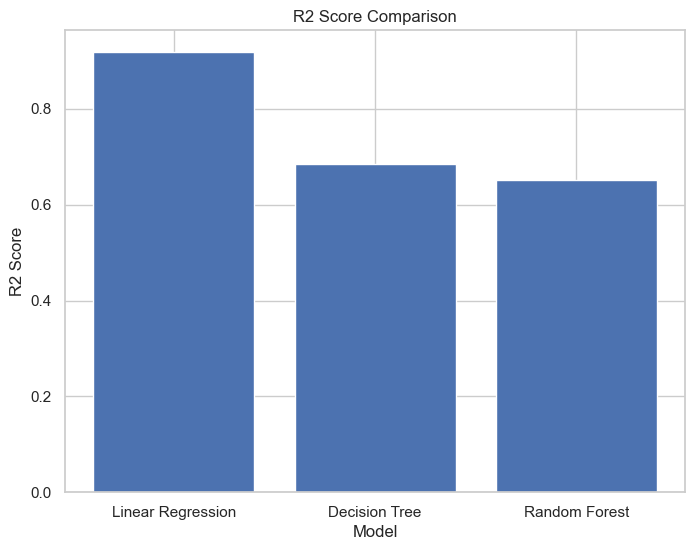

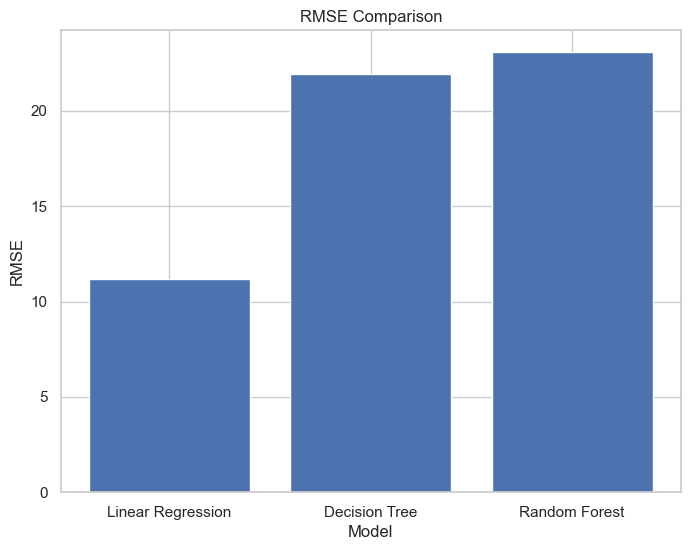

In [77]:
import pandas as pd
import matplotlib.pyplot as plt

from pyspark.ml.evaluation import RegressionEvaluator


# Define the models and their predictions
models = ['Linear Regression', 'Decision Tree', 'Random Forest']
predictions = [predictions_v1, predictions_dt, predictions_rf]

# Compute R2 and RMSE scores for each model
r2_scores = []
rmse_scores = []
eval_reg = RegressionEvaluator(labelCol="ARR_DELAY")

for pred in predictions:
    # Compute R2 score
    eval_reg.setMetricName("r2")
    r2 = eval_reg.evaluate(pred)
    r2_scores.append(r2)
    
    # Compute RMSE score
    eval_reg.setMetricName("rmse")
    rmse = eval_reg.evaluate(pred)
    rmse_scores.append(rmse)

# Create a Pandas DataFrame with the results
performance_df = pd.DataFrame({
    'Model': models,
    'R2 Score': r2_scores,
    'RMSE': rmse_scores
})

print(performance_df)


# Plot R2 Score Comparison
plt.figure(figsize=(8, 6))
plt.bar(models, r2_scores)
plt.title('R2 Score Comparison')
plt.xlabel('Model')
plt.ylabel('R2 Score')
plt.show()

# Plot RMSE Comparison
plt.figure(figsize=(8, 6))
plt.bar(models, rmse_scores)
plt.title('RMSE Comparison')
plt.xlabel('Model')
plt.ylabel('RMSE')
plt.show()


               Model  R2 Score       RMSE
0  Linear Regression  0.885066  12.255237
1      Decision Tree  0.688431  20.177800
2      Random Forest  0.661186  21.041546


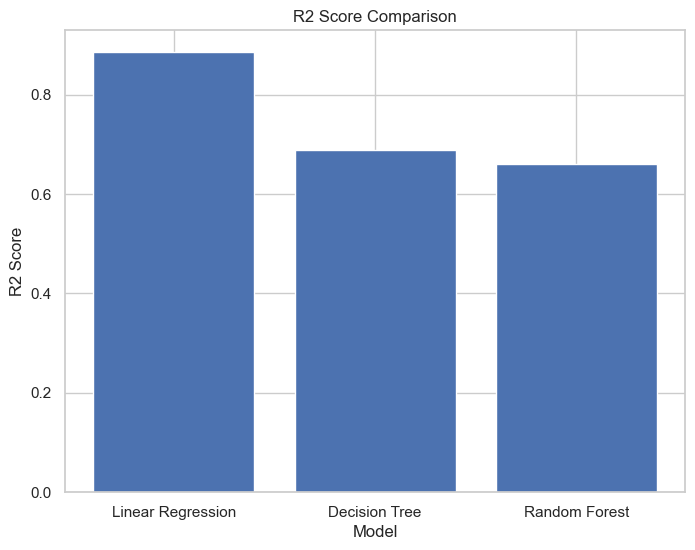

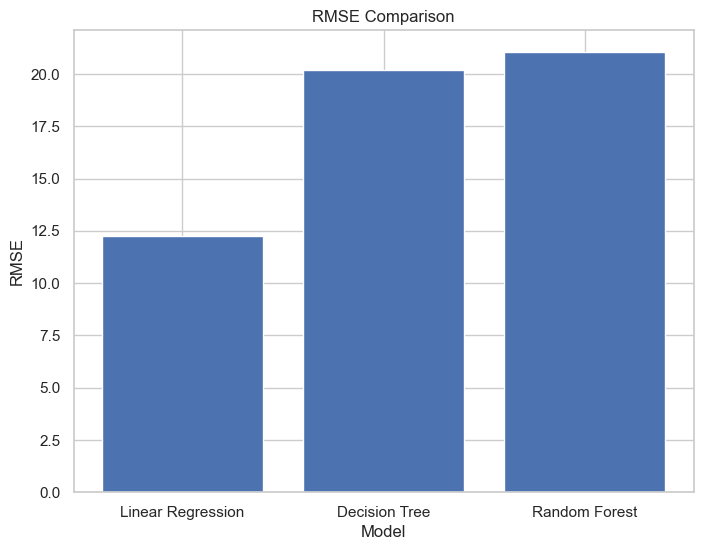

In [78]:
import pandas as pd
import matplotlib.pyplot as plt
from pyspark.ml.evaluation import RegressionEvaluator

# Define the models and their predictions
models = ['Linear Regression', 'Decision Tree', 'Random Forest']
predictions1 = [dep_predictions, dep_predictions_dt, dep_predictions_rf]

# Compute R2 and RMSE scores for each model
dep_r2_scores = []
dep_rmse_scores = []
dep_eval_reg = RegressionEvaluator(labelCol='DEP_DELAY')

for dep_pred in predictions1:
    # Compute R2 score
    dep_eval_reg.setMetricName('r2')
    dep_r2 = dep_eval_reg.evaluate(dep_pred)
    dep_r2_scores.append(dep_r2)
    
    # Compute RMSE score
    dep_eval_reg.setMetricName('rmse')
    dep_rmse = dep_eval_reg.evaluate(dep_pred)
    dep_rmse_scores.append(dep_rmse)

# Create a Pandas DataFrame with the results
dep_performance_df = pd.DataFrame({
    'Model': models,
    'R2 Score': dep_r2_scores,
    'RMSE': dep_rmse_scores
})

print(dep_performance_df)

# Plot R2 Score Comparison
plt.figure(figsize=(8, 6))
plt.bar(models, dep_r2_scores)
plt.title('R2 Score Comparison')
plt.xlabel('Model')
plt.ylabel('R2 Score')
plt.show()

# Plot RMSE Comparison
plt.figure(figsize=(8, 6))
plt.bar(models, dep_rmse_scores)
plt.title('RMSE Comparison')
plt.xlabel('Model')
plt.ylabel('RMSE')
plt.show()


A higher R2 score means that the model is better at predicting the dependent variable based on the independent variables. However, a high R2 score does not necessarily mean that the model is accurate or precise in its predictions, as there may be other factors that the model is not taking into account. Therefore, it is important to also consider other metrics, such as RMSE (Root Mean Square Error), to evaluate the performance of a regression model.

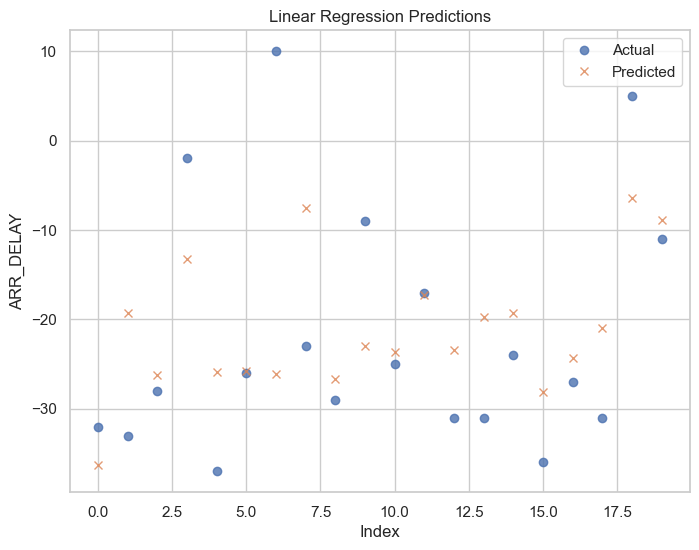

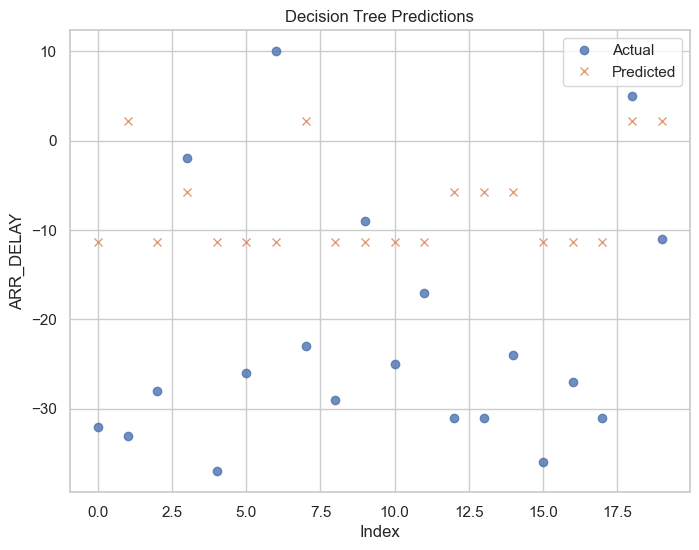

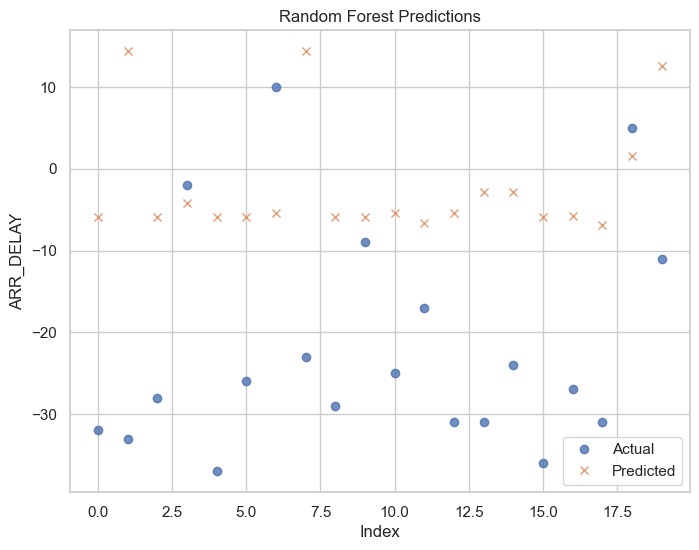

In [79]:
# Convert predictions to Pandas DataFrames
predictions_v1_pd = predictions_v1.select("ARR_DELAY", "prediction").toPandas().head(20)
predictions_dt_pd = predictions_dt.select("ARR_DELAY", "prediction").toPandas().head(20)
predictions_rf_pd = predictions_rf.select("ARR_DELAY", "prediction").toPandas().head(20)

# Plot Linear Regression Predictions
plt.figure(figsize=(8, 6))
plt.plot(predictions_v1_pd.index, predictions_v1_pd["ARR_DELAY"], 'o', label='Actual', alpha=0.8)
plt.plot(predictions_v1_pd.index, predictions_v1_pd["prediction"], 'x', label='Predicted', alpha=0.8)
plt.xlabel('Index')
plt.ylabel('ARR_DELAY')
plt.title('Linear Regression Predictions')
plt.legend()
plt.show()

# Plot Decision Tree Predictions
plt.figure(figsize=(8, 6))
plt.plot(predictions_dt_pd.index, predictions_dt_pd["ARR_DELAY"], 'o', label='Actual', alpha=0.8)
plt.plot(predictions_dt_pd.index, predictions_dt_pd["prediction"], 'x', label='Predicted', alpha=0.8)
plt.xlabel('Index')
plt.ylabel('ARR_DELAY')
plt.title('Decision Tree Predictions')
plt.legend()
plt.show()

# Plot Random Forest Predictions
plt.figure(figsize=(8, 6))
plt.plot(predictions_rf_pd.index, predictions_rf_pd["ARR_DELAY"], 'o', label='Actual', alpha=0.8)
plt.plot(predictions_rf_pd.index, predictions_rf_pd["prediction"], 'x', label='Predicted', alpha=0.8)
plt.xlabel('Index')
plt.ylabel('ARR_DELAY')
plt.title('Random Forest Predictions')
plt.legend()
plt.show()

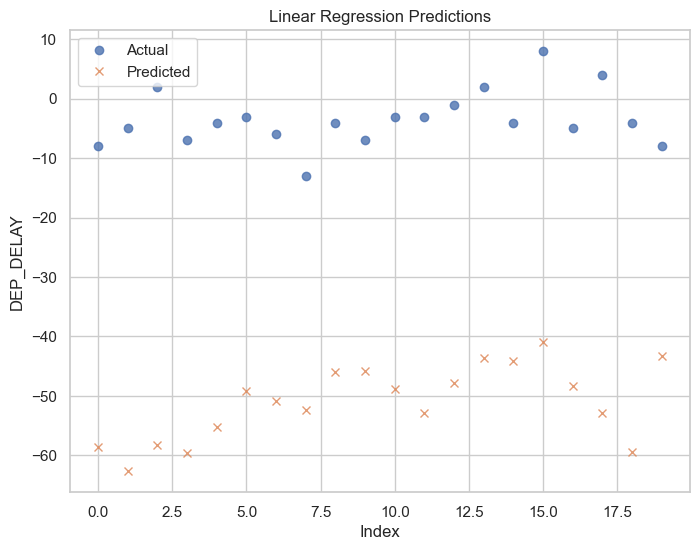

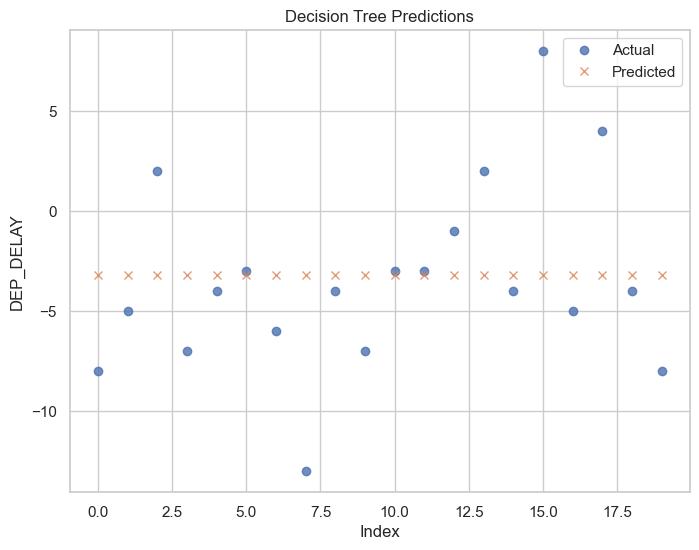

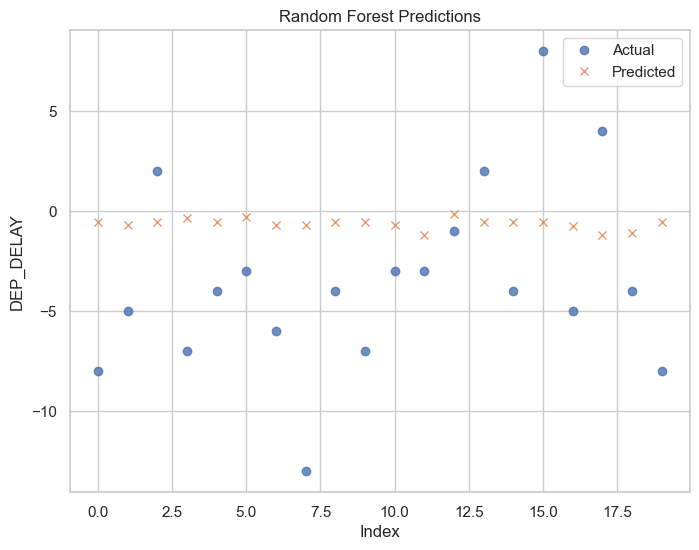

In [80]:
import matplotlib.pyplot as plt

# Convert predictions to Pandas DataFrames
dep_predictions_pd = dep_predictions.select("DEP_DELAY", "prediction").toPandas().head(20)
dep_predictions_dt_pd = dep_predictions_dt.select("DEP_DELAY", "prediction").toPandas().head(20)
dep_predictions_rf_pd = dep_predictions_rf.select("DEP_DELAY", "prediction").toPandas().head(20)

# Plot Linear Regression Predictions
plt.figure(figsize=(8, 6))
plt.plot(dep_predictions_pd.index, dep_predictions_pd["DEP_DELAY"], 'o', label='Actual', alpha=0.8)
plt.plot(dep_predictions_pd.index, dep_predictions_pd["prediction"], 'x', label='Predicted', alpha=0.8)
plt.xlabel('Index')
plt.ylabel('DEP_DELAY')
plt.title('Linear Regression Predictions')
plt.legend()
plt.show()

# Plot Decision Tree Predictions
plt.figure(figsize=(8, 6))
plt.plot(dep_predictions_dt_pd.index, dep_predictions_dt_pd["DEP_DELAY"], 'o', label='Actual', alpha=0.8)
plt.plot(dep_predictions_dt_pd.index, dep_predictions_dt_pd["prediction"], 'x', label='Predicted', alpha=0.8)
plt.xlabel('Index')
plt.ylabel('DEP_DELAY')
plt.title('Decision Tree Predictions')
plt.legend()
plt.show()

# Plot Random Forest Predictions
plt.figure(figsize=(8, 6))
plt.plot(dep_predictions_rf_pd.index, dep_predictions_rf_pd["DEP_DELAY"], 'o', label='Actual', alpha=0.8)
plt.plot(dep_predictions_rf_pd.index, dep_predictions_rf_pd["prediction"], 'x', label='Predicted', alpha=0.8)
plt.xlabel('Index')
plt.ylabel('DEP_DELAY')
plt.title('Random Forest Predictions')
plt.legend()
plt.show()

Since there are no flights with future dates in the dataset, we cannot predict the top 10 airports with the most delays in the future directly.

However, we can use the historical data to identify the airports with the highest average departure delays, assuming that the trend might continue in the future. 

### List out the top 10 airports with most departure delays in the future

In [81]:
import pyspark.sql.functions as F

# Group by the origin airport and calculate the average departure delay
historical_delays = df.groupBy("ORIGIN").agg(F.mean("DEP_DELAY").alias("avg_departure_delay"))

# Order by the average departure delay in descending order and take the top 10 airports
top10_airports = historical_delays.orderBy(F.desc("avg_departure_delay")).limit(10)

# Show the top 10 airports with the highest average departure delays
top10_airports.show()

+------+-------------------+
|ORIGIN|avg_departure_delay|
+------+-------------------+
|   ORD| 12.708041620161667|
|   MIA| 11.804105638019967|
|   HOU|  11.74473011139799|
|   JFK| 11.334912170219608|
|   DFW|  10.93293187081626|
|   IAD|  10.18070800832951|
|   DEN| 10.097427931363583|
|   BWI| 10.027747269988703|
|   BOS|  9.350231591370314|
|   ATL|  9.056570908965446|
+------+-------------------+



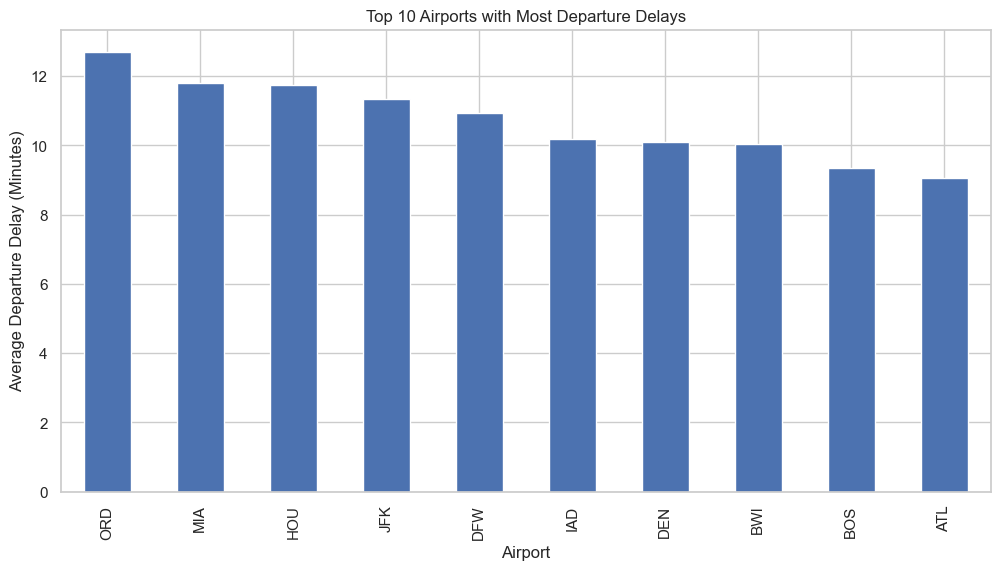

In [82]:
import pandas as pd
import matplotlib.pyplot as plt

# Convert the top 10 airports with the highest average departure delays to a Pandas DataFrame
top10_departure_airports_pd = top10_airports.toPandas()

# Set the index of the DataFrame to the origin airport code for better visualization
top10_departure_airports_pd.set_index("ORIGIN", inplace=True)

# Create a bar plot of the average departure delays for the top 10 airports
ax = top10_departure_airports_pd.plot(kind="bar", figsize=(12, 6), legend=False)
ax.set_ylabel("Average Departure Delay (Minutes)")
ax.set_xlabel("Airport")
ax.set_title("Top 10 Airports with Most Departure Delays")

# Display the plot
plt.show()


### List out the top 10 airports with most arrival delays in the future

In [83]:
# Group by the destination airport and calculate the average arrival delay
historical_arrival_delays = df.groupBy("DEST").agg(F.mean("ARR_DELAY").alias("avg_arrival_delay"))

# Order by the average arrival delay in descending order and take the top 10 airports
top10_arrival_airports = historical_arrival_delays.orderBy(F.desc("avg_arrival_delay")).limit(10)

# Show the top 10 airports with the highest average arrival delays
top10_arrival_airports.show()


+----+------------------+
|DEST| avg_arrival_delay|
+----+------------------+
| JFK|6.6437666269560465|
| BOS| 6.440211179140118|
| ORD| 6.145507919680342|
| BNA| 5.557708499673368|
| HOU| 5.219641253428481|
| MIA|  4.86695316205305|
| CVG| 4.596301702587863|
| BWI| 4.513159407565353|
| DFW| 4.461561700586173|
| PIT| 4.365764252544215|
+----+------------------+



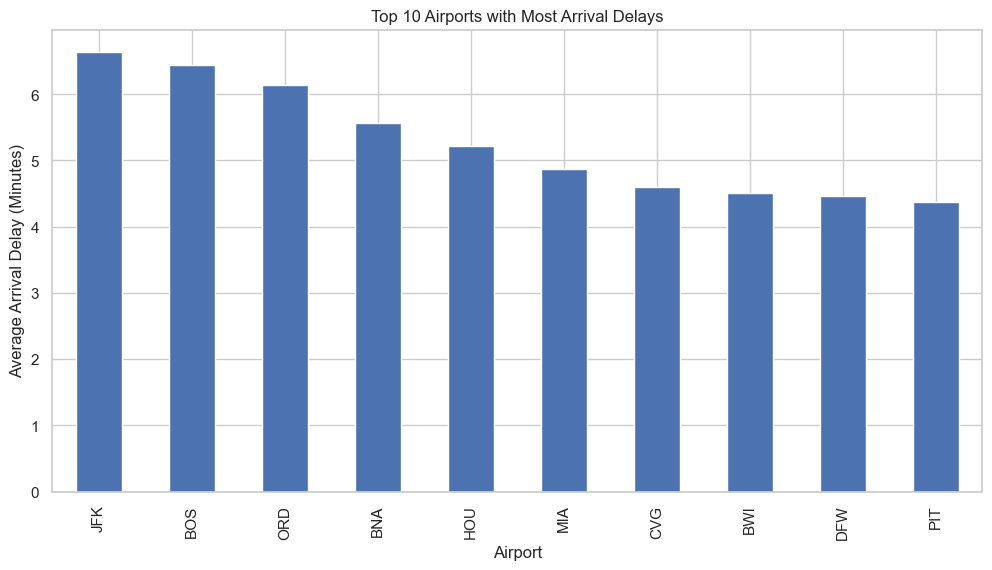

23/05/12 15:53:40 WARN HeartbeatReceiver: Removing executor driver with no recent heartbeats: 907400 ms exceeds timeout 120000 ms
23/05/12 15:53:40 WARN SparkContext: Killing executors is not supported by current scheduler.
23/05/12 15:53:42 ERROR Inbox: Ignoring error
org.apache.spark.SparkException: Exception thrown in awaitResult: 
	at org.apache.spark.util.ThreadUtils$.awaitResult(ThreadUtils.scala:322)
	at org.apache.spark.rpc.RpcTimeout.awaitResult(RpcTimeout.scala:75)
	at org.apache.spark.rpc.RpcEnv.setupEndpointRefByURI(RpcEnv.scala:102)
	at org.apache.spark.rpc.RpcEnv.setupEndpointRef(RpcEnv.scala:110)
	at org.apache.spark.util.RpcUtils$.makeDriverRef(RpcUtils.scala:36)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.driverEndpoint$lzycompute(BlockManagerMasterEndpoint.scala:117)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.org$apache$spark$storage$BlockManagerMasterEndpoint$$driverEndpoint(BlockManagerMasterEndpoint.scala:116)
	at org.apache.spark.storage.B

23/05/12 16:26:29 WARN Executor: Issue communicating with driver in heartbeater
org.apache.spark.SparkException: Exception thrown in awaitResult: 
	at org.apache.spark.util.ThreadUtils$.awaitResult(ThreadUtils.scala:322)
	at org.apache.spark.rpc.RpcTimeout.awaitResult(RpcTimeout.scala:75)
	at org.apache.spark.rpc.RpcEndpointRef.askSync(RpcEndpointRef.scala:101)
	at org.apache.spark.rpc.RpcEndpointRef.askSync(RpcEndpointRef.scala:85)
	at org.apache.spark.storage.BlockManagerMaster.registerBlockManager(BlockManagerMaster.scala:80)
	at org.apache.spark.storage.BlockManager.reregister(BlockManager.scala:641)
	at org.apache.spark.executor.Executor.reportHeartBeat(Executor.scala:1111)
	at org.apache.spark.executor.Executor.$anonfun$heartbeater$1(Executor.scala:244)
	at org.apache.spark.executor.Executor$$Lambda$643/797125253.apply$mcV$sp(Unknown Source)
	at scala.runtime.java8.JFunction0$mcV$sp.apply(JFunction0$mcV$sp.java:23)
	at org.apache.spark.util.Utils$.logUncaughtExceptions(Utils.scal

23/05/12 16:43:42 ERROR Inbox: Ignoring error
org.apache.spark.SparkException: Exception thrown in awaitResult: 
	at org.apache.spark.util.ThreadUtils$.awaitResult(ThreadUtils.scala:322)
	at org.apache.spark.rpc.RpcTimeout.awaitResult(RpcTimeout.scala:75)
	at org.apache.spark.rpc.RpcEnv.setupEndpointRefByURI(RpcEnv.scala:102)
	at org.apache.spark.rpc.RpcEnv.setupEndpointRef(RpcEnv.scala:110)
	at org.apache.spark.util.RpcUtils$.makeDriverRef(RpcUtils.scala:36)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.driverEndpoint$lzycompute(BlockManagerMasterEndpoint.scala:117)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.org$apache$spark$storage$BlockManagerMasterEndpoint$$driverEndpoint(BlockManagerMasterEndpoint.scala:116)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.isExecutorAlive$lzycompute$1(BlockManagerMasterEndpoint.scala:611)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.isExecutorAlive$1(BlockManagerMasterEndpoint.scala:610)
	at org.apache.spar

23/05/12 17:11:42 ERROR Inbox: Ignoring error
org.apache.spark.SparkException: Exception thrown in awaitResult: 
	at org.apache.spark.util.ThreadUtils$.awaitResult(ThreadUtils.scala:322)
	at org.apache.spark.rpc.RpcTimeout.awaitResult(RpcTimeout.scala:75)
	at org.apache.spark.rpc.RpcEnv.setupEndpointRefByURI(RpcEnv.scala:102)
	at org.apache.spark.rpc.RpcEnv.setupEndpointRef(RpcEnv.scala:110)
	at org.apache.spark.util.RpcUtils$.makeDriverRef(RpcUtils.scala:36)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.driverEndpoint$lzycompute(BlockManagerMasterEndpoint.scala:117)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.org$apache$spark$storage$BlockManagerMasterEndpoint$$driverEndpoint(BlockManagerMasterEndpoint.scala:116)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.isExecutorAlive$lzycompute$1(BlockManagerMasterEndpoint.scala:611)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.isExecutorAlive$1(BlockManagerMasterEndpoint.scala:610)
	at org.apache.spar

23/05/12 17:29:06 ERROR Inbox: Ignoring error
org.apache.spark.SparkException: Exception thrown in awaitResult: 
	at org.apache.spark.util.ThreadUtils$.awaitResult(ThreadUtils.scala:322)
	at org.apache.spark.rpc.RpcTimeout.awaitResult(RpcTimeout.scala:75)
	at org.apache.spark.rpc.RpcEnv.setupEndpointRefByURI(RpcEnv.scala:102)
	at org.apache.spark.rpc.RpcEnv.setupEndpointRef(RpcEnv.scala:110)
	at org.apache.spark.util.RpcUtils$.makeDriverRef(RpcUtils.scala:36)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.driverEndpoint$lzycompute(BlockManagerMasterEndpoint.scala:117)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.org$apache$spark$storage$BlockManagerMasterEndpoint$$driverEndpoint(BlockManagerMasterEndpoint.scala:116)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.isExecutorAlive$lzycompute$1(BlockManagerMasterEndpoint.scala:611)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.isExecutorAlive$1(BlockManagerMasterEndpoint.scala:610)
	at org.apache.spar

23/05/12 18:02:34 WARN Executor: Issue communicating with driver in heartbeater
org.apache.spark.SparkException: Exception thrown in awaitResult: 
	at org.apache.spark.util.ThreadUtils$.awaitResult(ThreadUtils.scala:322)
	at org.apache.spark.rpc.RpcTimeout.awaitResult(RpcTimeout.scala:75)
	at org.apache.spark.rpc.RpcEndpointRef.askSync(RpcEndpointRef.scala:101)
	at org.apache.spark.rpc.RpcEndpointRef.askSync(RpcEndpointRef.scala:85)
	at org.apache.spark.storage.BlockManagerMaster.registerBlockManager(BlockManagerMaster.scala:80)
	at org.apache.spark.storage.BlockManager.reregister(BlockManager.scala:641)
	at org.apache.spark.executor.Executor.reportHeartBeat(Executor.scala:1111)
	at org.apache.spark.executor.Executor.$anonfun$heartbeater$1(Executor.scala:244)
	at org.apache.spark.executor.Executor$$Lambda$643/797125253.apply$mcV$sp(Unknown Source)
	at scala.runtime.java8.JFunction0$mcV$sp.apply(JFunction0$mcV$sp.java:23)
	at org.apache.spark.util.Utils$.logUncaughtExceptions(Utils.scal

23/05/12 18:29:43 ERROR Inbox: Ignoring error
org.apache.spark.SparkException: Exception thrown in awaitResult: 
	at org.apache.spark.util.ThreadUtils$.awaitResult(ThreadUtils.scala:322)
	at org.apache.spark.rpc.RpcTimeout.awaitResult(RpcTimeout.scala:75)
	at org.apache.spark.rpc.RpcEnv.setupEndpointRefByURI(RpcEnv.scala:102)
	at org.apache.spark.rpc.RpcEnv.setupEndpointRef(RpcEnv.scala:110)
	at org.apache.spark.util.RpcUtils$.makeDriverRef(RpcUtils.scala:36)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.driverEndpoint$lzycompute(BlockManagerMasterEndpoint.scala:117)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.org$apache$spark$storage$BlockManagerMasterEndpoint$$driverEndpoint(BlockManagerMasterEndpoint.scala:116)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.isExecutorAlive$lzycompute$1(BlockManagerMasterEndpoint.scala:611)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.isExecutorAlive$1(BlockManagerMasterEndpoint.scala:610)
	at org.apache.spar

23/05/12 18:30:04 ERROR Inbox: Ignoring error
org.apache.spark.SparkException: Exception thrown in awaitResult: 
	at org.apache.spark.util.ThreadUtils$.awaitResult(ThreadUtils.scala:322)
	at org.apache.spark.rpc.RpcTimeout.awaitResult(RpcTimeout.scala:75)
	at org.apache.spark.rpc.RpcEnv.setupEndpointRefByURI(RpcEnv.scala:102)
	at org.apache.spark.rpc.RpcEnv.setupEndpointRef(RpcEnv.scala:110)
	at org.apache.spark.util.RpcUtils$.makeDriverRef(RpcUtils.scala:36)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.driverEndpoint$lzycompute(BlockManagerMasterEndpoint.scala:117)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.org$apache$spark$storage$BlockManagerMasterEndpoint$$driverEndpoint(BlockManagerMasterEndpoint.scala:116)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.isExecutorAlive$lzycompute$1(BlockManagerMasterEndpoint.scala:611)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.isExecutorAlive$1(BlockManagerMasterEndpoint.scala:610)
	at org.apache.spar

23/05/12 18:45:35 ERROR Inbox: Ignoring error
org.apache.spark.SparkException: Exception thrown in awaitResult: 
	at org.apache.spark.util.ThreadUtils$.awaitResult(ThreadUtils.scala:322)
	at org.apache.spark.rpc.RpcTimeout.awaitResult(RpcTimeout.scala:75)
	at org.apache.spark.rpc.RpcEnv.setupEndpointRefByURI(RpcEnv.scala:102)
	at org.apache.spark.rpc.RpcEnv.setupEndpointRef(RpcEnv.scala:110)
	at org.apache.spark.util.RpcUtils$.makeDriverRef(RpcUtils.scala:36)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.driverEndpoint$lzycompute(BlockManagerMasterEndpoint.scala:117)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.org$apache$spark$storage$BlockManagerMasterEndpoint$$driverEndpoint(BlockManagerMasterEndpoint.scala:116)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.isExecutorAlive$lzycompute$1(BlockManagerMasterEndpoint.scala:611)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.isExecutorAlive$1(BlockManagerMasterEndpoint.scala:610)
	at org.apache.spar

23/05/12 19:19:31 WARN Executor: Issue communicating with driver in heartbeater
org.apache.spark.SparkException: Exception thrown in awaitResult: 
	at org.apache.spark.util.ThreadUtils$.awaitResult(ThreadUtils.scala:322)
	at org.apache.spark.rpc.RpcTimeout.awaitResult(RpcTimeout.scala:75)
	at org.apache.spark.rpc.RpcEndpointRef.askSync(RpcEndpointRef.scala:101)
	at org.apache.spark.rpc.RpcEndpointRef.askSync(RpcEndpointRef.scala:85)
	at org.apache.spark.storage.BlockManagerMaster.registerBlockManager(BlockManagerMaster.scala:80)
	at org.apache.spark.storage.BlockManager.reregister(BlockManager.scala:641)
	at org.apache.spark.executor.Executor.reportHeartBeat(Executor.scala:1111)
	at org.apache.spark.executor.Executor.$anonfun$heartbeater$1(Executor.scala:244)
	at org.apache.spark.executor.Executor$$Lambda$643/797125253.apply$mcV$sp(Unknown Source)
	at scala.runtime.java8.JFunction0$mcV$sp.apply(JFunction0$mcV$sp.java:23)
	at org.apache.spark.util.Utils$.logUncaughtExceptions(Utils.scal

23/05/12 19:35:38 ERROR Inbox: Ignoring error
org.apache.spark.SparkException: Exception thrown in awaitResult: 
	at org.apache.spark.util.ThreadUtils$.awaitResult(ThreadUtils.scala:322)
	at org.apache.spark.rpc.RpcTimeout.awaitResult(RpcTimeout.scala:75)
	at org.apache.spark.rpc.RpcEnv.setupEndpointRefByURI(RpcEnv.scala:102)
	at org.apache.spark.rpc.RpcEnv.setupEndpointRef(RpcEnv.scala:110)
	at org.apache.spark.util.RpcUtils$.makeDriverRef(RpcUtils.scala:36)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.driverEndpoint$lzycompute(BlockManagerMasterEndpoint.scala:117)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.org$apache$spark$storage$BlockManagerMasterEndpoint$$driverEndpoint(BlockManagerMasterEndpoint.scala:116)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.isExecutorAlive$lzycompute$1(BlockManagerMasterEndpoint.scala:611)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.isExecutorAlive$1(BlockManagerMasterEndpoint.scala:610)
	at org.apache.spar

23/05/12 20:00:47 ERROR Inbox: Ignoring error
org.apache.spark.SparkException: Exception thrown in awaitResult: 
	at org.apache.spark.util.ThreadUtils$.awaitResult(ThreadUtils.scala:322)
	at org.apache.spark.rpc.RpcTimeout.awaitResult(RpcTimeout.scala:75)
	at org.apache.spark.rpc.RpcEnv.setupEndpointRefByURI(RpcEnv.scala:102)
	at org.apache.spark.rpc.RpcEnv.setupEndpointRef(RpcEnv.scala:110)
	at org.apache.spark.util.RpcUtils$.makeDriverRef(RpcUtils.scala:36)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.driverEndpoint$lzycompute(BlockManagerMasterEndpoint.scala:117)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.org$apache$spark$storage$BlockManagerMasterEndpoint$$driverEndpoint(BlockManagerMasterEndpoint.scala:116)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.isExecutorAlive$lzycompute$1(BlockManagerMasterEndpoint.scala:611)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.isExecutorAlive$1(BlockManagerMasterEndpoint.scala:610)
	at org.apache.spar

23/05/12 20:17:08 ERROR Inbox: Ignoring error
org.apache.spark.SparkException: Exception thrown in awaitResult: 
	at org.apache.spark.util.ThreadUtils$.awaitResult(ThreadUtils.scala:322)
	at org.apache.spark.rpc.RpcTimeout.awaitResult(RpcTimeout.scala:75)
	at org.apache.spark.rpc.RpcEnv.setupEndpointRefByURI(RpcEnv.scala:102)
	at org.apache.spark.rpc.RpcEnv.setupEndpointRef(RpcEnv.scala:110)
	at org.apache.spark.util.RpcUtils$.makeDriverRef(RpcUtils.scala:36)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.driverEndpoint$lzycompute(BlockManagerMasterEndpoint.scala:117)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.org$apache$spark$storage$BlockManagerMasterEndpoint$$driverEndpoint(BlockManagerMasterEndpoint.scala:116)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.isExecutorAlive$lzycompute$1(BlockManagerMasterEndpoint.scala:611)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.isExecutorAlive$1(BlockManagerMasterEndpoint.scala:610)
	at org.apache.spar

23/05/12 20:48:40 WARN Executor: Issue communicating with driver in heartbeater
org.apache.spark.SparkException: Exception thrown in awaitResult: 
	at org.apache.spark.util.ThreadUtils$.awaitResult(ThreadUtils.scala:322)
	at org.apache.spark.rpc.RpcTimeout.awaitResult(RpcTimeout.scala:75)
	at org.apache.spark.rpc.RpcEndpointRef.askSync(RpcEndpointRef.scala:101)
	at org.apache.spark.rpc.RpcEndpointRef.askSync(RpcEndpointRef.scala:85)
	at org.apache.spark.storage.BlockManagerMaster.registerBlockManager(BlockManagerMaster.scala:80)
	at org.apache.spark.storage.BlockManager.reregister(BlockManager.scala:641)
	at org.apache.spark.executor.Executor.reportHeartBeat(Executor.scala:1111)
	at org.apache.spark.executor.Executor.$anonfun$heartbeater$1(Executor.scala:244)
	at org.apache.spark.executor.Executor$$Lambda$643/797125253.apply$mcV$sp(Unknown Source)
	at scala.runtime.java8.JFunction0$mcV$sp.apply(JFunction0$mcV$sp.java:23)
	at org.apache.spark.util.Utils$.logUncaughtExceptions(Utils.scal

23/05/12 21:05:19 WARN Executor: Issue communicating with driver in heartbeater
org.apache.spark.SparkException: Exception thrown in awaitResult: 
	at org.apache.spark.util.ThreadUtils$.awaitResult(ThreadUtils.scala:322)
	at org.apache.spark.rpc.RpcTimeout.awaitResult(RpcTimeout.scala:75)
	at org.apache.spark.rpc.RpcEndpointRef.askSync(RpcEndpointRef.scala:101)
	at org.apache.spark.rpc.RpcEndpointRef.askSync(RpcEndpointRef.scala:85)
	at org.apache.spark.storage.BlockManagerMaster.registerBlockManager(BlockManagerMaster.scala:80)
	at org.apache.spark.storage.BlockManager.reregister(BlockManager.scala:641)
	at org.apache.spark.executor.Executor.reportHeartBeat(Executor.scala:1111)
	at org.apache.spark.executor.Executor.$anonfun$heartbeater$1(Executor.scala:244)
	at org.apache.spark.executor.Executor$$Lambda$643/797125253.apply$mcV$sp(Unknown Source)
	at scala.runtime.java8.JFunction0$mcV$sp.apply(JFunction0$mcV$sp.java:23)
	at org.apache.spark.util.Utils$.logUncaughtExceptions(Utils.scal

23/05/12 21:21:59 WARN Executor: Issue communicating with driver in heartbeater
org.apache.spark.SparkException: Exception thrown in awaitResult: 
	at org.apache.spark.util.ThreadUtils$.awaitResult(ThreadUtils.scala:322)
	at org.apache.spark.rpc.RpcTimeout.awaitResult(RpcTimeout.scala:75)
	at org.apache.spark.rpc.RpcEndpointRef.askSync(RpcEndpointRef.scala:101)
	at org.apache.spark.rpc.RpcEndpointRef.askSync(RpcEndpointRef.scala:85)
	at org.apache.spark.storage.BlockManagerMaster.registerBlockManager(BlockManagerMaster.scala:80)
	at org.apache.spark.storage.BlockManager.reregister(BlockManager.scala:641)
	at org.apache.spark.executor.Executor.reportHeartBeat(Executor.scala:1111)
	at org.apache.spark.executor.Executor.$anonfun$heartbeater$1(Executor.scala:244)
	at org.apache.spark.executor.Executor$$Lambda$643/797125253.apply$mcV$sp(Unknown Source)
	at scala.runtime.java8.JFunction0$mcV$sp.apply(JFunction0$mcV$sp.java:23)
	at org.apache.spark.util.Utils$.logUncaughtExceptions(Utils.scal

23/05/12 21:56:56 WARN Executor: Issue communicating with driver in heartbeater
org.apache.spark.SparkException: Exception thrown in awaitResult: 
	at org.apache.spark.util.ThreadUtils$.awaitResult(ThreadUtils.scala:322)
	at org.apache.spark.rpc.RpcTimeout.awaitResult(RpcTimeout.scala:75)
	at org.apache.spark.rpc.RpcEndpointRef.askSync(RpcEndpointRef.scala:101)
	at org.apache.spark.rpc.RpcEndpointRef.askSync(RpcEndpointRef.scala:85)
	at org.apache.spark.storage.BlockManagerMaster.registerBlockManager(BlockManagerMaster.scala:80)
	at org.apache.spark.storage.BlockManager.reregister(BlockManager.scala:641)
	at org.apache.spark.executor.Executor.reportHeartBeat(Executor.scala:1111)
	at org.apache.spark.executor.Executor.$anonfun$heartbeater$1(Executor.scala:244)
	at org.apache.spark.executor.Executor$$Lambda$643/797125253.apply$mcV$sp(Unknown Source)
	at scala.runtime.java8.JFunction0$mcV$sp.apply(JFunction0$mcV$sp.java:23)
	at org.apache.spark.util.Utils$.logUncaughtExceptions(Utils.scal

23/05/12 22:23:43 WARN Executor: Issue communicating with driver in heartbeater
org.apache.spark.SparkException: Exception thrown in awaitResult: 
	at org.apache.spark.util.ThreadUtils$.awaitResult(ThreadUtils.scala:322)
	at org.apache.spark.rpc.RpcTimeout.awaitResult(RpcTimeout.scala:75)
	at org.apache.spark.rpc.RpcEndpointRef.askSync(RpcEndpointRef.scala:101)
	at org.apache.spark.rpc.RpcEndpointRef.askSync(RpcEndpointRef.scala:85)
	at org.apache.spark.storage.BlockManagerMaster.registerBlockManager(BlockManagerMaster.scala:80)
	at org.apache.spark.storage.BlockManager.reregister(BlockManager.scala:641)
	at org.apache.spark.executor.Executor.reportHeartBeat(Executor.scala:1111)
	at org.apache.spark.executor.Executor.$anonfun$heartbeater$1(Executor.scala:244)
	at org.apache.spark.executor.Executor$$Lambda$643/797125253.apply$mcV$sp(Unknown Source)
	at scala.runtime.java8.JFunction0$mcV$sp.apply(JFunction0$mcV$sp.java:23)
	at org.apache.spark.util.Utils$.logUncaughtExceptions(Utils.scal

23/05/12 22:35:52 WARN Executor: Issue communicating with driver in heartbeater
org.apache.spark.SparkException: Exception thrown in awaitResult: 
	at org.apache.spark.util.ThreadUtils$.awaitResult(ThreadUtils.scala:322)
	at org.apache.spark.rpc.RpcTimeout.awaitResult(RpcTimeout.scala:75)
	at org.apache.spark.rpc.RpcEndpointRef.askSync(RpcEndpointRef.scala:101)
	at org.apache.spark.rpc.RpcEndpointRef.askSync(RpcEndpointRef.scala:85)
	at org.apache.spark.storage.BlockManagerMaster.registerBlockManager(BlockManagerMaster.scala:80)
	at org.apache.spark.storage.BlockManager.reregister(BlockManager.scala:641)
	at org.apache.spark.executor.Executor.reportHeartBeat(Executor.scala:1111)
	at org.apache.spark.executor.Executor.$anonfun$heartbeater$1(Executor.scala:244)
	at org.apache.spark.executor.Executor$$Lambda$643/797125253.apply$mcV$sp(Unknown Source)
	at scala.runtime.java8.JFunction0$mcV$sp.apply(JFunction0$mcV$sp.java:23)
	at org.apache.spark.util.Utils$.logUncaughtExceptions(Utils.scal

23/05/12 22:36:22 WARN Executor: Issue communicating with driver in heartbeater
org.apache.spark.SparkException: Exception thrown in awaitResult: 
	at org.apache.spark.util.ThreadUtils$.awaitResult(ThreadUtils.scala:322)
	at org.apache.spark.rpc.RpcTimeout.awaitResult(RpcTimeout.scala:75)
	at org.apache.spark.rpc.RpcEndpointRef.askSync(RpcEndpointRef.scala:101)
	at org.apache.spark.rpc.RpcEndpointRef.askSync(RpcEndpointRef.scala:85)
	at org.apache.spark.storage.BlockManagerMaster.registerBlockManager(BlockManagerMaster.scala:80)
	at org.apache.spark.storage.BlockManager.reregister(BlockManager.scala:641)
	at org.apache.spark.executor.Executor.reportHeartBeat(Executor.scala:1111)
	at org.apache.spark.executor.Executor.$anonfun$heartbeater$1(Executor.scala:244)
	at org.apache.spark.executor.Executor$$Lambda$643/797125253.apply$mcV$sp(Unknown Source)
	at scala.runtime.java8.JFunction0$mcV$sp.apply(JFunction0$mcV$sp.java:23)
	at org.apache.spark.util.Utils$.logUncaughtExceptions(Utils.scal

23/05/12 22:53:48 WARN Executor: Issue communicating with driver in heartbeater
org.apache.spark.SparkException: Exception thrown in awaitResult: 
	at org.apache.spark.util.ThreadUtils$.awaitResult(ThreadUtils.scala:322)
	at org.apache.spark.rpc.RpcTimeout.awaitResult(RpcTimeout.scala:75)
	at org.apache.spark.rpc.RpcEndpointRef.askSync(RpcEndpointRef.scala:101)
	at org.apache.spark.rpc.RpcEndpointRef.askSync(RpcEndpointRef.scala:85)
	at org.apache.spark.storage.BlockManagerMaster.registerBlockManager(BlockManagerMaster.scala:80)
	at org.apache.spark.storage.BlockManager.reregister(BlockManager.scala:641)
	at org.apache.spark.executor.Executor.reportHeartBeat(Executor.scala:1111)
	at org.apache.spark.executor.Executor.$anonfun$heartbeater$1(Executor.scala:244)
	at org.apache.spark.executor.Executor$$Lambda$643/797125253.apply$mcV$sp(Unknown Source)
	at scala.runtime.java8.JFunction0$mcV$sp.apply(JFunction0$mcV$sp.java:23)
	at org.apache.spark.util.Utils$.logUncaughtExceptions(Utils.scal

23/05/12 22:59:48 WARN Executor: Issue communicating with driver in heartbeater
org.apache.spark.SparkException: Exception thrown in awaitResult: 
	at org.apache.spark.util.ThreadUtils$.awaitResult(ThreadUtils.scala:322)
	at org.apache.spark.rpc.RpcTimeout.awaitResult(RpcTimeout.scala:75)
	at org.apache.spark.rpc.RpcEndpointRef.askSync(RpcEndpointRef.scala:101)
	at org.apache.spark.rpc.RpcEndpointRef.askSync(RpcEndpointRef.scala:85)
	at org.apache.spark.storage.BlockManagerMaster.registerBlockManager(BlockManagerMaster.scala:80)
	at org.apache.spark.storage.BlockManager.reregister(BlockManager.scala:641)
	at org.apache.spark.executor.Executor.reportHeartBeat(Executor.scala:1111)
	at org.apache.spark.executor.Executor.$anonfun$heartbeater$1(Executor.scala:244)
	at org.apache.spark.executor.Executor$$Lambda$643/797125253.apply$mcV$sp(Unknown Source)
	at scala.runtime.java8.JFunction0$mcV$sp.apply(JFunction0$mcV$sp.java:23)
	at org.apache.spark.util.Utils$.logUncaughtExceptions(Utils.scal

23/05/12 22:59:58 WARN Executor: Issue communicating with driver in heartbeater
org.apache.spark.SparkException: Exception thrown in awaitResult: 
	at org.apache.spark.util.ThreadUtils$.awaitResult(ThreadUtils.scala:322)
	at org.apache.spark.rpc.RpcTimeout.awaitResult(RpcTimeout.scala:75)
	at org.apache.spark.rpc.RpcEndpointRef.askSync(RpcEndpointRef.scala:101)
	at org.apache.spark.rpc.RpcEndpointRef.askSync(RpcEndpointRef.scala:85)
	at org.apache.spark.storage.BlockManagerMaster.registerBlockManager(BlockManagerMaster.scala:80)
	at org.apache.spark.storage.BlockManager.reregister(BlockManager.scala:641)
	at org.apache.spark.executor.Executor.reportHeartBeat(Executor.scala:1111)
	at org.apache.spark.executor.Executor.$anonfun$heartbeater$1(Executor.scala:244)
	at org.apache.spark.executor.Executor$$Lambda$643/797125253.apply$mcV$sp(Unknown Source)
	at scala.runtime.java8.JFunction0$mcV$sp.apply(JFunction0$mcV$sp.java:23)
	at org.apache.spark.util.Utils$.logUncaughtExceptions(Utils.scal

23/05/12 23:00:08 WARN Executor: Issue communicating with driver in heartbeater
org.apache.spark.SparkException: Exception thrown in awaitResult: 
	at org.apache.spark.util.ThreadUtils$.awaitResult(ThreadUtils.scala:322)
	at org.apache.spark.rpc.RpcTimeout.awaitResult(RpcTimeout.scala:75)
	at org.apache.spark.rpc.RpcEndpointRef.askSync(RpcEndpointRef.scala:101)
	at org.apache.spark.rpc.RpcEndpointRef.askSync(RpcEndpointRef.scala:85)
	at org.apache.spark.storage.BlockManagerMaster.registerBlockManager(BlockManagerMaster.scala:80)
	at org.apache.spark.storage.BlockManager.reregister(BlockManager.scala:641)
	at org.apache.spark.executor.Executor.reportHeartBeat(Executor.scala:1111)
	at org.apache.spark.executor.Executor.$anonfun$heartbeater$1(Executor.scala:244)
	at org.apache.spark.executor.Executor$$Lambda$643/797125253.apply$mcV$sp(Unknown Source)
	at scala.runtime.java8.JFunction0$mcV$sp.apply(JFunction0$mcV$sp.java:23)
	at org.apache.spark.util.Utils$.logUncaughtExceptions(Utils.scal

23/05/12 23:00:18 ERROR Inbox: Ignoring error
org.apache.spark.SparkException: Exception thrown in awaitResult: 
	at org.apache.spark.util.ThreadUtils$.awaitResult(ThreadUtils.scala:322)
	at org.apache.spark.rpc.RpcTimeout.awaitResult(RpcTimeout.scala:75)
	at org.apache.spark.rpc.RpcEnv.setupEndpointRefByURI(RpcEnv.scala:102)
	at org.apache.spark.rpc.RpcEnv.setupEndpointRef(RpcEnv.scala:110)
	at org.apache.spark.util.RpcUtils$.makeDriverRef(RpcUtils.scala:36)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.driverEndpoint$lzycompute(BlockManagerMasterEndpoint.scala:117)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.org$apache$spark$storage$BlockManagerMasterEndpoint$$driverEndpoint(BlockManagerMasterEndpoint.scala:116)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.isExecutorAlive$lzycompute$1(BlockManagerMasterEndpoint.scala:611)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.isExecutorAlive$1(BlockManagerMasterEndpoint.scala:610)
	at org.apache.spar

23/05/12 23:00:28 ERROR Inbox: Ignoring error
org.apache.spark.SparkException: Exception thrown in awaitResult: 
	at org.apache.spark.util.ThreadUtils$.awaitResult(ThreadUtils.scala:322)
	at org.apache.spark.rpc.RpcTimeout.awaitResult(RpcTimeout.scala:75)
	at org.apache.spark.rpc.RpcEnv.setupEndpointRefByURI(RpcEnv.scala:102)
	at org.apache.spark.rpc.RpcEnv.setupEndpointRef(RpcEnv.scala:110)
	at org.apache.spark.util.RpcUtils$.makeDriverRef(RpcUtils.scala:36)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.driverEndpoint$lzycompute(BlockManagerMasterEndpoint.scala:117)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.org$apache$spark$storage$BlockManagerMasterEndpoint$$driverEndpoint(BlockManagerMasterEndpoint.scala:116)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.isExecutorAlive$lzycompute$1(BlockManagerMasterEndpoint.scala:611)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.isExecutorAlive$1(BlockManagerMasterEndpoint.scala:610)
	at org.apache.spar

23/05/12 23:00:38 WARN Executor: Issue communicating with driver in heartbeater
org.apache.spark.SparkException: Exception thrown in awaitResult: 
	at org.apache.spark.util.ThreadUtils$.awaitResult(ThreadUtils.scala:322)
	at org.apache.spark.rpc.RpcTimeout.awaitResult(RpcTimeout.scala:75)
	at org.apache.spark.rpc.RpcEndpointRef.askSync(RpcEndpointRef.scala:101)
	at org.apache.spark.rpc.RpcEndpointRef.askSync(RpcEndpointRef.scala:85)
	at org.apache.spark.storage.BlockManagerMaster.registerBlockManager(BlockManagerMaster.scala:80)
	at org.apache.spark.storage.BlockManager.reregister(BlockManager.scala:641)
	at org.apache.spark.executor.Executor.reportHeartBeat(Executor.scala:1111)
	at org.apache.spark.executor.Executor.$anonfun$heartbeater$1(Executor.scala:244)
	at org.apache.spark.executor.Executor$$Lambda$643/797125253.apply$mcV$sp(Unknown Source)
	at scala.runtime.java8.JFunction0$mcV$sp.apply(JFunction0$mcV$sp.java:23)
	at org.apache.spark.util.Utils$.logUncaughtExceptions(Utils.scal

23/05/12 23:00:48 ERROR Inbox: Ignoring error
org.apache.spark.SparkException: Exception thrown in awaitResult: 
	at org.apache.spark.util.ThreadUtils$.awaitResult(ThreadUtils.scala:322)
	at org.apache.spark.rpc.RpcTimeout.awaitResult(RpcTimeout.scala:75)
	at org.apache.spark.rpc.RpcEnv.setupEndpointRefByURI(RpcEnv.scala:102)
	at org.apache.spark.rpc.RpcEnv.setupEndpointRef(RpcEnv.scala:110)
	at org.apache.spark.util.RpcUtils$.makeDriverRef(RpcUtils.scala:36)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.driverEndpoint$lzycompute(BlockManagerMasterEndpoint.scala:117)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.org$apache$spark$storage$BlockManagerMasterEndpoint$$driverEndpoint(BlockManagerMasterEndpoint.scala:116)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.isExecutorAlive$lzycompute$1(BlockManagerMasterEndpoint.scala:611)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.isExecutorAlive$1(BlockManagerMasterEndpoint.scala:610)
	at org.apache.spar

23/05/12 23:00:58 ERROR Inbox: Ignoring error
org.apache.spark.SparkException: Exception thrown in awaitResult: 
	at org.apache.spark.util.ThreadUtils$.awaitResult(ThreadUtils.scala:322)
	at org.apache.spark.rpc.RpcTimeout.awaitResult(RpcTimeout.scala:75)
	at org.apache.spark.rpc.RpcEnv.setupEndpointRefByURI(RpcEnv.scala:102)
	at org.apache.spark.rpc.RpcEnv.setupEndpointRef(RpcEnv.scala:110)
	at org.apache.spark.util.RpcUtils$.makeDriverRef(RpcUtils.scala:36)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.driverEndpoint$lzycompute(BlockManagerMasterEndpoint.scala:117)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.org$apache$spark$storage$BlockManagerMasterEndpoint$$driverEndpoint(BlockManagerMasterEndpoint.scala:116)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.isExecutorAlive$lzycompute$1(BlockManagerMasterEndpoint.scala:611)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.isExecutorAlive$1(BlockManagerMasterEndpoint.scala:610)
	at org.apache.spar

23/05/12 23:01:09 WARN Executor: Issue communicating with driver in heartbeater
org.apache.spark.SparkException: Exception thrown in awaitResult: 
	at org.apache.spark.util.ThreadUtils$.awaitResult(ThreadUtils.scala:322)
	at org.apache.spark.rpc.RpcTimeout.awaitResult(RpcTimeout.scala:75)
	at org.apache.spark.rpc.RpcEndpointRef.askSync(RpcEndpointRef.scala:101)
	at org.apache.spark.rpc.RpcEndpointRef.askSync(RpcEndpointRef.scala:85)
	at org.apache.spark.storage.BlockManagerMaster.registerBlockManager(BlockManagerMaster.scala:80)
	at org.apache.spark.storage.BlockManager.reregister(BlockManager.scala:641)
	at org.apache.spark.executor.Executor.reportHeartBeat(Executor.scala:1111)
	at org.apache.spark.executor.Executor.$anonfun$heartbeater$1(Executor.scala:244)
	at org.apache.spark.executor.Executor$$Lambda$643/797125253.apply$mcV$sp(Unknown Source)
	at scala.runtime.java8.JFunction0$mcV$sp.apply(JFunction0$mcV$sp.java:23)
	at org.apache.spark.util.Utils$.logUncaughtExceptions(Utils.scal

23/05/12 23:01:18 ERROR Inbox: Ignoring error
org.apache.spark.SparkException: Exception thrown in awaitResult: 
	at org.apache.spark.util.ThreadUtils$.awaitResult(ThreadUtils.scala:322)
	at org.apache.spark.rpc.RpcTimeout.awaitResult(RpcTimeout.scala:75)
	at org.apache.spark.rpc.RpcEnv.setupEndpointRefByURI(RpcEnv.scala:102)
	at org.apache.spark.rpc.RpcEnv.setupEndpointRef(RpcEnv.scala:110)
	at org.apache.spark.util.RpcUtils$.makeDriverRef(RpcUtils.scala:36)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.driverEndpoint$lzycompute(BlockManagerMasterEndpoint.scala:117)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.org$apache$spark$storage$BlockManagerMasterEndpoint$$driverEndpoint(BlockManagerMasterEndpoint.scala:116)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.isExecutorAlive$lzycompute$1(BlockManagerMasterEndpoint.scala:611)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.isExecutorAlive$1(BlockManagerMasterEndpoint.scala:610)
	at org.apache.spar

23/05/12 23:01:28 ERROR Inbox: Ignoring error
org.apache.spark.SparkException: Exception thrown in awaitResult: 
	at org.apache.spark.util.ThreadUtils$.awaitResult(ThreadUtils.scala:322)
	at org.apache.spark.rpc.RpcTimeout.awaitResult(RpcTimeout.scala:75)
	at org.apache.spark.rpc.RpcEnv.setupEndpointRefByURI(RpcEnv.scala:102)
	at org.apache.spark.rpc.RpcEnv.setupEndpointRef(RpcEnv.scala:110)
	at org.apache.spark.util.RpcUtils$.makeDriverRef(RpcUtils.scala:36)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.driverEndpoint$lzycompute(BlockManagerMasterEndpoint.scala:117)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.org$apache$spark$storage$BlockManagerMasterEndpoint$$driverEndpoint(BlockManagerMasterEndpoint.scala:116)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.isExecutorAlive$lzycompute$1(BlockManagerMasterEndpoint.scala:611)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.isExecutorAlive$1(BlockManagerMasterEndpoint.scala:610)
	at org.apache.spar

23/05/12 23:01:38 WARN Executor: Issue communicating with driver in heartbeater
org.apache.spark.SparkException: Exception thrown in awaitResult: 
	at org.apache.spark.util.ThreadUtils$.awaitResult(ThreadUtils.scala:322)
	at org.apache.spark.rpc.RpcTimeout.awaitResult(RpcTimeout.scala:75)
	at org.apache.spark.rpc.RpcEndpointRef.askSync(RpcEndpointRef.scala:101)
	at org.apache.spark.rpc.RpcEndpointRef.askSync(RpcEndpointRef.scala:85)
	at org.apache.spark.storage.BlockManagerMaster.registerBlockManager(BlockManagerMaster.scala:80)
	at org.apache.spark.storage.BlockManager.reregister(BlockManager.scala:641)
	at org.apache.spark.executor.Executor.reportHeartBeat(Executor.scala:1111)
	at org.apache.spark.executor.Executor.$anonfun$heartbeater$1(Executor.scala:244)
	at org.apache.spark.executor.Executor$$Lambda$643/797125253.apply$mcV$sp(Unknown Source)
	at scala.runtime.java8.JFunction0$mcV$sp.apply(JFunction0$mcV$sp.java:23)
	at org.apache.spark.util.Utils$.logUncaughtExceptions(Utils.scal

23/05/12 23:01:48 ERROR Inbox: Ignoring error
org.apache.spark.SparkException: Exception thrown in awaitResult: 
	at org.apache.spark.util.ThreadUtils$.awaitResult(ThreadUtils.scala:322)
	at org.apache.spark.rpc.RpcTimeout.awaitResult(RpcTimeout.scala:75)
	at org.apache.spark.rpc.RpcEnv.setupEndpointRefByURI(RpcEnv.scala:102)
	at org.apache.spark.rpc.RpcEnv.setupEndpointRef(RpcEnv.scala:110)
	at org.apache.spark.util.RpcUtils$.makeDriverRef(RpcUtils.scala:36)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.driverEndpoint$lzycompute(BlockManagerMasterEndpoint.scala:117)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.org$apache$spark$storage$BlockManagerMasterEndpoint$$driverEndpoint(BlockManagerMasterEndpoint.scala:116)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.isExecutorAlive$lzycompute$1(BlockManagerMasterEndpoint.scala:611)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.isExecutorAlive$1(BlockManagerMasterEndpoint.scala:610)
	at org.apache.spar

23/05/12 23:01:58 ERROR Inbox: Ignoring error
org.apache.spark.SparkException: Exception thrown in awaitResult: 
	at org.apache.spark.util.ThreadUtils$.awaitResult(ThreadUtils.scala:322)
	at org.apache.spark.rpc.RpcTimeout.awaitResult(RpcTimeout.scala:75)
	at org.apache.spark.rpc.RpcEnv.setupEndpointRefByURI(RpcEnv.scala:102)
	at org.apache.spark.rpc.RpcEnv.setupEndpointRef(RpcEnv.scala:110)
	at org.apache.spark.util.RpcUtils$.makeDriverRef(RpcUtils.scala:36)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.driverEndpoint$lzycompute(BlockManagerMasterEndpoint.scala:117)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.org$apache$spark$storage$BlockManagerMasterEndpoint$$driverEndpoint(BlockManagerMasterEndpoint.scala:116)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.isExecutorAlive$lzycompute$1(BlockManagerMasterEndpoint.scala:611)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.isExecutorAlive$1(BlockManagerMasterEndpoint.scala:610)
	at org.apache.spar

23/05/12 23:02:08 ERROR Inbox: Ignoring error
org.apache.spark.SparkException: Exception thrown in awaitResult: 
	at org.apache.spark.util.ThreadUtils$.awaitResult(ThreadUtils.scala:322)
	at org.apache.spark.rpc.RpcTimeout.awaitResult(RpcTimeout.scala:75)
	at org.apache.spark.rpc.RpcEnv.setupEndpointRefByURI(RpcEnv.scala:102)
	at org.apache.spark.rpc.RpcEnv.setupEndpointRef(RpcEnv.scala:110)
	at org.apache.spark.util.RpcUtils$.makeDriverRef(RpcUtils.scala:36)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.driverEndpoint$lzycompute(BlockManagerMasterEndpoint.scala:117)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.org$apache$spark$storage$BlockManagerMasterEndpoint$$driverEndpoint(BlockManagerMasterEndpoint.scala:116)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.isExecutorAlive$lzycompute$1(BlockManagerMasterEndpoint.scala:611)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.isExecutorAlive$1(BlockManagerMasterEndpoint.scala:610)
	at org.apache.spar

23/05/12 23:02:18 ERROR Inbox: Ignoring error
org.apache.spark.SparkException: Exception thrown in awaitResult: 
	at org.apache.spark.util.ThreadUtils$.awaitResult(ThreadUtils.scala:322)
	at org.apache.spark.rpc.RpcTimeout.awaitResult(RpcTimeout.scala:75)
	at org.apache.spark.rpc.RpcEnv.setupEndpointRefByURI(RpcEnv.scala:102)
	at org.apache.spark.rpc.RpcEnv.setupEndpointRef(RpcEnv.scala:110)
	at org.apache.spark.util.RpcUtils$.makeDriverRef(RpcUtils.scala:36)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.driverEndpoint$lzycompute(BlockManagerMasterEndpoint.scala:117)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.org$apache$spark$storage$BlockManagerMasterEndpoint$$driverEndpoint(BlockManagerMasterEndpoint.scala:116)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.isExecutorAlive$lzycompute$1(BlockManagerMasterEndpoint.scala:611)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.isExecutorAlive$1(BlockManagerMasterEndpoint.scala:610)
	at org.apache.spar

23/05/12 23:02:28 ERROR Inbox: Ignoring error
org.apache.spark.SparkException: Exception thrown in awaitResult: 
	at org.apache.spark.util.ThreadUtils$.awaitResult(ThreadUtils.scala:322)
	at org.apache.spark.rpc.RpcTimeout.awaitResult(RpcTimeout.scala:75)
	at org.apache.spark.rpc.RpcEnv.setupEndpointRefByURI(RpcEnv.scala:102)
	at org.apache.spark.rpc.RpcEnv.setupEndpointRef(RpcEnv.scala:110)
	at org.apache.spark.util.RpcUtils$.makeDriverRef(RpcUtils.scala:36)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.driverEndpoint$lzycompute(BlockManagerMasterEndpoint.scala:117)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.org$apache$spark$storage$BlockManagerMasterEndpoint$$driverEndpoint(BlockManagerMasterEndpoint.scala:116)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.isExecutorAlive$lzycompute$1(BlockManagerMasterEndpoint.scala:611)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.isExecutorAlive$1(BlockManagerMasterEndpoint.scala:610)
	at org.apache.spar

23/05/12 23:02:38 WARN Executor: Issue communicating with driver in heartbeater
org.apache.spark.SparkException: Exception thrown in awaitResult: 
	at org.apache.spark.util.ThreadUtils$.awaitResult(ThreadUtils.scala:322)
	at org.apache.spark.rpc.RpcTimeout.awaitResult(RpcTimeout.scala:75)
	at org.apache.spark.rpc.RpcEndpointRef.askSync(RpcEndpointRef.scala:101)
	at org.apache.spark.rpc.RpcEndpointRef.askSync(RpcEndpointRef.scala:85)
	at org.apache.spark.storage.BlockManagerMaster.registerBlockManager(BlockManagerMaster.scala:80)
	at org.apache.spark.storage.BlockManager.reregister(BlockManager.scala:641)
	at org.apache.spark.executor.Executor.reportHeartBeat(Executor.scala:1111)
	at org.apache.spark.executor.Executor.$anonfun$heartbeater$1(Executor.scala:244)
	at org.apache.spark.executor.Executor$$Lambda$643/797125253.apply$mcV$sp(Unknown Source)
	at scala.runtime.java8.JFunction0$mcV$sp.apply(JFunction0$mcV$sp.java:23)
	at org.apache.spark.util.Utils$.logUncaughtExceptions(Utils.scal

23/05/12 23:02:48 ERROR Inbox: Ignoring error
org.apache.spark.SparkException: Exception thrown in awaitResult: 
	at org.apache.spark.util.ThreadUtils$.awaitResult(ThreadUtils.scala:322)
	at org.apache.spark.rpc.RpcTimeout.awaitResult(RpcTimeout.scala:75)
	at org.apache.spark.rpc.RpcEnv.setupEndpointRefByURI(RpcEnv.scala:102)
	at org.apache.spark.rpc.RpcEnv.setupEndpointRef(RpcEnv.scala:110)
	at org.apache.spark.util.RpcUtils$.makeDriverRef(RpcUtils.scala:36)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.driverEndpoint$lzycompute(BlockManagerMasterEndpoint.scala:117)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.org$apache$spark$storage$BlockManagerMasterEndpoint$$driverEndpoint(BlockManagerMasterEndpoint.scala:116)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.isExecutorAlive$lzycompute$1(BlockManagerMasterEndpoint.scala:611)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.isExecutorAlive$1(BlockManagerMasterEndpoint.scala:610)
	at org.apache.spar

23/05/12 23:02:58 ERROR Inbox: Ignoring error
org.apache.spark.SparkException: Exception thrown in awaitResult: 
	at org.apache.spark.util.ThreadUtils$.awaitResult(ThreadUtils.scala:322)
	at org.apache.spark.rpc.RpcTimeout.awaitResult(RpcTimeout.scala:75)
	at org.apache.spark.rpc.RpcEnv.setupEndpointRefByURI(RpcEnv.scala:102)
	at org.apache.spark.rpc.RpcEnv.setupEndpointRef(RpcEnv.scala:110)
	at org.apache.spark.util.RpcUtils$.makeDriverRef(RpcUtils.scala:36)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.driverEndpoint$lzycompute(BlockManagerMasterEndpoint.scala:117)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.org$apache$spark$storage$BlockManagerMasterEndpoint$$driverEndpoint(BlockManagerMasterEndpoint.scala:116)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.isExecutorAlive$lzycompute$1(BlockManagerMasterEndpoint.scala:611)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.isExecutorAlive$1(BlockManagerMasterEndpoint.scala:610)
	at org.apache.spar

23/05/12 23:03:08 ERROR Inbox: Ignoring error
org.apache.spark.SparkException: Exception thrown in awaitResult: 
	at org.apache.spark.util.ThreadUtils$.awaitResult(ThreadUtils.scala:322)
	at org.apache.spark.rpc.RpcTimeout.awaitResult(RpcTimeout.scala:75)
	at org.apache.spark.rpc.RpcEnv.setupEndpointRefByURI(RpcEnv.scala:102)
	at org.apache.spark.rpc.RpcEnv.setupEndpointRef(RpcEnv.scala:110)
	at org.apache.spark.util.RpcUtils$.makeDriverRef(RpcUtils.scala:36)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.driverEndpoint$lzycompute(BlockManagerMasterEndpoint.scala:117)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.org$apache$spark$storage$BlockManagerMasterEndpoint$$driverEndpoint(BlockManagerMasterEndpoint.scala:116)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.isExecutorAlive$lzycompute$1(BlockManagerMasterEndpoint.scala:611)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.isExecutorAlive$1(BlockManagerMasterEndpoint.scala:610)
	at org.apache.spar

23/05/12 23:03:18 ERROR Inbox: Ignoring error
org.apache.spark.SparkException: Exception thrown in awaitResult: 
	at org.apache.spark.util.ThreadUtils$.awaitResult(ThreadUtils.scala:322)
	at org.apache.spark.rpc.RpcTimeout.awaitResult(RpcTimeout.scala:75)
	at org.apache.spark.rpc.RpcEnv.setupEndpointRefByURI(RpcEnv.scala:102)
	at org.apache.spark.rpc.RpcEnv.setupEndpointRef(RpcEnv.scala:110)
	at org.apache.spark.util.RpcUtils$.makeDriverRef(RpcUtils.scala:36)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.driverEndpoint$lzycompute(BlockManagerMasterEndpoint.scala:117)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.org$apache$spark$storage$BlockManagerMasterEndpoint$$driverEndpoint(BlockManagerMasterEndpoint.scala:116)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.isExecutorAlive$lzycompute$1(BlockManagerMasterEndpoint.scala:611)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.isExecutorAlive$1(BlockManagerMasterEndpoint.scala:610)
	at org.apache.spar

23/05/12 23:03:28 WARN Executor: Issue communicating with driver in heartbeater
org.apache.spark.SparkException: Exception thrown in awaitResult: 
	at org.apache.spark.util.ThreadUtils$.awaitResult(ThreadUtils.scala:322)
	at org.apache.spark.rpc.RpcTimeout.awaitResult(RpcTimeout.scala:75)
	at org.apache.spark.rpc.RpcEndpointRef.askSync(RpcEndpointRef.scala:101)
	at org.apache.spark.rpc.RpcEndpointRef.askSync(RpcEndpointRef.scala:85)
	at org.apache.spark.storage.BlockManagerMaster.registerBlockManager(BlockManagerMaster.scala:80)
	at org.apache.spark.storage.BlockManager.reregister(BlockManager.scala:641)
	at org.apache.spark.executor.Executor.reportHeartBeat(Executor.scala:1111)
	at org.apache.spark.executor.Executor.$anonfun$heartbeater$1(Executor.scala:244)
	at org.apache.spark.executor.Executor$$Lambda$643/797125253.apply$mcV$sp(Unknown Source)
	at scala.runtime.java8.JFunction0$mcV$sp.apply(JFunction0$mcV$sp.java:23)
	at org.apache.spark.util.Utils$.logUncaughtExceptions(Utils.scal

23/05/12 23:03:38 WARN Executor: Issue communicating with driver in heartbeater
org.apache.spark.SparkException: Exception thrown in awaitResult: 
	at org.apache.spark.util.ThreadUtils$.awaitResult(ThreadUtils.scala:322)
	at org.apache.spark.rpc.RpcTimeout.awaitResult(RpcTimeout.scala:75)
	at org.apache.spark.rpc.RpcEndpointRef.askSync(RpcEndpointRef.scala:101)
	at org.apache.spark.rpc.RpcEndpointRef.askSync(RpcEndpointRef.scala:85)
	at org.apache.spark.storage.BlockManagerMaster.registerBlockManager(BlockManagerMaster.scala:80)
	at org.apache.spark.storage.BlockManager.reregister(BlockManager.scala:641)
	at org.apache.spark.executor.Executor.reportHeartBeat(Executor.scala:1111)
	at org.apache.spark.executor.Executor.$anonfun$heartbeater$1(Executor.scala:244)
	at org.apache.spark.executor.Executor$$Lambda$643/797125253.apply$mcV$sp(Unknown Source)
	at scala.runtime.java8.JFunction0$mcV$sp.apply(JFunction0$mcV$sp.java:23)
	at org.apache.spark.util.Utils$.logUncaughtExceptions(Utils.scal

23/05/12 23:03:48 ERROR Inbox: Ignoring error
org.apache.spark.SparkException: Exception thrown in awaitResult: 
	at org.apache.spark.util.ThreadUtils$.awaitResult(ThreadUtils.scala:322)
	at org.apache.spark.rpc.RpcTimeout.awaitResult(RpcTimeout.scala:75)
	at org.apache.spark.rpc.RpcEnv.setupEndpointRefByURI(RpcEnv.scala:102)
	at org.apache.spark.rpc.RpcEnv.setupEndpointRef(RpcEnv.scala:110)
	at org.apache.spark.util.RpcUtils$.makeDriverRef(RpcUtils.scala:36)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.driverEndpoint$lzycompute(BlockManagerMasterEndpoint.scala:117)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.org$apache$spark$storage$BlockManagerMasterEndpoint$$driverEndpoint(BlockManagerMasterEndpoint.scala:116)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.isExecutorAlive$lzycompute$1(BlockManagerMasterEndpoint.scala:611)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.isExecutorAlive$1(BlockManagerMasterEndpoint.scala:610)
	at org.apache.spar

23/05/12 23:03:58 WARN Executor: Issue communicating with driver in heartbeater
org.apache.spark.SparkException: Exception thrown in awaitResult: 
	at org.apache.spark.util.ThreadUtils$.awaitResult(ThreadUtils.scala:322)
	at org.apache.spark.rpc.RpcTimeout.awaitResult(RpcTimeout.scala:75)
	at org.apache.spark.rpc.RpcEndpointRef.askSync(RpcEndpointRef.scala:101)
	at org.apache.spark.rpc.RpcEndpointRef.askSync(RpcEndpointRef.scala:85)
	at org.apache.spark.storage.BlockManagerMaster.registerBlockManager(BlockManagerMaster.scala:80)
	at org.apache.spark.storage.BlockManager.reregister(BlockManager.scala:641)
	at org.apache.spark.executor.Executor.reportHeartBeat(Executor.scala:1111)
	at org.apache.spark.executor.Executor.$anonfun$heartbeater$1(Executor.scala:244)
	at org.apache.spark.executor.Executor$$Lambda$643/797125253.apply$mcV$sp(Unknown Source)
	at scala.runtime.java8.JFunction0$mcV$sp.apply(JFunction0$mcV$sp.java:23)
	at org.apache.spark.util.Utils$.logUncaughtExceptions(Utils.scal

23/05/12 23:04:08 WARN Executor: Issue communicating with driver in heartbeater
org.apache.spark.SparkException: Exception thrown in awaitResult: 
	at org.apache.spark.util.ThreadUtils$.awaitResult(ThreadUtils.scala:322)
	at org.apache.spark.rpc.RpcTimeout.awaitResult(RpcTimeout.scala:75)
	at org.apache.spark.rpc.RpcEndpointRef.askSync(RpcEndpointRef.scala:101)
	at org.apache.spark.rpc.RpcEndpointRef.askSync(RpcEndpointRef.scala:85)
	at org.apache.spark.storage.BlockManagerMaster.registerBlockManager(BlockManagerMaster.scala:80)
	at org.apache.spark.storage.BlockManager.reregister(BlockManager.scala:641)
	at org.apache.spark.executor.Executor.reportHeartBeat(Executor.scala:1111)
	at org.apache.spark.executor.Executor.$anonfun$heartbeater$1(Executor.scala:244)
	at org.apache.spark.executor.Executor$$Lambda$643/797125253.apply$mcV$sp(Unknown Source)
	at scala.runtime.java8.JFunction0$mcV$sp.apply(JFunction0$mcV$sp.java:23)
	at org.apache.spark.util.Utils$.logUncaughtExceptions(Utils.scal

23/05/12 23:04:18 ERROR Inbox: Ignoring error
org.apache.spark.SparkException: Exception thrown in awaitResult: 
	at org.apache.spark.util.ThreadUtils$.awaitResult(ThreadUtils.scala:322)
	at org.apache.spark.rpc.RpcTimeout.awaitResult(RpcTimeout.scala:75)
	at org.apache.spark.rpc.RpcEnv.setupEndpointRefByURI(RpcEnv.scala:102)
	at org.apache.spark.rpc.RpcEnv.setupEndpointRef(RpcEnv.scala:110)
	at org.apache.spark.util.RpcUtils$.makeDriverRef(RpcUtils.scala:36)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.driverEndpoint$lzycompute(BlockManagerMasterEndpoint.scala:117)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.org$apache$spark$storage$BlockManagerMasterEndpoint$$driverEndpoint(BlockManagerMasterEndpoint.scala:116)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.isExecutorAlive$lzycompute$1(BlockManagerMasterEndpoint.scala:611)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.isExecutorAlive$1(BlockManagerMasterEndpoint.scala:610)
	at org.apache.spar

23/05/12 23:04:28 WARN Executor: Issue communicating with driver in heartbeater
org.apache.spark.SparkException: Exception thrown in awaitResult: 
	at org.apache.spark.util.ThreadUtils$.awaitResult(ThreadUtils.scala:322)
	at org.apache.spark.rpc.RpcTimeout.awaitResult(RpcTimeout.scala:75)
	at org.apache.spark.rpc.RpcEndpointRef.askSync(RpcEndpointRef.scala:101)
	at org.apache.spark.rpc.RpcEndpointRef.askSync(RpcEndpointRef.scala:85)
	at org.apache.spark.storage.BlockManagerMaster.registerBlockManager(BlockManagerMaster.scala:80)
	at org.apache.spark.storage.BlockManager.reregister(BlockManager.scala:641)
	at org.apache.spark.executor.Executor.reportHeartBeat(Executor.scala:1111)
	at org.apache.spark.executor.Executor.$anonfun$heartbeater$1(Executor.scala:244)
	at org.apache.spark.executor.Executor$$Lambda$643/797125253.apply$mcV$sp(Unknown Source)
	at scala.runtime.java8.JFunction0$mcV$sp.apply(JFunction0$mcV$sp.java:23)
	at org.apache.spark.util.Utils$.logUncaughtExceptions(Utils.scal

23/05/12 23:04:38 WARN Executor: Issue communicating with driver in heartbeater
org.apache.spark.SparkException: Exception thrown in awaitResult: 
	at org.apache.spark.util.ThreadUtils$.awaitResult(ThreadUtils.scala:322)
	at org.apache.spark.rpc.RpcTimeout.awaitResult(RpcTimeout.scala:75)
	at org.apache.spark.rpc.RpcEndpointRef.askSync(RpcEndpointRef.scala:101)
	at org.apache.spark.rpc.RpcEndpointRef.askSync(RpcEndpointRef.scala:85)
	at org.apache.spark.storage.BlockManagerMaster.registerBlockManager(BlockManagerMaster.scala:80)
	at org.apache.spark.storage.BlockManager.reregister(BlockManager.scala:641)
	at org.apache.spark.executor.Executor.reportHeartBeat(Executor.scala:1111)
	at org.apache.spark.executor.Executor.$anonfun$heartbeater$1(Executor.scala:244)
	at org.apache.spark.executor.Executor$$Lambda$643/797125253.apply$mcV$sp(Unknown Source)
	at scala.runtime.java8.JFunction0$mcV$sp.apply(JFunction0$mcV$sp.java:23)
	at org.apache.spark.util.Utils$.logUncaughtExceptions(Utils.scal

23/05/12 23:04:48 ERROR Inbox: Ignoring error
org.apache.spark.SparkException: Exception thrown in awaitResult: 
	at org.apache.spark.util.ThreadUtils$.awaitResult(ThreadUtils.scala:322)
	at org.apache.spark.rpc.RpcTimeout.awaitResult(RpcTimeout.scala:75)
	at org.apache.spark.rpc.RpcEnv.setupEndpointRefByURI(RpcEnv.scala:102)
	at org.apache.spark.rpc.RpcEnv.setupEndpointRef(RpcEnv.scala:110)
	at org.apache.spark.util.RpcUtils$.makeDriverRef(RpcUtils.scala:36)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.driverEndpoint$lzycompute(BlockManagerMasterEndpoint.scala:117)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.org$apache$spark$storage$BlockManagerMasterEndpoint$$driverEndpoint(BlockManagerMasterEndpoint.scala:116)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.isExecutorAlive$lzycompute$1(BlockManagerMasterEndpoint.scala:611)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.isExecutorAlive$1(BlockManagerMasterEndpoint.scala:610)
	at org.apache.spar

23/05/12 23:04:58 WARN Executor: Issue communicating with driver in heartbeater
org.apache.spark.SparkException: Exception thrown in awaitResult: 
	at org.apache.spark.util.ThreadUtils$.awaitResult(ThreadUtils.scala:322)
	at org.apache.spark.rpc.RpcTimeout.awaitResult(RpcTimeout.scala:75)
	at org.apache.spark.rpc.RpcEndpointRef.askSync(RpcEndpointRef.scala:101)
	at org.apache.spark.rpc.RpcEndpointRef.askSync(RpcEndpointRef.scala:85)
	at org.apache.spark.storage.BlockManagerMaster.registerBlockManager(BlockManagerMaster.scala:80)
	at org.apache.spark.storage.BlockManager.reregister(BlockManager.scala:641)
	at org.apache.spark.executor.Executor.reportHeartBeat(Executor.scala:1111)
	at org.apache.spark.executor.Executor.$anonfun$heartbeater$1(Executor.scala:244)
	at org.apache.spark.executor.Executor$$Lambda$643/797125253.apply$mcV$sp(Unknown Source)
	at scala.runtime.java8.JFunction0$mcV$sp.apply(JFunction0$mcV$sp.java:23)
	at org.apache.spark.util.Utils$.logUncaughtExceptions(Utils.scal

23/05/12 23:05:08 ERROR Inbox: Ignoring error
org.apache.spark.SparkException: Exception thrown in awaitResult: 
	at org.apache.spark.util.ThreadUtils$.awaitResult(ThreadUtils.scala:322)
	at org.apache.spark.rpc.RpcTimeout.awaitResult(RpcTimeout.scala:75)
	at org.apache.spark.rpc.RpcEnv.setupEndpointRefByURI(RpcEnv.scala:102)
	at org.apache.spark.rpc.RpcEnv.setupEndpointRef(RpcEnv.scala:110)
	at org.apache.spark.util.RpcUtils$.makeDriverRef(RpcUtils.scala:36)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.driverEndpoint$lzycompute(BlockManagerMasterEndpoint.scala:117)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.org$apache$spark$storage$BlockManagerMasterEndpoint$$driverEndpoint(BlockManagerMasterEndpoint.scala:116)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.isExecutorAlive$lzycompute$1(BlockManagerMasterEndpoint.scala:611)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.isExecutorAlive$1(BlockManagerMasterEndpoint.scala:610)
	at org.apache.spar

23/05/12 23:05:18 ERROR Inbox: Ignoring error
org.apache.spark.SparkException: Exception thrown in awaitResult: 
	at org.apache.spark.util.ThreadUtils$.awaitResult(ThreadUtils.scala:322)
	at org.apache.spark.rpc.RpcTimeout.awaitResult(RpcTimeout.scala:75)
	at org.apache.spark.rpc.RpcEnv.setupEndpointRefByURI(RpcEnv.scala:102)
	at org.apache.spark.rpc.RpcEnv.setupEndpointRef(RpcEnv.scala:110)
	at org.apache.spark.util.RpcUtils$.makeDriverRef(RpcUtils.scala:36)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.driverEndpoint$lzycompute(BlockManagerMasterEndpoint.scala:117)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.org$apache$spark$storage$BlockManagerMasterEndpoint$$driverEndpoint(BlockManagerMasterEndpoint.scala:116)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.isExecutorAlive$lzycompute$1(BlockManagerMasterEndpoint.scala:611)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.isExecutorAlive$1(BlockManagerMasterEndpoint.scala:610)
	at org.apache.spar

23/05/12 23:35:36 WARN Executor: Issue communicating with driver in heartbeater
org.apache.spark.SparkException: Exception thrown in awaitResult: 
	at org.apache.spark.util.ThreadUtils$.awaitResult(ThreadUtils.scala:322)
	at org.apache.spark.rpc.RpcTimeout.awaitResult(RpcTimeout.scala:75)
	at org.apache.spark.rpc.RpcEndpointRef.askSync(RpcEndpointRef.scala:101)
	at org.apache.spark.rpc.RpcEndpointRef.askSync(RpcEndpointRef.scala:85)
	at org.apache.spark.storage.BlockManagerMaster.registerBlockManager(BlockManagerMaster.scala:80)
	at org.apache.spark.storage.BlockManager.reregister(BlockManager.scala:641)
	at org.apache.spark.executor.Executor.reportHeartBeat(Executor.scala:1111)
	at org.apache.spark.executor.Executor.$anonfun$heartbeater$1(Executor.scala:244)
	at org.apache.spark.executor.Executor$$Lambda$643/797125253.apply$mcV$sp(Unknown Source)
	at scala.runtime.java8.JFunction0$mcV$sp.apply(JFunction0$mcV$sp.java:23)
	at org.apache.spark.util.Utils$.logUncaughtExceptions(Utils.scal

23/05/12 23:36:14 WARN Executor: Issue communicating with driver in heartbeater
org.apache.spark.SparkException: Exception thrown in awaitResult: 
	at org.apache.spark.util.ThreadUtils$.awaitResult(ThreadUtils.scala:322)
	at org.apache.spark.rpc.RpcTimeout.awaitResult(RpcTimeout.scala:75)
	at org.apache.spark.rpc.RpcEndpointRef.askSync(RpcEndpointRef.scala:101)
	at org.apache.spark.rpc.RpcEndpointRef.askSync(RpcEndpointRef.scala:85)
	at org.apache.spark.storage.BlockManagerMaster.registerBlockManager(BlockManagerMaster.scala:80)
	at org.apache.spark.storage.BlockManager.reregister(BlockManager.scala:641)
	at org.apache.spark.executor.Executor.reportHeartBeat(Executor.scala:1111)
	at org.apache.spark.executor.Executor.$anonfun$heartbeater$1(Executor.scala:244)
	at org.apache.spark.executor.Executor$$Lambda$643/797125253.apply$mcV$sp(Unknown Source)
	at scala.runtime.java8.JFunction0$mcV$sp.apply(JFunction0$mcV$sp.java:23)
	at org.apache.spark.util.Utils$.logUncaughtExceptions(Utils.scal

23/05/12 23:46:05 WARN Executor: Issue communicating with driver in heartbeater
org.apache.spark.SparkException: Exception thrown in awaitResult: 
	at org.apache.spark.util.ThreadUtils$.awaitResult(ThreadUtils.scala:322)
	at org.apache.spark.rpc.RpcTimeout.awaitResult(RpcTimeout.scala:75)
	at org.apache.spark.rpc.RpcEndpointRef.askSync(RpcEndpointRef.scala:101)
	at org.apache.spark.rpc.RpcEndpointRef.askSync(RpcEndpointRef.scala:85)
	at org.apache.spark.storage.BlockManagerMaster.registerBlockManager(BlockManagerMaster.scala:80)
	at org.apache.spark.storage.BlockManager.reregister(BlockManager.scala:641)
	at org.apache.spark.executor.Executor.reportHeartBeat(Executor.scala:1111)
	at org.apache.spark.executor.Executor.$anonfun$heartbeater$1(Executor.scala:244)
	at org.apache.spark.executor.Executor$$Lambda$643/797125253.apply$mcV$sp(Unknown Source)
	at scala.runtime.java8.JFunction0$mcV$sp.apply(JFunction0$mcV$sp.java:23)
	at org.apache.spark.util.Utils$.logUncaughtExceptions(Utils.scal

23/05/12 23:46:15 ERROR Inbox: Ignoring error
org.apache.spark.SparkException: Exception thrown in awaitResult: 
	at org.apache.spark.util.ThreadUtils$.awaitResult(ThreadUtils.scala:322)
	at org.apache.spark.rpc.RpcTimeout.awaitResult(RpcTimeout.scala:75)
	at org.apache.spark.rpc.RpcEnv.setupEndpointRefByURI(RpcEnv.scala:102)
	at org.apache.spark.rpc.RpcEnv.setupEndpointRef(RpcEnv.scala:110)
	at org.apache.spark.util.RpcUtils$.makeDriverRef(RpcUtils.scala:36)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.driverEndpoint$lzycompute(BlockManagerMasterEndpoint.scala:117)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.org$apache$spark$storage$BlockManagerMasterEndpoint$$driverEndpoint(BlockManagerMasterEndpoint.scala:116)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.isExecutorAlive$lzycompute$1(BlockManagerMasterEndpoint.scala:611)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.isExecutorAlive$1(BlockManagerMasterEndpoint.scala:610)
	at org.apache.spar

23/05/12 23:46:25 WARN Executor: Issue communicating with driver in heartbeater
org.apache.spark.SparkException: Exception thrown in awaitResult: 
	at org.apache.spark.util.ThreadUtils$.awaitResult(ThreadUtils.scala:322)
	at org.apache.spark.rpc.RpcTimeout.awaitResult(RpcTimeout.scala:75)
	at org.apache.spark.rpc.RpcEndpointRef.askSync(RpcEndpointRef.scala:101)
	at org.apache.spark.rpc.RpcEndpointRef.askSync(RpcEndpointRef.scala:85)
	at org.apache.spark.storage.BlockManagerMaster.registerBlockManager(BlockManagerMaster.scala:80)
	at org.apache.spark.storage.BlockManager.reregister(BlockManager.scala:641)
	at org.apache.spark.executor.Executor.reportHeartBeat(Executor.scala:1111)
	at org.apache.spark.executor.Executor.$anonfun$heartbeater$1(Executor.scala:244)
	at org.apache.spark.executor.Executor$$Lambda$643/797125253.apply$mcV$sp(Unknown Source)
	at scala.runtime.java8.JFunction0$mcV$sp.apply(JFunction0$mcV$sp.java:23)
	at org.apache.spark.util.Utils$.logUncaughtExceptions(Utils.scal

----------------------------------------
Exception occurred during processing of request from ('127.0.0.1', 59948)
Traceback (most recent call last):
  File "/opt/anaconda3/envs/keras_env/lib/python3.10/socketserver.py", line 316, in _handle_request_noblock
    self.process_request(request, client_address)
  File "/opt/anaconda3/envs/keras_env/lib/python3.10/socketserver.py", line 347, in process_request
    self.finish_request(request, client_address)
  File "/opt/anaconda3/envs/keras_env/lib/python3.10/socketserver.py", line 360, in finish_request
    self.RequestHandlerClass(request, client_address, self)
  File "/opt/anaconda3/envs/keras_env/lib/python3.10/socketserver.py", line 747, in __init__
    self.handle()
  File "/opt/anaconda3/envs/keras_env/lib/python3.10/site-packages/pyspark/accumulators.py", line 281, in handle
    poll(accum_updates)
  File "/opt/anaconda3/envs/keras_env/lib/python3.10/site-packages/pyspark/accumulators.py", line 253, in poll
    if func():
  File "/o

In [84]:
import pandas as pd
import matplotlib.pyplot as plt

# Convert the top 10 airports with the highest average arrival delays to a Pandas DataFrame
top10_arrival_airports_pd = top10_arrival_airports.toPandas()

# Set the index of the DataFrame to the destination airport code for better visualization
top10_arrival_airports_pd.set_index("DEST", inplace=True)

# Create a bar plot of the average arrival delays for the top 10 airports
ax = top10_arrival_airports_pd.plot(kind="bar", figsize=(12, 6), legend=False)
ax.set_ylabel("Average Arrival Delay (Minutes)")
ax.set_xlabel("Airport")
ax.set_title("Top 10 Airports with Most Arrival Delays")

# Display the plot
plt.show()